# Telecom Churn Case Study

From the dataset of Telecom customer, identify the high Profitable customers and predict the customers who are at high risk of churn.

Objective: 
1. Identify customers at high risk of churn
2. Identify the main indicators of churn

- Prepaid customers churn identification is critical to business.
- Define the term churn for prepaid customers

<b>Usage-based churn:</b> Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 
In this project, you will use the usage-based definition to define churn.

80% of revenue comes from the top 20% customers (called high-value customers). Predict churn only on High-value customers

### Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The <b>‘good’ phase</b>: In this phase, the customer is happy with the service and behaves as usual.

The <b>‘action’ phase</b>: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The <b>‘churn’ phase</b>: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### How we proceeded with the Case : A brief

As usual, we started the case with basic inspection of the data and found most of the data was related to the functions performed by a telecom customer.
Majority data was numeric and was related to calls or recharges by the customer over the months of Jun-14, Jul-14, Aug-14 and Sep-14.
Some dates were also present in the data. After initial inspection of the data, each and every variable data set for the months was taken and new set of variables were prepared from this.
The data for the months of Jun-14 and Jul-14 was either added or mean or max (based on data) was taken into a new variable that represent `good_phase` (along with data cleaning).
The data for the moths of Aug-14 and Sep-14 was moved to new variables `action_phase` and `churn_phase` respectively (along with data cleaning).
The original data variable columns were then dropped from the data set.

The new data set so obtained from the above process was taken to evaluate the high value customers based on the <b>70<sup>th</sup> percentile of average recharge amount</b>.
High value customers were filtered  out to a different data set and churn values were evaluated for all these customers.
This data for high value customers was used by all the models and each model created its own copies as per its requirement.
The variable columns related to churn phase were dropped from this data set. 
The EDA was carried out on these variables before using them into models.

### Model Building

We proceeded with building up of multiple models starting from basic model to complex Random Forest.
Following is the brief summary of the models we prepared.
	
- Basic Logistic Regression Model using GLM.
- Logistic Regression Model with RFE.
- Logistic Regression Model with L1/L2 Regularization.
- Logistic Regression Model with PCA.
- Decision Tree Model.
- Random Forest Model.

Among these the best model was chosen based on the results.

<b> Note :</b> We believed that the main focus the model is to understand in advance the customers who are expected to churn and model is anticipatd not to miss any potential churn customer.
As such we have chosen <b>Recall</b> or <b>senstivity</b> as the determining factor and across all models we have evaluated the same for comparision.

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the initial libraries
import pandas as pd
import numpy as np
from scipy import stats
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

##### Import Data

In [3]:
# read data
telecom_churn = pd.read_csv("telecom_churn_data.csv")
# look at initial rows of the data
telecom_churn.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71 

In [4]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
telecom_churn.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

### Data Cleaning

In [6]:
#Convert all column names to lower case and strip white spaces if any.
telecom_churn.columns = telecom_churn.columns.str.strip().str.lower()
print('After stripping', telecom_churn.columns)

After stripping Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)


##### Handle rows with null values more than 70%

In [7]:
#Delete rows which has more than 70% null values

null_perc = 0.7     ## null percentage = 70%
na_percent_rows = round(telecom_churn.isnull().sum(axis=1) / len(telecom_churn.columns),2 )
print(f"\nBefore dropping : Number of rows which has more than {round(null_perc*100)}% NULL values = ", 
      na_percent_rows[na_percent_rows > null_perc].count())

thres = np.int(len(telecom_churn.columns)*round(1-null_perc, 1))
print("Before dropping : Threshold value = ", thres)

print("Before dropping : Total Number of rows = ", len(telecom_churn))
telecom_churn.dropna(thresh=thres,inplace=True)

na_percent_rows = round(telecom_churn.isnull().sum(axis=1) / len(telecom_churn.columns),2 )
print(f"\nAfter dropping : Number of rows which has more than {round(null_perc*100)}% NULL values = ", 
      na_percent_rows[na_percent_rows > null_perc].count())
print(f"After dropping : Total Number of rows = ", len(telecom_churn))




Before dropping : Number of rows which has more than 70% NULL values =  510
Before dropping : Threshold value =  67
Before dropping : Total Number of rows =  99999

After dropping : Number of rows which has more than 70% NULL values =  0
After dropping : Total Number of rows =  99489


In [8]:
# feature type summary
telecom_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99489 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

There are 99489 rows and 226 columns in the data. Lot of the columns are numeric type, but we need to inspect which are the categorical columns.

In [9]:
# look at data statistics
telecom_churn.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.948900e+04    99489.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001208e+09      109.0             0.0             0.0   
std      6.956762e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000607e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99489                99211   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99489                99211   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98738                98236  99489.000000  99489.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98738                98236           NaN           NaN   
mean                    NaN                  NaN    283.487612    279.742101   
std                     NaN                  NaN    328.363155    338.511379   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.838000     87.917000   
50%                     NaN                  NaN    198.249000    192.969000   
75%                     NaN                  NaN    371.565000    366.677000   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99489.000000  99489.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      280.371852    262.916462    132.395875    133.670805    133.018098   
std       344.784786    342.302015    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        85.274000     64.106000      7.380000      6.660000      6.460000   
50%       193.344000    178.074000     34.310000     32.330000     32.360000   
75%       370.630000    354.909000    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

In [10]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

category_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

numeric_cols = [column for column in telecom_churn.columns if column not in id_cols + date_cols + category_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(numeric_cols), len(category_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(numeric_cols) + len(category_cols) == telecom_churn.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


In [11]:
# look at missing value ratio in each column
telecom_churn.isnull().sum()*100/telecom_churn.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.510609
std_og_t2o_mou               0.510609
loc_ic_t2o_mou               0.510609
last_date_of_month_6         0.000000
last_date_of_month_7         0.279428
last_date_of_month_8         0.754857
last_date_of_month_9         1.259436
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.444602
onnet_mou_7                  3.366201
onnet_mou_8                  4.893003
onnet_mou_9                  7.272161
offnet_mou_6                 3.444602
offnet_mou_7                 3.366201
offnet_mou_8                 4.893003
offnet_mou_9                 7.272161
roam_ic_mou_6                3.444602
roam_ic_mou_7                3.366201
roam_ic_mou_8                4.893003
roam_ic_mou_9                7.272161
roam_og_mou_6                3.444602
roam_og_mou_

In [12]:
## checking nulls across different columns and getting coulnt in descending order
telecom_nulls = pd.DataFrame(telecom_churn.isnull().sum()).reset_index()
telecom_nulls.columns =['features','null_count']
telecom_nulls =telecom_nulls.sort_values(by='null_count',ascending=False)
telecom_nulls.loc[telecom_nulls['null_count']!=0]

features  null_count
189                 arpu_3g_6       74336
197          night_pck_user_6       74336
161         total_rech_data_6       74336
193                 arpu_2g_6       74336
165           max_rech_data_6       74336
217                 fb_user_6       74336
177        av_rech_amt_data_6       74336
157  date_of_last_rech_data_6       74336
169           count_rech_2g_6       74336
173           count_rech_3g_6       74336
158  date_of_last_rech_data_7       73918
162         total_rech_data_7       73918
218                 fb_user_7       73918
166           max_rech_data_7       73918
198          night_pck_user_7       73918
170           count_rech_2g_7       73918
178        av_rech_amt_data_7       73918
194                 arpu_2g_7       73918
174           count_rech_3g_7       73918
190                 arpu_3g_7       73918
164         total_rech_data_9       73567
176           count_rech_3g_9       73567
220                 fb_user_9       73567
168           max_rech_data_9       73567
192                 arpu_3g_9       73567
160  date_of_last_rech_data_9       73567
200          night_pck_user_9       73567
196                 arpu_2g_9       73567
172           count_rech_2g_9       73567
180        av_rech_amt_data_9       73567
163         total_rech_data_8       73150
191                 arpu_3g_8       73150
219                 fb_user_8       73150
199          night_pck_user_8       73150
179        av_rech_amt_data_8       73150
167           max_rech_data_8       73150
175           count_rech_3g_8       73150
195                 arpu_2g_8       73150
171           count_rech_2g_8       73150
159  date_of_last_rech_data_8       73150
136               ic_others_9        7235
68               std_og_mou_9        7235
64           std_og_t2c_mou_9        7235
132              isd_ic_mou_9        7235
120              std_ic_mou_9        7235
72               isd_og_mou_9        7235
76               spl_og_mou_9        7235
128              spl_ic_mou_9        7235
80                og_others_9        7235
88           loc_ic_t2t_mou_9        7235
116          std_ic_t2o_mou_9        7235
92           loc_ic_t2m_mou_9        7235
112          std_ic_t2f_mou_9        7235
96           loc_ic_t2f_mou_9        7235
100              loc_ic_mou_9        7235
108          std_ic_t2m_mou_9        7235
60           std_og_t2f_mou_9        7235
52           std_og_t2t_mou_9        7235
104          std_ic_t2t_mou_9        7235
48               loc_og_mou_9        7235
28              roam_og_mou_9        7235
36           loc_og_t2m_mou_9        7235
40           loc_og_t2f_mou_9        7235
24              roam_ic_mou_9        7235
20               offnet_mou_9        7235
44           loc_og_t2c_mou_9        7235
32           loc_og_t2t_mou_9        7235
56           std_og_t2m_mou_9        7235
16                onnet_mou_9        7235
15                onnet_mou_8        4868
103          std_ic_t2t_mou_8        4868
119              std_ic_mou_8        4868
87           loc_ic_t2t_mou_8        4868
27              roam_og_mou_8        4868
107          std_ic_t2m_mou_8        4868
99               loc_ic_mou_8        4868
111          std_ic_t2f_mou_8        4868
23              roam_ic_mou_8        4868
115          std_ic_t2o_mou_8        4868
31           loc_og_t2t_mou_8        4868
95           loc_ic_t2f_mou_8        4868
19               offnet_mou_8        4868
91           loc_ic_t2m_mou_8        4868
35           loc_og_t2m_mou_8        4868
71               isd_og_mou_8        4868
135               ic_others_8        4868
79                og_others_8        4868
127              spl_ic_mou_8        4868
39           loc_og_t2f_mou_8        4868
55           std_og_t2m_mou_8        4868
75               spl_og_mou_8        4868
63           std_og_t2c_mou_8        4868
131              isd_ic_mou_8        4868
43           loc_og_t2c_mou_8        4868
59           std_og_t2f_mou_8  

In [13]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# telecom_churn = pd.DataFrame(telecom_churn.columns)
# imp = IterativeImputer(max_iter=10, verbose=0)
# imp.fit(telecom_churn)
# imputed_df = imp.transform(telecom_churn)
# imputed_df = pd.DataFrame(imputed_df, columns=telecom_churn.columns)

##### Find average recharge amount in good phase (first two months)

- First calculate the total data recharge amount for good phase (month 6 and 7) and action phase (month 8) 
    - Using the equation (total_rech_data * av_rech_amt_data)
- Then calculate the average recharge amount for good phase (month 6 and 7)
    - Using the equation (total_rech_amt_6 + total_data_rech_6 + total_rech_amt_7 + total_data_rech_7)/2

Check if both columns for each month has null values at same index

In [14]:
# Get the index of null values for both columns and verify if both matches 
# if the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.
result = telecom_churn.total_rech_data_6[telecom_churn.total_rech_data_6.isna()].index != telecom_churn.av_rech_amt_data_6[telecom_churn.av_rech_amt_data_6.isna()].index
print('June :', result.any())
result = telecom_churn.total_rech_data_7[telecom_churn.total_rech_data_7.isna()].index != telecom_churn.av_rech_amt_data_7[telecom_churn.av_rech_amt_data_7.isna()].index
print('July :', result.any())
result = telecom_churn.total_rech_data_8[telecom_churn.total_rech_data_8.isna()].index != telecom_churn.av_rech_amt_data_8[telecom_churn.av_rech_amt_data_8.isna()].index
print('Aug :', result.any())

June : False
July : False
Aug : False


- With the above test now we know if total_rech_data is null then av_rech_amt_data is also null


Impute null values with 0 for both features for each month

In [15]:
telecom_churn.total_rech_data_6.fillna(0, inplace=True)
telecom_churn.total_rech_data_7.fillna(0, inplace=True)
telecom_churn.total_rech_data_8.fillna(0, inplace=True)

telecom_churn.av_rech_amt_data_6.fillna(0, inplace=True)
telecom_churn.av_rech_amt_data_7.fillna(0, inplace=True)
telecom_churn.av_rech_amt_data_8.fillna(0, inplace=True)

##### Derive new feature for total data recharge amount of good phase

In [16]:
telecom_churn['total_data_rech_6'] = telecom_churn.total_rech_data_6 * telecom_churn.av_rech_amt_data_6
telecom_churn['total_data_rech_7'] = telecom_churn.total_rech_data_7 * telecom_churn.av_rech_amt_data_7
telecom_churn['total_data_rech_8'] = telecom_churn.total_rech_data_8 * telecom_churn.av_rech_amt_data_8
telecom_churn[['total_data_rech_6', 'total_data_rech_7', 'total_data_rech_8']].head()

total_data_rech_6  total_data_rech_7  total_data_rech_8
0              252.0              252.0              252.0
1                0.0              154.0              100.0
2                0.0                0.0                0.0
3                0.0                0.0                0.0
4               56.0                0.0                0.0

##### Derive new feature for keeping average recharge amount of good phase

In [17]:
any(telecom_churn.total_rech_amt_6.isna())
any(telecom_churn.total_rech_amt_7.isna())

False

False

In [18]:
telecom_churn['good_phase_avg'] = (telecom_churn.total_rech_amt_6 + telecom_churn.total_data_rech_6 +
                                telecom_churn.total_rech_amt_7 + telecom_churn.total_data_rech_7)/2
telecom_churn[['good_phase_avg', 'total_rech_amt_6', 'total_data_rech_6', 'total_rech_amt_7', 'total_data_rech_7']].head()

good_phase_avg  total_rech_amt_6  total_data_rech_6  total_rech_amt_7  \
0           559.0               362              252.0               252   
1           306.0                74                0.0               384   
2           241.5               168                0.0               315   
3           270.0               230                0.0               310   
4           301.0               196               56.0               350   

   total_data_rech_7  
0              252.0  
1              154.0  
2                0.0  
3                0.0  
4                0.0

#### Filter high-value customers

Define high-value customers as follows: 
- Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
- After filtering the high-value customers, you should get about 29.9k rows.

- Get 70th percentile of good phase average

In [19]:
print("70th percentile of average recharge amount in the first two months  =", telecom_churn.good_phase_avg.quantile(0.7))

70th percentile of average recharge amount in the first two months  = 480.0


##### Create a temporary data frame with only high-value customers
- By extracting customers whose good phase average is greater than or equal to 70th percentile of good phase average

In [20]:
print("Number of rows before filtering the high value customers =", len(telecom_churn))
hvc_df = pd.DataFrame(telecom_churn.loc[telecom_churn['good_phase_avg'] >= telecom_churn.good_phase_avg.quantile(0.7)])
print("Number of rows after filtering the high value customers =", len(hvc_df))

Number of rows before filtering the high value customers = 99489
Number of rows after filtering the high value customers = 29883


In [21]:
def dropColumns(df, column_list):
    for column in column_list:
        print('Dropping', column, '...')
        try:
            df.drop(column, axis=1, inplace=True)
        except:
            print('\tColumn already dropped...')
            continue

dropColumns(hvc_df, ["good_phase_avg"])

Dropping good_phase_avg ...


##### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

Attributes you need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9 

In [22]:
hvc_df['churn'] = hvc_df.apply(lambda x: 1 if(x.total_ic_mou_9 == 0 and 
                                                        x.total_og_mou_9 == 0 and 
                                                        x.vol_2g_mb_9 == 0 and 
                                                        x.vol_3g_mb_9 == 0) else 0, axis=1)

Churn is tagged correctly

In [23]:
hvc_df[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

churn  total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0          1            0.00            0.00         0.00         0.00
7          1            0.00            0.00         0.00         0.00
8          0           34.91          142.18         0.00         0.00
21         0          252.61         1031.53         0.00         0.00
23         0          127.48          127.63        13.93       314.74
...      ...             ...             ...          ...          ...
99981      0          391.63           64.21         0.00         0.00
99984      0          149.26           14.44       723.41       232.56
99986      0          547.11         1095.24         9.14       941.48
99988      0          265.84          182.16         0.05       393.34
99997      0            2.21            0.00        85.67      4177.14

[29883 rows x 5 columns]

##### After defining y variable by tagging churners, delete the columns having _9 attribute in their name
- After tagging churners, remove all the attributes corresponding to the churn phase 
    - (all attributes having ‘ _9’, etc. in their names).
    
- Get list of columns which has name ending with _9 attribute

In [24]:
# Find olumns which has name ending with _9 attribute
month_9_cols = hvc_df.columns[hvc_df.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
month_9_cols

The columns names ends with _9 are given below...


Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [25]:
#Drop columns having _9 attribute in their name
dropColumns(hvc_df, month_9_cols)
hvc_df.head()

Dropping last_date_of_month_9 ...
Dropping arpu_9 ...
Dropping onnet_mou_9 ...
Dropping offnet_mou_9 ...
Dropping roam_ic_mou_9 ...
Dropping roam_og_mou_9 ...
Dropping loc_og_t2t_mou_9 ...
Dropping loc_og_t2m_mou_9 ...
Dropping loc_og_t2f_mou_9 ...
Dropping loc_og_t2c_mou_9 ...
Dropping loc_og_mou_9 ...
Dropping std_og_t2t_mou_9 ...
Dropping std_og_t2m_mou_9 ...
Dropping std_og_t2f_mou_9 ...
Dropping std_og_t2c_mou_9 ...
Dropping std_og_mou_9 ...
Dropping isd_og_mou_9 ...
Dropping spl_og_mou_9 ...
Dropping og_others_9 ...
Dropping total_og_mou_9 ...
Dropping loc_ic_t2t_mou_9 ...
Dropping loc_ic_t2m_mou_9 ...
Dropping loc_ic_t2f_mou_9 ...
Dropping loc_ic_mou_9 ...
Dropping std_ic_t2t_mou_9 ...
Dropping std_ic_t2m_mou_9 ...
Dropping std_ic_t2f_mou_9 ...
Dropping std_ic_t2o_mou_9 ...
Dropping std_ic_mou_9 ...
Dropping total_ic_mou_9 ...
Dropping spl_ic_mou_9 ...
Dropping isd_ic_mou_9 ...
Dropping ic_others_9 ...
Dropping total_rech_num_9 ...
Dropping total_rech_amt_9 ...
Dropping max_rech

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803          NaN          NaN         0.00           NaN   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0            NaN          0.00            NaN            NaN           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0             NaN            NaN           0.00               NaN   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                NaN               NaN              0.00           NaN   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0            NaN          0.00               NaN               NaN   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09    

##### Create master_dataframe with columns in sorted order

In [26]:
month_cols = sorted(hvc_df.columns[hvc_df.columns.str.contains(pat = '6|7|8')])
month_cols

['arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_6',
 

In [27]:
non_month_cols = hvc_df.columns[~hvc_df.columns.str.contains(pat = '6|7|8')]
non_month_cols

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'churn'],
      dtype='object')

In [28]:
sorted_cols =  [*month_cols, *non_month_cols]
sorted_cols

['arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2t_mou_6',
 

In [29]:
master_dataframe = pd.DataFrame(hvc_df[sorted_cols])
master_dataframe.head()

arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  \
0      212.17     212.17     212.17     212.17     212.17     212.17   
7         NaN        NaN        NaN        NaN        NaN        NaN   
8         NaN       0.00       0.00        NaN       0.00      19.83   
21        NaN        NaN        NaN        NaN        NaN        NaN   
23        NaN     301.78     150.67        NaN     306.57     197.27   

      arpu_6    arpu_7    arpu_8  av_rech_amt_data_6  av_rech_amt_data_7  \
0    197.385   214.816   213.803               252.0               252.0   
7   1069.180  1349.850  3171.480                 0.0                 0.0   
8    378.721   492.223   137.362                 0.0               177.0   
21   514.453   597.753   637.760                 0.0                 0.0   
23    74.350   193.897   366.966                 0.0               356.0   

    av_rech_amt_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
0                252.0              0.0              0.0              0.0   
7                  0.0              NaN              NaN              NaN   
8                 69.0              NaN              2.0              3.0   
21                 0.0              NaN              NaN              NaN   
23               270.0              NaN              0.0              0.0   

    count_rech_3g_6  count_rech_3g_7  count_rech_3g_8 date_of_last_rech_6  \
0               1.0              1.0              1.0           6/21/2014   
7               NaN              NaN              NaN           6/27/2014   
8               NaN              0.0              0.0           6/25/2014   
21              NaN              NaN              NaN           6/30/2014   
23              NaN              2.0              2.0           6/18/2014   

   date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_data_6  \
0            7/16/2014            8/8/2014                6/21/2014   
7            7/25/2014           8/26/2014                      NaN   
8            7/31/2014           8/30/2014                      NaN   
21           7/31/2014           8/31/2014                      NaN   
23            7/7/2014           8/24/2014                      NaN   

   date_of_last_rech_data_7 date_of_last_rech_data_8  fb_user_6  fb_user_7  \
0                 7/16/2014                 8/8/2014        1.0        1.0   
7                       NaN                      NaN        NaN        NaN   
8                 7/31/2014                8/23/2014        NaN        1.0   
21                      NaN                      NaN        NaN        NaN   
23                 7/7/2014                 8/6/2014        NaN        1.0   

    fb_user_8  ic_others_6  ic_others_7  ic_others_8  isd_ic_mou_6  \
0         1.0          NaN          NaN         0.00           NaN   
7         NaN        15.74        15.19        15.14          2.06   
8         1.0         0.00         0.00         0.00          0.00   
21        NaN         0.00         0.00         0.00          0.00   
23        1.0         0.00         5.35        13.06          0.00   

    isd_ic_mou_7  isd_ic_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0            NaN          0.00           NaN           NaN          0.00   
7          14.53         31.59           0.0          0.18         10.01   
8           0.00          0.00           0.0          0.00          0.00   
21          0.00          0.00           0.0          0.00          0.00   
23         28.23          3.74           0.0          0.01          0.00   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   


In [30]:
#Rename columns to follow naming conventions
month_name_cols = telecom_churn.columns[telecom_churn.columns.str.contains(pat = 'sep|jul|jun|aug')]
print("The columns names with month names are...\n", month_name_cols)

The columns names with month names are...
 Index(['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')


##### Delete telecom_churn and hvc_df to reduce memory usage

- Now we have master dataframe with less number of rows, we can delete the telecom_churn dataframe to reduce memory usage

In [31]:
import os, psutil, gc
def memory_usage():
    if 'win' in os.sys.platform:
        process = psutil.Process(os.getpid())
        return process.memory_info()[0] / float(2 ** 20)
    else:
        print('Only supported in windows')

memory_usage() # initial memory usage

584.7421875

In [32]:
# Delete all objects which can hold reference to data frame and the temporary dataframes 

del [[month_name_cols, month_9_cols, sorted_cols, month_cols, non_month_cols, telecom_churn, hvc_df]]
gc.collect() # garbage collect all deleted objects

# set to null
telecom_churn=pd.DataFrame()
hvc_df=pd.DataFrame()
sorted_cols = []
month_cols = []
non_month_cols = []
month_name_cols = []
month_9_cols = []

memory_usage() # memory usage after deleting the df

24

410.15625

In [33]:
nRow, nCol = master_dataframe.shape #Get shape of master_dataframe
print(f'There are {nRow} rows and {nCol} columns')

There are 29883 rows and 176 columns


In [34]:
## Find columns which have unique values less than 2 or unique values equal to row count

count = 0
cols = []
for col in master_dataframe.columns:
    if master_dataframe[col].nunique() < 2 or master_dataframe[col].nunique() == nRow:
        count+=1
        print(count, " ColName = ", col,
              ",\t UniqueValues = ", master_dataframe[col].unique(),
              ",\t Dtype = ", master_dataframe[col].dtype)
        cols.append(col)


1  ColName =  last_date_of_month_6 ,	 UniqueValues =  ['6/30/2014'] ,	 Dtype =  object
2  ColName =  last_date_of_month_7 ,	 UniqueValues =  ['7/31/2014' nan] ,	 Dtype =  object
3  ColName =  last_date_of_month_8 ,	 UniqueValues =  ['8/31/2014' nan] ,	 Dtype =  object
4  ColName =  std_ic_t2o_mou_6 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
5  ColName =  std_ic_t2o_mou_7 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
6  ColName =  std_ic_t2o_mou_8 ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
7  ColName =  std_og_t2c_mou_6 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
8  ColName =  std_og_t2c_mou_7 ,	 UniqueValues =  [nan  0.] ,	 Dtype =  float64
9  ColName =  std_og_t2c_mou_8 ,	 UniqueValues =  [ 0. nan] ,	 Dtype =  float64
10  ColName =  mobile_number ,	 UniqueValues =  [7000842753 7000701601 7001524846 ... 7001729035 7002111859 7000498689] ,	 Dtype =  int64
11  ColName =  circle_id ,	 UniqueValues =  [109] ,	 Dtype =  int64
12  ColName =  loc_og_t2o_mou ,	 UniqueValues

- There are 14 columns which can be dropped.

In [35]:
dropColumns(master_dataframe, cols)

print(f'--------------------------------------------------------')
#Get shape of master dataframe
nRow, nCol = master_dataframe.shape
print(f'There are {nRow} rows and {nCol} columns')

Dropping last_date_of_month_6 ...
Dropping last_date_of_month_7 ...
Dropping last_date_of_month_8 ...
Dropping std_ic_t2o_mou_6 ...
Dropping std_ic_t2o_mou_7 ...
Dropping std_ic_t2o_mou_8 ...
Dropping std_og_t2c_mou_6 ...
Dropping std_og_t2c_mou_7 ...
Dropping std_og_t2c_mou_8 ...
Dropping mobile_number ...
Dropping circle_id ...
Dropping loc_og_t2o_mou ...
Dropping std_og_t2o_mou ...
Dropping loc_ic_t2o_mou ...
--------------------------------------------------------
There are 29883 rows and 162 columns


- Get percentage for null values in each columns

In [36]:
null_percent = round(master_dataframe.isnull().sum() / len(master_dataframe.index) * 100, 2)
null_percent = null_percent[null_percent > 0]
null_percent.sort_values(ascending=False)

fb_user_8                   46.78
count_rech_3g_8             46.78
night_pck_user_8            46.78
arpu_2g_8                   46.78
max_rech_data_8             46.78
arpu_3g_8                   46.78
count_rech_2g_8             46.78
date_of_last_rech_data_8    46.78
night_pck_user_6            44.04
max_rech_data_6             44.04
fb_user_6                   44.04
date_of_last_rech_data_6    44.04
arpu_2g_6                   44.04
count_rech_3g_6             44.04
arpu_3g_6                   44.04
count_rech_2g_6             44.04
count_rech_3g_7             43.08
count_rech_2g_7             43.08
fb_user_7                   43.08
arpu_2g_7                   43.08
night_pck_user_7            43.08
arpu_3g_7                   43.08
max_rech_data_7             43.08
date_of_last_rech_data_7    43.08
loc_og_t2c_mou_8             3.89
loc_og_t2t_mou_8             3.89
loc_og_t2f_mou_8             3.89
loc_ic_t2t_mou_8             3.89
loc_og_mou_8                 3.89
loc_ic_t2m_mou

In [37]:
null_percent.count()

108

- There are 108 columns with null values and many of them has more than 43% null values.

##### Treat columns with null values


###### Analyse and impute missing values for MOU columns

In [38]:
mou_cols = master_dataframe.columns[master_dataframe.columns.str.contains(pat = '_mou')]
print("MOU columns\n", mou_cols.values)

MOU columns
 ['isd_ic_mou_6' 'isd_ic_mou_7' 'isd_ic_mou_8' 'isd_og_mou_6'
 'isd_og_mou_7' 'isd_og_mou_8' 'loc_ic_mou_6' 'loc_ic_mou_7'
 'loc_ic_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7' 'loc_ic_t2f_mou_8'
 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7' 'loc_ic_t2m_mou_8'
 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7' 'loc_ic_t2t_mou_8' 'loc_og_mou_6'
 'loc_og_mou_7' 'loc_og_mou_8' 'loc_og_t2c_mou_6' 'loc_og_t2c_mou_7'
 'loc_og_t2c_mou_8' 'loc_og_t2f_mou_6' 'loc_og_t2f_mou_7'
 'loc_og_t2f_mou_8' 'loc_og_t2m_mou_6' 'loc_og_t2m_mou_7'
 'loc_og_t2m_mou_8' 'loc_og_t2t_mou_6' 'loc_og_t2t_mou_7'
 'loc_og_t2t_mou_8' 'offnet_mou_6' 'offnet_mou_7' 'offnet_mou_8'
 'onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7'
 'roam_ic_mou_8' 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8'
 'spl_ic_mou_6' 'spl_ic_mou_7' 'spl_ic_mou_8' 'spl_og_mou_6'
 'spl_og_mou_7' 'spl_og_mou_8' 'std_ic_mou_6' 'std_ic_mou_7'
 'std_ic_mou_8' 'std_ic_t2f_mou_6' 'std_ic_t2f_mou_7' 'std_ic_t2f_mou_8'
 'std_ic_t2m_mou_6

In [39]:
#Before imputing lets check the percentage of null values if it is significantly less then we can impute with 0

print(null_percent[mou_cols].unique())
master_dataframe[mou_cols].head(2)

[1.78 1.76 3.89  nan]


isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_og_mou_6  isd_og_mou_7  \
0           NaN           NaN          0.00           NaN           NaN   
7          2.06         14.53         31.59           0.0          0.18   

   isd_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_t2f_mou_6  \
0          0.00           NaN           NaN          5.44               NaN   
7         10.01        427.88        355.23        188.04            152.16   

   loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
0               NaN              1.15               NaN               NaN   
7            101.46             39.53            217.56            221.49   

   loc_ic_t2m_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
0              4.13               NaN               NaN              0.16   
7            121.19             58.14             32.26             27.31   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_t2c_mou_6  \
0           NaN           NaN          0.00               NaN   
7        422.16        533.91        255.79               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               NaN               0.0               NaN               NaN   
7               0.0               0.0             62.13             55.14   

   loc_og_t2f_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00               NaN               NaN              0.00   
7             53.23            308.63            447.38            162.28   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  offnet_mou_6  \
0               NaN               NaN              0.00           NaN   
7             51.39             31.38             40.28        453.43   

   offnet_mou_7  offnet_mou_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0           NaN          0.00          NaN          NaN         0.00   
7        567.16        325.91        57.84        54.68        52.29   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0            NaN            NaN           0.00            NaN            NaN   
7          16.23          33.49          31.64          23.74          12.59   

   roam_og_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_og_mou_6  \
0           0.00           NaN           NaN           0.0           NaN   
7          38.06          0.21           0.0           0.0           4.5   

   spl_og_mou_7  spl_og_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
0           NaN           0.0           NaN           NaN          0.00   
7           0.0           6.5        180.54        173.08        193.94   

   std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2m_mou_6  \
0               NaN               NaN              0.00               NaN   
7             52.19             34.24             22.21             91.44   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  \
0               NaN              0.00               NaN               NaN   
7            126.99            141.33             36.89             11.83   

   std_ic_t2t_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0              0.00           NaN           NaN          0.00   
7             30.39         60.86         75.14         77.84   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2m_mou_6  \
0               NaN               NaN              0.00               NaN   
7              6.66             20.08             16.68             49.89   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0               NaN              0.00               NaN               NaN   
7             31.76             49.14               4.3             23.29   

   std_og_t2t_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0              0.00            0.00            0.00            5.44   
7             12

- All above fields have very small amount of missing values(less than 4%).
- Here 0 indicates not used so we can impute null values with 0.

Imputing missing values with 0 for all the MOU columns

In [40]:
master_dataframe[mou_cols] = master_dataframe[mou_cols].fillna(0)
print("Null Value counts:", master_dataframe[mou_cols].isnull().sum().unique())
master_dataframe[mou_cols].head(2)

Null Value counts: [0]


isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_og_mou_6  isd_og_mou_7  \
0          0.00          0.00          0.00           0.0          0.00   
7          2.06         14.53         31.59           0.0          0.18   

   isd_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_t2f_mou_6  \
0          0.00          0.00          0.00          5.44              0.00   
7         10.01        427.88        355.23        188.04            152.16   

   loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
0              0.00              1.15              0.00              0.00   
7            101.46             39.53            217.56            221.49   

   loc_ic_t2m_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
0              4.13              0.00              0.00              0.16   
7            121.19             58.14             32.26             27.31   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_t2c_mou_6  \
0          0.00          0.00          0.00               0.0   
7        422.16        533.91        255.79               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.0               0.0              0.00              0.00   
7               0.0               0.0             62.13             55.14   

   loc_og_t2f_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
7             53.23            308.63            447.38            162.28   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  offnet_mou_6  \
0              0.00              0.00              0.00          0.00   
7             51.39             31.38             40.28        453.43   

   offnet_mou_7  offnet_mou_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0          0.00          0.00         0.00         0.00         0.00   
7        567.16        325.91        57.84        54.68        52.29   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0           0.00           0.00           0.00           0.00           0.00   
7          16.23          33.49          31.64          23.74          12.59   

   roam_og_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_og_mou_6  \
0           0.00          0.00           0.0           0.0           0.0   
7          38.06          0.21           0.0           0.0           4.5   

   spl_og_mou_7  spl_og_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
0           0.0           0.0          0.00          0.00          0.00   
7           0.0           6.5        180.54        173.08        193.94   

   std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
7             52.19             34.24             22.21             91.44   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  \
0              0.00              0.00              0.00              0.00   
7            126.99            141.33             36.89             11.83   

   std_ic_t2t_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0              0.00          0.00          0.00          0.00   
7             30.39         60.86         75.14         77.84   

   std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
7              6.66             20.08             16.68             49.89   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0              0.00              0.00               0.0              0.00   
7             31.76             49.14               4.3             23.29   

   std_og_t2t_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0              0.00            0.00            0.00            5.44   
7             12

###### Analyse and impute missing values for OTHERS columns

In [41]:
others_cols = master_dataframe.columns[master_dataframe.columns.str.contains(pat = '_others_')]
master_dataframe[others_cols].head()


#Before imputing lets check the percentage of null values if it is significantly less then we can impute with 0
print(null_percent[others_cols].unique())
master_dataframe[others_cols].head(2)

ic_others_6  ic_others_7  ic_others_8  og_others_6  og_others_7  \
0           NaN          NaN         0.00          NaN          NaN   
7         15.74        15.19        15.14          0.0          0.0   
8          0.00         0.00         0.00          0.0          0.0   
21         0.00         0.00         0.00          0.0          0.0   
23         0.00         5.35        13.06          0.0          0.0   

    og_others_8  
0           0.0  
7           0.0  
8           0.0  
21          0.0  
23          0.0

[1.78 1.76 3.89]


ic_others_6  ic_others_7  ic_others_8  og_others_6  og_others_7  \
0          NaN          NaN         0.00          NaN          NaN   
7        15.74        15.19        15.14          0.0          0.0   

   og_others_8  
0          0.0  
7          0.0

- All above fields have very small amount of missing values(less than 4%).
- Here 0 indicates not used so we can impute null values with 0.

In [42]:
#Imputing Missing values with 0 for all the Others columns.
master_dataframe[others_cols] = master_dataframe[others_cols].fillna(0)
print("Null Value counts:", master_dataframe[others_cols].isnull().sum().unique())
master_dataframe[others_cols].head(2)

Null Value counts: [0]


ic_others_6  ic_others_7  ic_others_8  og_others_6  og_others_7  \
0         0.00         0.00         0.00          0.0          0.0   
7        15.74        15.19        15.14          0.0          0.0   

   og_others_8  
0          0.0  
7          0.0

In [43]:
#Dropping 'date of last recharge' columns
master_dataframe[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']].head()


dropColumns(master_dataframe, ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'])
master_dataframe.head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0            6/21/2014           7/16/2014            8/8/2014
7            6/27/2014           7/25/2014           8/26/2014
8            6/25/2014           7/31/2014           8/30/2014
21           6/30/2014           7/31/2014           8/31/2014
23           6/18/2014            7/7/2014           8/24/2014

Dropping date_of_last_rech_6 ...
Dropping date_of_last_rech_7 ...
Dropping date_of_last_rech_8 ...


arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  \
0      212.17     212.17     212.17     212.17     212.17     212.17   
7         NaN        NaN        NaN        NaN        NaN        NaN   
8         NaN       0.00       0.00        NaN       0.00      19.83   
21        NaN        NaN        NaN        NaN        NaN        NaN   
23        NaN     301.78     150.67        NaN     306.57     197.27   

      arpu_6    arpu_7    arpu_8  av_rech_amt_data_6  av_rech_amt_data_7  \
0    197.385   214.816   213.803               252.0               252.0   
7   1069.180  1349.850  3171.480                 0.0                 0.0   
8    378.721   492.223   137.362                 0.0               177.0   
21   514.453   597.753   637.760                 0.0                 0.0   
23    74.350   193.897   366.966                 0.0               356.0   

    av_rech_amt_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
0                252.0              0.0              0.0              0.0   
7                  0.0              NaN              NaN              NaN   
8                 69.0              NaN              2.0              3.0   
21                 0.0              NaN              NaN              NaN   
23               270.0              NaN              0.0              0.0   

    count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
0               1.0              1.0              1.0   
7               NaN              NaN              NaN   
8               NaN              0.0              0.0   
21              NaN              NaN              NaN   
23              NaN              2.0              2.0   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  \
0                 6/21/2014                7/16/2014                 8/8/2014   
7                       NaN                      NaN                      NaN   
8                       NaN                7/31/2014                8/23/2014   
21                      NaN                      NaN                      NaN   
23                      NaN                 7/7/2014                 8/6/2014   

    fb_user_6  fb_user_7  fb_user_8  ic_others_6  ic_others_7  ic_others_8  \
0         1.0        1.0        1.0         0.00         0.00         0.00   
7         NaN        NaN        NaN        15.74        15.19        15.14   
8         NaN        1.0        1.0         0.00         0.00         0.00   
21        NaN        NaN        NaN         0.00         0.00         0.00   
23        NaN        1.0        1.0         0.00         5.35        13.06   

    isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_og_mou_6  isd_og_mou_7  \
0           0.00          0.00          0.00           0.0          0.00   
7           2.06         14.53         31.59           0.0          0.18   
8           0.00          0.00          0.00           0.0          0.00   
21          0.00          0.00          0.00           0.0          0.00   
23          0.00         28.23          3.74           0.0          0.01   

    isd_og_mou_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  \
0           0.00                 252                 252                 252   
7          10.01                   0                   0                 779   
8           0.00                  50                   0                  10   
21          0.00                  30                  20                  50   
23          0.00                   0                 179                   0   

    loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_t2f_mou_6  \
0           0.00          0.00          5.44              0.00   
7         427.88        355.23        188.04            152.16   
8          81.43         23.83         15.79              0.00   
21        125.33         87.68        159.11              4.61   
23        116.63        174.41        224.21              0.00   

    loc_ic_t2f_mo

In [44]:
#Calculate null percentages again
null_percent = round(master_dataframe.isnull().sum() / len(master_dataframe.index) * 100, 2)
null_percent = null_percent[null_percent > 0]
print("Number of columns which has atleast one null value is", null_percent.count())
print("And the column names are,")
null_percent.sort_values(ascending=False)

Number of columns which has atleast one null value is 24
And the column names are,


night_pck_user_8            46.78
fb_user_8                   46.78
arpu_2g_8                   46.78
arpu_3g_8                   46.78
count_rech_2g_8             46.78
date_of_last_rech_data_8    46.78
count_rech_3g_8             46.78
max_rech_data_8             46.78
arpu_2g_6                   44.04
max_rech_data_6             44.04
date_of_last_rech_data_6    44.04
night_pck_user_6            44.04
arpu_3g_6                   44.04
count_rech_3g_6             44.04
fb_user_6                   44.04
count_rech_2g_6             44.04
arpu_2g_7                   43.08
arpu_3g_7                   43.08
fb_user_7                   43.08
count_rech_2g_7             43.08
count_rech_3g_7             43.08
night_pck_user_7            43.08
date_of_last_rech_data_7    43.08
max_rech_data_7             43.08
dtype: float64

###### Month wise analysis of the remaining columns with nulls along with other data columns to check for any patterns

In [45]:
june_data_cols = ['date_of_last_rech_data_6',
                 'night_pck_user_6', 'fb_user_6', 'monthly_2g_6', 'monthly_3g_6',
                 'sachet_2g_6', 'jun_vbc_3g', 'vol_2g_mb_6', 'vol_3g_mb_6',
                 'arpu_2g_6', 'arpu_3g_6', 
                 'count_rech_2g_6', 'count_rech_3g_6', 'max_rech_data_6', 'av_rech_amt_data_6', 
                 'total_data_rech_6', 'total_rech_data_6']

july_data_cols = ['date_of_last_rech_data_7',
                 'night_pck_user_7', 'fb_user_7', 'monthly_2g_7', 'monthly_3g_7', 
                 'sachet_2g_7','jul_vbc_3g',  'vol_2g_mb_7', 'vol_3g_mb_7',
                 'arpu_2g_7', 'arpu_3g_7', 
                 'count_rech_2g_7', 'count_rech_3g_7', 'max_rech_data_7', 'av_rech_amt_data_7', 
                 'total_data_rech_7', 'total_rech_data_7']

august_data_cols = ['date_of_last_rech_data_8', 
                 'night_pck_user_8', 'fb_user_8', 'monthly_2g_8', 'monthly_3g_8', 
                 'sachet_2g_8', 'aug_vbc_3g','vol_2g_mb_8', 'vol_3g_mb_8',
                 'arpu_2g_8', 'arpu_3g_8', 
                 'count_rech_2g_8', 'count_rech_3g_8', 'max_rech_data_8', 'av_rech_amt_data_8', 
                 'total_data_rech_8', 'total_rech_data_8']

june_non_data_cols = master_dataframe.columns[~master_dataframe.columns.isin(june_data_cols) & master_dataframe.columns.str.contains(pat = '_6')]
july_non_data_cols = master_dataframe.columns[~master_dataframe.columns.isin(july_data_cols) & master_dataframe.columns.str.contains(pat = '_7')]
august_non_data_cols = master_dataframe.columns[~master_dataframe.columns.isin(august_data_cols) & master_dataframe.columns.str.contains(pat = '_8')]

In [46]:
#June

master_dataframe[june_data_cols].head()
master_dataframe[june_non_data_cols].head()

date_of_last_rech_data_6  night_pck_user_6  fb_user_6  monthly_2g_6  \
0                 6/21/2014               0.0        1.0             0   
7                       NaN               NaN        NaN             0   
8                       NaN               NaN        NaN             0   
21                      NaN               NaN        NaN             0   
23                      NaN               NaN        NaN             0   

    monthly_3g_6  sachet_2g_6  jun_vbc_3g  vol_2g_mb_6  vol_3g_mb_6  \
0              1            0      101.20        30.13        83.57   
7              0            0       18.74         0.00         0.00   
8              0            0      122.16         0.00         0.00   
21             0            0        0.00         0.00         0.00   
23             0            0        0.00         0.00         0.00   

    arpu_2g_6  arpu_3g_6  count_rech_2g_6  count_rech_3g_6  max_rech_data_6  \
0      212.17     212.17              0.0              1.0            252.0   
7         NaN        NaN              NaN              NaN              NaN   
8         NaN        NaN              NaN              NaN              NaN   
21        NaN        NaN              NaN              NaN              NaN   
23        NaN        NaN              NaN              NaN              NaN   

    av_rech_amt_data_6  total_data_rech_6  total_rech_data_6  
0                252.0              252.0                1.0  
7                  0.0                0.0                0.0  
8                  0.0                0.0                0.0  
21                 0.0                0.0                0.0  
23                 0.0                0.0                0.0

arpu_6  ic_others_6  isd_ic_mou_6  isd_og_mou_6  last_day_rch_amt_6  \
0    197.385         0.00          0.00           0.0                 252   
7   1069.180        15.74          2.06           0.0                   0   
8    378.721         0.00          0.00           0.0                  50   
21   514.453         0.00          0.00           0.0                  30   
23    74.350         0.00          0.00           0.0                   0   

    loc_ic_mou_6  loc_ic_t2f_mou_6  loc_ic_t2m_mou_6  loc_ic_t2t_mou_6  \
0           0.00              0.00              0.00              0.00   
7         427.88            152.16            217.56             58.14   
8          81.43              0.00             57.58             23.84   
21        125.33              4.61            118.23              2.48   
23        116.63              0.00             95.91             20.71   

    loc_og_mou_6  loc_og_t2c_mou_6  loc_og_t2f_mou_6  loc_og_t2m_mou_6  \
0           0.00               0.0              0.00              0.00   
7         422.16               0.0             62.13            308.63   
8         378.09               0.0              0.00             80.96   
21         97.04               0.0              0.75             91.81   
23        131.91               0.0              0.00             82.94   

    loc_og_t2t_mou_6  max_rech_amt_6  offnet_mou_6  og_others_6  onnet_mou_6  \
0               0.00             252          0.00          0.0         0.00   
7              51.39            1580        453.43          0.0        57.84   
8             297.13              90         94.66          0.0       413.69   
21              4.48              50        757.93          0.0       102.41   
23             48.96               0         85.41          0.0        48.96   

    roam_ic_mou_6  roam_og_mou_6  sachet_3g_6  spl_ic_mou_6  spl_og_mou_6  \
0            0.00           0.00            0          0.00           0.0   
7           16.23          23.74            0          0.21           4.5   
8            0.00           0.00            0          0.00           0.0   
21           0.00           0.00            0          0.00           0.0   
23           0.00           0.00            0          0.00           0.1   

    std_ic_mou_6  std_ic_t2f_mou_6  std_ic_t2m_mou_6  std_ic_t2t_mou_6  \
0           0.00              0.00              0.00              0.00   
7         180.54             52.19             91.44             36.89   
8          22.43              0.00             22.43              0.00   
21         81.76              0.00             67.69             14.06   
23          2.94              0.00              2.43              0.51   

    std_og_mou_6  std_og_t2f_mou_6  std_og_t2m_mou_6  std_og_t2t_mou_6  \
0           0.00              0.00              0.00              0.00   
7          60.86              6.66             49.89              4.30   
8         130.26              0.00             13.69            116.56   
21        763.29              0.00            665.36             97.93   
23          2.36              0.00              2.36              0.00   

    total_ic_mou_6  total_og_mou_6  total_rech_amt_6  total_rech_num_6  
0             0.00            0.00               362                 4  
7           626.46          487.53              1580                 5  
8           103.86          508.36               437                19  
21          207.09          860.34               600                22  
23          119.58          134.38                 0                 3

In [47]:
#July

master_dataframe[july_data_cols].head()
master_dataframe[july_non_data_cols].head()

date_of_last_rech_data_7  night_pck_user_7  fb_user_7  monthly_2g_7  \
0                 7/16/2014               0.0        1.0             0   
7                       NaN               NaN        NaN             0   
8                 7/31/2014               0.0        1.0             1   
21                      NaN               NaN        NaN             0   
23                 7/7/2014               0.0        1.0             0   

    monthly_3g_7  sachet_2g_7  jul_vbc_3g  vol_2g_mb_7  vol_3g_mb_7  \
0              1            0        0.00         1.32       150.76   
7              0            0       19.38         0.00         0.00   
8              0            1      910.65       356.00       750.95   
21             0            0        0.00         0.00         0.00   
23             2            0       51.86         0.48       599.09   

    arpu_2g_7  arpu_3g_7  count_rech_2g_7  count_rech_3g_7  max_rech_data_7  \
0      212.17     212.17              0.0              1.0            252.0   
7         NaN        NaN              NaN              NaN              NaN   
8        0.00       0.00              2.0              0.0            154.0   
21        NaN        NaN              NaN              NaN              NaN   
23     301.78     306.57              0.0              2.0            179.0   

    av_rech_amt_data_7  total_data_rech_7  total_rech_data_7  
0                252.0              252.0                1.0  
7                  0.0                0.0                0.0  
8                177.0              354.0                2.0  
21                 0.0                0.0                0.0  
23               356.0              712.0                2.0

arpu_7  ic_others_7  isd_ic_mou_7  isd_og_mou_7  last_day_rch_amt_7  \
0    214.816         0.00          0.00          0.00                 252   
7   1349.850        15.19         14.53          0.18                   0   
8    492.223         0.00          0.00          0.00                   0   
21   597.753         0.00          0.00          0.00                  20   
23   193.897         5.35         28.23          0.01                 179   

    loc_ic_mou_7  loc_ic_t2f_mou_7  loc_ic_t2m_mou_7  loc_ic_t2t_mou_7  \
0           0.00              0.00              0.00              0.00   
7         355.23            101.46            221.49             32.26   
8          23.83              0.00             13.98              9.84   
21         87.68              2.84             74.63             10.19   
23        174.41              0.00            113.36             61.04   

    loc_og_mou_7  loc_og_t2c_mou_7  loc_og_t2f_mou_7  loc_og_t2m_mou_7  \
0           0.00               0.0              0.00              0.00   
7         533.91               0.0             55.14            447.38   
8         288.18               0.0              0.00             70.58   
21         94.09               0.0              0.00             87.93   
23        133.68               0.0              0.00             83.01   

    loc_og_t2t_mou_7  max_rech_amt_7  offnet_mou_7  og_others_7  onnet_mou_7  \
0               0.00             252          0.00          0.0         0.00   
7              31.38             790        567.16          0.0        54.68   
8             217.59             154         80.63          0.0       351.03   
21              6.16              50        896.68          0.0       132.11   
23             50.66             179         89.36          0.0        50.66   

    roam_ic_mou_7  roam_og_mou_7  sachet_3g_7  spl_ic_mou_7  spl_og_mou_7  \
0            0.00           0.00            0           0.0           0.0   
7           33.49          12.59            0           0.0           0.0   
8            0.00           0.00            0           0.0           0.0   
21           0.00           0.00            0           0.0           0.0   
23           0.00           0.00            0           0.0           0.0   

    std_ic_mou_7  std_ic_t2f_mou_7  std_ic_t2m_mou_7  std_ic_t2t_mou_7  \
0           0.00              0.00              0.00              0.00   
7         173.08             34.24            126.99             11.83   
8           4.66              0.00              4.08              0.58   
21         44.21              0.00             38.23              5.98   
23         14.89              0.00             14.89              0.00   

    std_og_mou_7  std_og_t2f_mou_7  std_og_t2m_mou_7  std_og_t2t_mou_7  \
0           0.00              0.00              0.00              0.00   
7          75.14             20.08             31.76             23.29   
8         143.48              0.00             10.04            133.43   
21        934.69              0.00            808.74            125.94   
23          6.35              0.00              6.35              0.00   

    total_ic_mou_7  total_og_mou_7  total_rech_amt_7  total_rech_num_7  
0             0.00            0.00               252                 3  
7           558.04          609.24               790                 5  
8            28.49          431.66               601                21  
21          131.89         1028.79               680                26  
23          222.89          140.04               454                 5

In [48]:
#August

master_dataframe[august_data_cols].head()
master_dataframe[august_non_data_cols].head()

date_of_last_rech_data_8  night_pck_user_8  fb_user_8  monthly_2g_8  \
0                  8/8/2014               0.0        1.0             0   
7                       NaN               NaN        NaN             0   
8                 8/23/2014               0.0        1.0             0   
21                      NaN               NaN        NaN             0   
23                 8/6/2014               0.0        1.0             0   

    monthly_3g_8  sachet_2g_8  aug_vbc_3g  vol_2g_mb_8  vol_3g_mb_8  \
0              1            0       30.40         5.75       109.61   
7              0            0       57.74         0.00         0.00   
8              0            3       21.03         0.03        11.94   
21             0            0        0.00         0.00         0.00   
23             1            0       40.45         0.01      1009.92   

    arpu_2g_8  arpu_3g_8  count_rech_2g_8  count_rech_3g_8  max_rech_data_8  \
0      212.17     212.17              0.0              1.0            252.0   
7         NaN        NaN              NaN              NaN              NaN   
8        0.00      19.83              3.0              0.0             23.0   
21        NaN        NaN              NaN              NaN              NaN   
23     150.67     197.27              0.0              2.0            179.0   

    av_rech_amt_data_8  total_data_rech_8  total_rech_data_8  
0                252.0              252.0                1.0  
7                  0.0                0.0                0.0  
8                 69.0              207.0                3.0  
21                 0.0                0.0                0.0  
23               270.0              540.0                2.0

arpu_8  ic_others_8  isd_ic_mou_8  isd_og_mou_8  last_day_rch_amt_8  \
0    213.803         0.00          0.00          0.00                 252   
7   3171.480        15.14         31.59         10.01                 779   
8    137.362         0.00          0.00          0.00                  10   
21   637.760         0.00          0.00          0.00                  50   
23   366.966        13.06          3.74          0.00                   0   

    loc_ic_mou_8  loc_ic_t2f_mou_8  loc_ic_t2m_mou_8  loc_ic_t2t_mou_8  \
0           5.44              1.15              4.13              0.16   
7         188.04             39.53            121.19             27.31   
8          15.79              0.00             15.48              0.31   
21        159.11             10.39            129.16             19.54   
23        224.21              0.71            146.84             76.64   

    loc_og_mou_8  loc_og_t2c_mou_8  loc_og_t2f_mou_8  loc_og_t2m_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79              0.00             53.23            162.28   
8          63.04              7.15              0.00             50.54   
21        129.74              0.00              1.58            104.81   
23        182.14             17.71              0.00            148.56   

    loc_og_t2t_mou_8  max_rech_amt_8  offnet_mou_8  og_others_8  onnet_mou_8  \
0               0.00             252          0.00          0.0         0.00   
7              40.28            1580        325.91          0.0        52.29   
8              12.49              30        136.48          0.0        35.08   
21             23.34              50        983.39          0.0        85.14   
23             33.58             179        205.89          0.0        33.58   

    roam_ic_mou_8  roam_og_mou_8  sachet_3g_8  spl_ic_mou_8  spl_og_mou_8  \
0            0.00           0.00            0           0.0          0.00   
7           31.64          38.06            0           0.0          6.50   
8            0.00           0.00            0           0.0         10.23   
21           0.00           0.00            0           0.0          0.00   
23           0.00           0.00            1           0.0         17.71   

    std_ic_mou_8  std_ic_t2f_mou_8  std_ic_t2m_mou_8  std_ic_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
7         193.94             22.21            141.33             30.39   
8           0.75              0.00              0.65              0.10   
21        101.93              0.00            101.74              0.18   
23         57.29              0.00             43.91             13.38   

    std_og_mou_8  std_og_t2f_mou_8  std_og_t2m_mou_8  std_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
7          77.84             16.68             49.14             12.01   
8          98.28              0.00             75.69             22.58   
21        938.79              0.00            876.99             61.79   
23         39.61              0.00             39.61              0.00   

    total_ic_mou_8  total_og_mou_8  total_rech_amt_8  total_rech_num_8  
0             5.44            0.00               252                 2  
7           428.74          350.16              3638                 7  
8            16.54          171.56               120                14  
21          261.04         1068.54               718                27  
23          298.33          239.48               439                 4

###### From the above tables it is clearly visible that all the data columns is null or 0 if the user has not subscribed data.

- This means for the rows where date_of_last_rech_data is "nan" we can impute '0'

Imputing null values in columns for data with 0, as per the analysis above.

In [49]:
cols_to_impute = null_percent.index # Since null percent array already has all the column names we analysed 
cols_to_impute

Index(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'],
      dtype='object')

In [50]:
master_dataframe[cols_to_impute] = master_dataframe[cols_to_impute].fillna(0)
print("After Imputing the Null Value counts = ", master_dataframe[cols_to_impute].isnull().sum().unique())
master_dataframe[cols_to_impute].head(2)

After Imputing the Null Value counts =  [0]


arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  \
0     212.17     212.17     212.17     212.17     212.17     212.17   
7       0.00       0.00       0.00       0.00       0.00       0.00   

   count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
0              0.0              0.0              0.0              1.0   
7              0.0              0.0              0.0              0.0   

   count_rech_3g_7  count_rech_3g_8 date_of_last_rech_data_6  \
0              1.0              1.0                6/21/2014   
7              0.0              0.0                        0   

  date_of_last_rech_data_7 date_of_last_rech_data_8  fb_user_6  fb_user_7  \
0                7/16/2014                 8/8/2014        1.0        1.0   
7                        0                        0        0.0        0.0   

   fb_user_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0        1.0            252.0            252.0            252.0   
7        0.0              0.0              0.0              0.0   

   night_pck_user_6  night_pck_user_7  night_pck_user_8  
0               0.0               0.0               0.0  
7               0.0               0.0               0.0

In [51]:
#Drop date columns

date_cols = master_dataframe.columns[master_dataframe.columns.str.contains(pat = 'date_of_')]
date_cols

dropColumns(master_dataframe, date_cols)

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

Dropping date_of_last_rech_data_6 ...
Dropping date_of_last_rech_data_7 ...
Dropping date_of_last_rech_data_8 ...


##### Treat categorical variables

In [52]:
catagory_cols = master_dataframe.columns[master_dataframe.columns.str.contains(pat = 'fb_user|night_pck')]
catagory_cols

Index(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8'],
      dtype='object')

In [53]:
#Convert data type to integer to remove decimal format

master_dataframe[catagory_cols].head()

# Typecasting to integer
master_dataframe[catagory_cols] = master_dataframe[catagory_cols].apply(pd.to_numeric, downcast='integer')
master_dataframe[catagory_cols].head()

fb_user_6  fb_user_7  fb_user_8  night_pck_user_6  night_pck_user_7  \
0         1.0        1.0        1.0               0.0               0.0   
7         0.0        0.0        0.0               0.0               0.0   
8         0.0        1.0        1.0               0.0               0.0   
21        0.0        0.0        0.0               0.0               0.0   
23        0.0        1.0        1.0               0.0               0.0   

    night_pck_user_8  
0                0.0  
7                0.0  
8                0.0  
21               0.0  
23               0.0

fb_user_6  fb_user_7  fb_user_8  night_pck_user_6  night_pck_user_7  \
0           1          1          1                 0                 0   
7           0          0          0                 0                 0   
8           0          1          1                 0                 0   
21          0          0          0                 0                 0   
23          0          1          1                 0                 0   

    night_pck_user_8  
0                  0  
7                  0  
8                  0  
21                 0  
23                 0

In [54]:
#Calculate null percentages again
null_percent = round(master_dataframe.isnull().sum() / len(master_dataframe.index) * 100, 2)
null_percent = null_percent[null_percent > 0]
print("Number of columns which has atleast one null value is", null_percent.count())

Number of columns which has atleast one null value is 0


### Derive Churn


- Derived features based on change in the behaviour of customer between "good phase" and "action phase"
      - Both based on usage and recharge
    
    
- Calculate difference between 8th and previous months

###### ARPU, onnet and offnet mou difference

In [55]:
master_dataframe['arpu_difference']=master_dataframe['arpu_8'] - ((master_dataframe['arpu_6'] + master_dataframe['arpu_7']) / 2 ) 
master_dataframe['onnet_mou_difference']=master_dataframe['onnet_mou_8']-(( master_dataframe['onnet_mou_6'] + master_dataframe['onnet_mou_7']) / 2 )
master_dataframe['offnet_mou_difference']=master_dataframe['offnet_mou_8']-(( master_dataframe['offnet_mou_6'] + master_dataframe['offnet_mou_7']) / 2 )

###### Outgoing Voice usage difference

In [56]:
master_dataframe['roam_og_mou_difference'] = master_dataframe['roam_og_mou_8'] - ( ( master_dataframe['roam_og_mou_6'] + master_dataframe['roam_og_mou_7'] ) / 2 )
master_dataframe['loc_og_mou_difference'] = master_dataframe['loc_og_mou_8'] - ( ( master_dataframe['loc_og_mou_6'] + master_dataframe['loc_og_mou_7'] ) / 2 )
master_dataframe['std_og_mou_difference'] = master_dataframe['std_og_mou_8'] - ( ( master_dataframe['std_og_mou_6'] + master_dataframe['std_og_mou_7'] ) / 2 )
master_dataframe['isd_og_mou_difference'] = master_dataframe['isd_og_mou_8'] - ( ( master_dataframe['isd_og_mou_6'] + master_dataframe['isd_og_mou_7'] ) / 2 )
master_dataframe['spl_og_mou_difference'] = master_dataframe['spl_og_mou_8'] - ( ( master_dataframe['spl_og_mou_6'] + master_dataframe['spl_og_mou_7'] ) / 2 )
master_dataframe['total_og_mou_difference'] = master_dataframe['total_og_mou_8'] - ( ( master_dataframe['total_og_mou_6'] + master_dataframe['total_og_mou_7'] ) / 2 )

##### Incoming Voice usage difference

In [57]:
master_dataframe['roam_ic_mou_difference'] = master_dataframe['roam_ic_mou_8'] - ( ( master_dataframe['roam_ic_mou_6'] + master_dataframe['roam_ic_mou_7'] ) / 2 )
master_dataframe['loc_ic_mou_difference'] = master_dataframe['loc_ic_mou_8'] - ( ( master_dataframe['loc_ic_mou_6'] + master_dataframe['loc_ic_mou_7'] ) / 2 )
master_dataframe['std_ic_mou_difference'] = master_dataframe['std_ic_mou_8'] - ( ( master_dataframe['std_ic_mou_6'] + master_dataframe['std_ic_mou_7'] ) / 2 )
master_dataframe['isd_ic_mou_difference'] = master_dataframe['isd_ic_mou_8'] - ( ( master_dataframe['isd_ic_mou_6'] + master_dataframe['isd_ic_mou_7'] ) / 2 )
master_dataframe['spl_ic_mou_difference'] = master_dataframe['spl_ic_mou_8'] - ( ( master_dataframe['spl_ic_mou_6'] + master_dataframe['spl_ic_mou_7'] ) / 2 )
master_dataframe['total_ic_mou_difference'] = master_dataframe['total_ic_mou_8'] - ( ( master_dataframe['total_ic_mou_6'] + master_dataframe['total_ic_mou_7'] ) / 2 )

###### Volume usage difference

In [58]:
master_dataframe['vol_2g_mb_difference'] = master_dataframe['vol_2g_mb_8'] - ( ( master_dataframe['vol_2g_mb_6'] + master_dataframe['vol_2g_mb_7'] ) / 2 )
master_dataframe['vol_3g_mb_difference'] = master_dataframe['vol_3g_mb_8'] - ( ( master_dataframe['vol_3g_mb_6'] + master_dataframe['vol_3g_mb_7'] ) / 2 )

##### Volume based Cost usage difference

In [59]:
master_dataframe['vbc_3g_difference'] = master_dataframe['aug_vbc_3g'] - ( ( master_dataframe['jun_vbc_3g'] + master_dataframe['jul_vbc_3g'] ) / 2 )

##### Recharge amount difference for both Call and Data

In [60]:
master_dataframe['total_rech_amt_difference'] = master_dataframe['total_rech_amt_8'] - ( ( master_dataframe['total_rech_amt_6'] + master_dataframe['total_rech_amt_7'] ) / 2 )
master_dataframe['total_data_rech_difference'] = master_dataframe['total_data_rech_8'] - ( ( master_dataframe['total_data_rech_6'] + master_dataframe['total_data_rech_7'] ) / 2 )

#### Split data set into churned and not churned

In [61]:
churned_df = master_dataframe[master_dataframe.churn == 1]
churned_df.head()

not_churned_df = master_dataframe[master_dataframe.churn == 0]
not_churned_df.head()

arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  \
0       212.17     212.17     212.17     212.17     212.17     212.17   
7         0.00       0.00       0.00       0.00       0.00       0.00   
67      224.00     389.00       0.00     224.00     389.01       0.00   
86        0.00       0.00       0.00       7.19       0.00       0.00   
111     100.22       0.00       0.00      41.82       0.00       0.00   

       arpu_6    arpu_7    arpu_8  av_rech_amt_data_6  av_rech_amt_data_7  \
0     197.385   214.816   213.803               252.0               252.0   
7    1069.180  1349.850  3171.480                 0.0                 0.0   
67    218.818   386.515   386.502               252.0               455.0   
86    319.700    56.080     1.030               308.0                 0.0   
111   596.301   146.073     0.000               203.0                 0.0   

     av_rech_amt_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
0                 252.0              0.0              0.0              0.0   
7                   0.0              0.0              0.0              0.0   
67                  0.0              0.0              0.0              0.0   
86                  0.0              2.0              0.0              0.0   
111                 0.0              1.0              0.0              0.0   

     count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  fb_user_6  fb_user_7  \
0                1.0              1.0              1.0          1          1   
7                0.0              0.0              0.0          0          0   
67               1.0              1.0              0.0          1          1   
86               0.0              0.0              0.0          1          0   
111              1.0              0.0              0.0          1          0   

     fb_user_8  ic_others_6  ic_others_7  ic_others_8  isd_ic_mou_6  \
0            1         0.00         0.00         0.00          0.00   
7            0        15.74        15.19        15.14          2.06   
67           0         0.00         0.00        85.83          0.00   
86           0         0.00         0.00         0.00        267.09   
111          0         0.15         0.00         0.00          0.00   

     isd_ic_mou_7  isd_ic_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
0            0.00          0.00           0.0          0.00          0.00   
7           14.53         31.59           0.0          0.18         10.01   
67           0.00          0.00           0.0          0.00          0.00   
86          56.61          0.00           0.0          0.00          0.00   
111          0.00          0.00           0.0          0.00          0.00   

     last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  loc_ic_mou_6  \
0                   252                 252                 252          0.00   
7                     0                   0                 779        427.88   
67                  252                 455                   0          6.41   
86                    0                   0                   0         51.48   
111                 154                  30                   0        215.76   

     loc_ic_mou_7  loc_ic_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0            0.00          5.44              0.00              0.00   
7          355.23        188.04            152.16            101.46   
67          61.86         45.59              0.00              0.00   
86          14.04          0.00             15.46              0.00   
111         75.59          0.00              5.06              0.40   

     loc_ic_t2f_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
0                1.15              0.00              0.00              4.13   
7               39.53            217.56            221.49            121.19   
67               0.00              6.11             61.86             44.48   
86               0.00            

arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_3g_6  arpu_3g_7  arpu_3g_8   arpu_6  \
8        0.00       0.00       0.00        0.0       0.00      19.83  378.721   
21       0.00       0.00       0.00        0.0       0.00       0.00  514.453   
23       0.00     301.78     150.67        0.0     306.57     197.27   74.350   
33     931.58    2200.20     391.92      897.6    2294.03     405.26  977.020   
38       0.00       0.00       0.00        0.0       0.00       0.00  363.987   

      arpu_7   arpu_8  av_rech_amt_data_6  av_rech_amt_data_7  \
8    492.223  137.362                 0.0               177.0   
21   597.753  637.760                 0.0                 0.0   
23   193.897  366.966                 0.0               356.0   
33  2362.833  409.230              1057.0              2553.0   
38   486.558  393.909                 0.0                 0.0   

    av_rech_amt_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
8                 69.0              0.0              2.0              3.0   
21                 0.0              0.0              0.0              0.0   
23               270.0              0.0              0.0              0.0   
33               455.0              0.0              0.0              0.0   
38                 0.0              0.0              0.0              0.0   

    count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  fb_user_6  fb_user_7  \
8               0.0              0.0              0.0          0          1   
21              0.0              0.0              0.0          0          0   
23              0.0              2.0              2.0          0          1   
33              5.0              8.0              1.0          1          1   
38              0.0              0.0              0.0          0          0   

    fb_user_8  ic_others_6  ic_others_7  ic_others_8  isd_ic_mou_6  \
8           1         0.00         0.00         0.00           0.0   
21          0         0.00         0.00         0.00           0.0   
23          1         0.00         5.35        13.06           0.0   
33          1         1.23         0.65         0.20           0.0   
38          0         0.00         0.00         0.00           0.0   

    isd_ic_mou_7  isd_ic_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  \
8           0.00          0.00           0.0          0.00           0.0   
21          0.00          0.00           0.0          0.00           0.0   
23         28.23          3.74           0.0          0.01           0.0   
33          0.00          0.00           0.0          0.00           0.0   
38         19.08          1.20           0.0          0.00           0.0   

    last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  loc_ic_mou_6  \
8                   50                   0                  10         81.43   
21                  30                  20                  50        125.33   
23                   0                 179                   0        116.63   
33                 252                   0                 455          3.48   
38                  20                  20                 130         46.68   

    loc_ic_mou_7  loc_ic_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
8          23.83         15.79              0.00              0.00   
21         87.68        159.11              4.61              2.84   
23        174.41        224.21              0.00              0.00   
33          0.88         40.54              1.73              0.31   
38         28.53         29.43              0.00              0.00   

    loc_ic_t2f_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
8               0.00             57.58             13.98             15.48   
21             10.39            118.23             74.63            129.16   
23              0.71             95.91            113.36            146.84   
33              0.16              0.00              0.00             37.93   
38              0.

In [62]:
churned_df.info()
not_churned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2416 entries, 0 to 99887
Columns: 176 entries, arpu_2g_6 to total_data_rech_difference
dtypes: float64(144), int64(26), int8(6)
memory usage: 3.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27467 entries, 8 to 99997
Columns: 176 entries, arpu_2g_6 to total_data_rech_difference
dtypes: float64(144), int64(26), int8(6)
memory usage: 36.0 MB


###### Rate of churn

In [63]:
print(f"Only {round(master_dataframe['churn'].mean()*100)}% of customers are churned in the given data set.")

Only 8% of customers are churned in the given data set.


- Since rate of churn is typically low (in this case 8%), we have a good case of class-imbalance which is handled later below after EDA analysis

### EDA

In [64]:
#User Defined Functions

# UDF for calculating vif value
def calculate_vif(input_data, dependent_col):
    X = input_data.drop([dependent_col], axis=1)
    vif = pd.DataFrame(columns = ['Var', 'Vif'])
    vif["Var"] = X.columns
    vif["Vif"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False).round(2)


# UDF to drop column and do logistic regression again as it might get repeated many times
def LogisticModel_ReRun(ColumnToDrop):
    dropColumns(X_train_final,ColumnToDrop)
    logsk1 = LogisticRegression(solver='liblinear', random_state=42)
    logsk1.fit(X_train_final, y_train)
    logm1 = sm.GLM(y_train,(sm.add_constant(X_train_final)), family = sm.families.Binomial())
    print(logm1.fit().summary())
    return logsk1



# Funciton to draw a scatter plot
def draw_scatter_plot(df, X, Y, xlabel, ylabel, width=5, height=5, xLblRotation=0, title=None, colors=(0,0,0), alpha=0.5):

    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults() 
    
    # Set figure size
    plt.figure(figsize=(width, height))
    area = np.pi*3
    plt.scatter(x=X, y=Y, data=df, s=area, c=colors, alpha=alpha)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xLblRotation)
    plt.title(title)
    plt.show()
    

    
#Function to print values on top of the bars in a plot

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

        
        
        
#Function to draw barchart subplot

def draw_bar_chart_subplot(df, x, y, title='', xlabel='', ylabel='',  width=5, height=5, xLblRotation=0,
                           legend=None, message='', showBarVals=False, show=False,
                           subplot_arg1=2, subplot_arg2=2, subplot_arg3=1):
    if subplot_arg3 == 1:

        # Restore the rc params from Matplotlib’s internal defaults.
        plt.rcdefaults()
        # Set figure size
        plt.figure(figsize=(width, height))
        
    plt.subplot(subplot_arg1, subplot_arg2, subplot_arg3)
    
    # Plot bar chart of data frame 
    ax = sns.barplot(x=x, y=y, data=df)
    if showBarVals == True: 
        show_values_on_bars(ax)
    if xlabel.strip():
        plt.xlabel(xlabel)
    if ylabel.strip():    
        plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(legend)
    if title.strip():
        plt.title(title)
    plt.xticks(rotation=xLblRotation)
    if show == True:
        plt.show()
    if message.strip():
        print(message)
        

        
        
#Function to draw ROC Curve

def draw_roc( actual, probs ):

    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults()
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
    
    
#Function to print metrics computed from confusion_matrix
# Function to print Confusion matrix, accuracy, sensitivity, specificity, 
# false postive rate, positive predictive value, Negative predictive value
def compute_and_print_metrics_from_confusion_matrix(y_test, y_pred):
    # Confusion matrix 
    confusion = metrics.confusion_matrix( y_test, y_pred )
    print('Confusion matrix')
    print(confusion)
    #Let's check the overall accuracy.
    overall_accuracy = metrics.accuracy_score( y_test, y_pred )
    print('\nOverall accuracy = ', overall_accuracy)


    TP = confusion[1, 1] # true positive  
    TN = confusion[0, 0] # true negatives
    FP = confusion[0, 1] # false positives
    FN = confusion[1, 0] # false negatives

    print(f'True positive = {TP}, true negatives = {TN}, false positives = {FP}, false negatives = {FN}')

    # sensitivity
    sensitivity = TP / float(TP+FN)
    print('\nSensitivity = ', sensitivity)

    # specificity
    specificity = TN / float(TN+FP)
    print('specificity = ', specificity)

    # false postive rate
    FPR = FP/ float(TN+FP)
    print('\nFalse postive rate = ', FPR)

    # positive predictive value 
    PPV = TP / float(TP+FP)
    print('positive predictive value = ', PPV)

    # Negative predictive value
    NPV = TN / float(TN+ FN)
    print('Negative predictive value = ', NPV)
    
    
    
#Function to list and plot probability cutoffs
def probability_cutoffs(y_test, y_pred):
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        # You can obtain all of the parameters from the confusion matrix.
        tn, fp, fn, tp = confusion_matrix( y_test, y_pred[i] ).ravel()
        accuracy = metrics.accuracy_score( y_test, y_pred[i] )
        sensi = tp/(tp+fn)
        speci = tn/(tn+fp)
        cutoff_df.loc[i] =[ i, accuracy, sensi, speci ]
    print(cutoff_df)

    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults()
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
    plt.show()



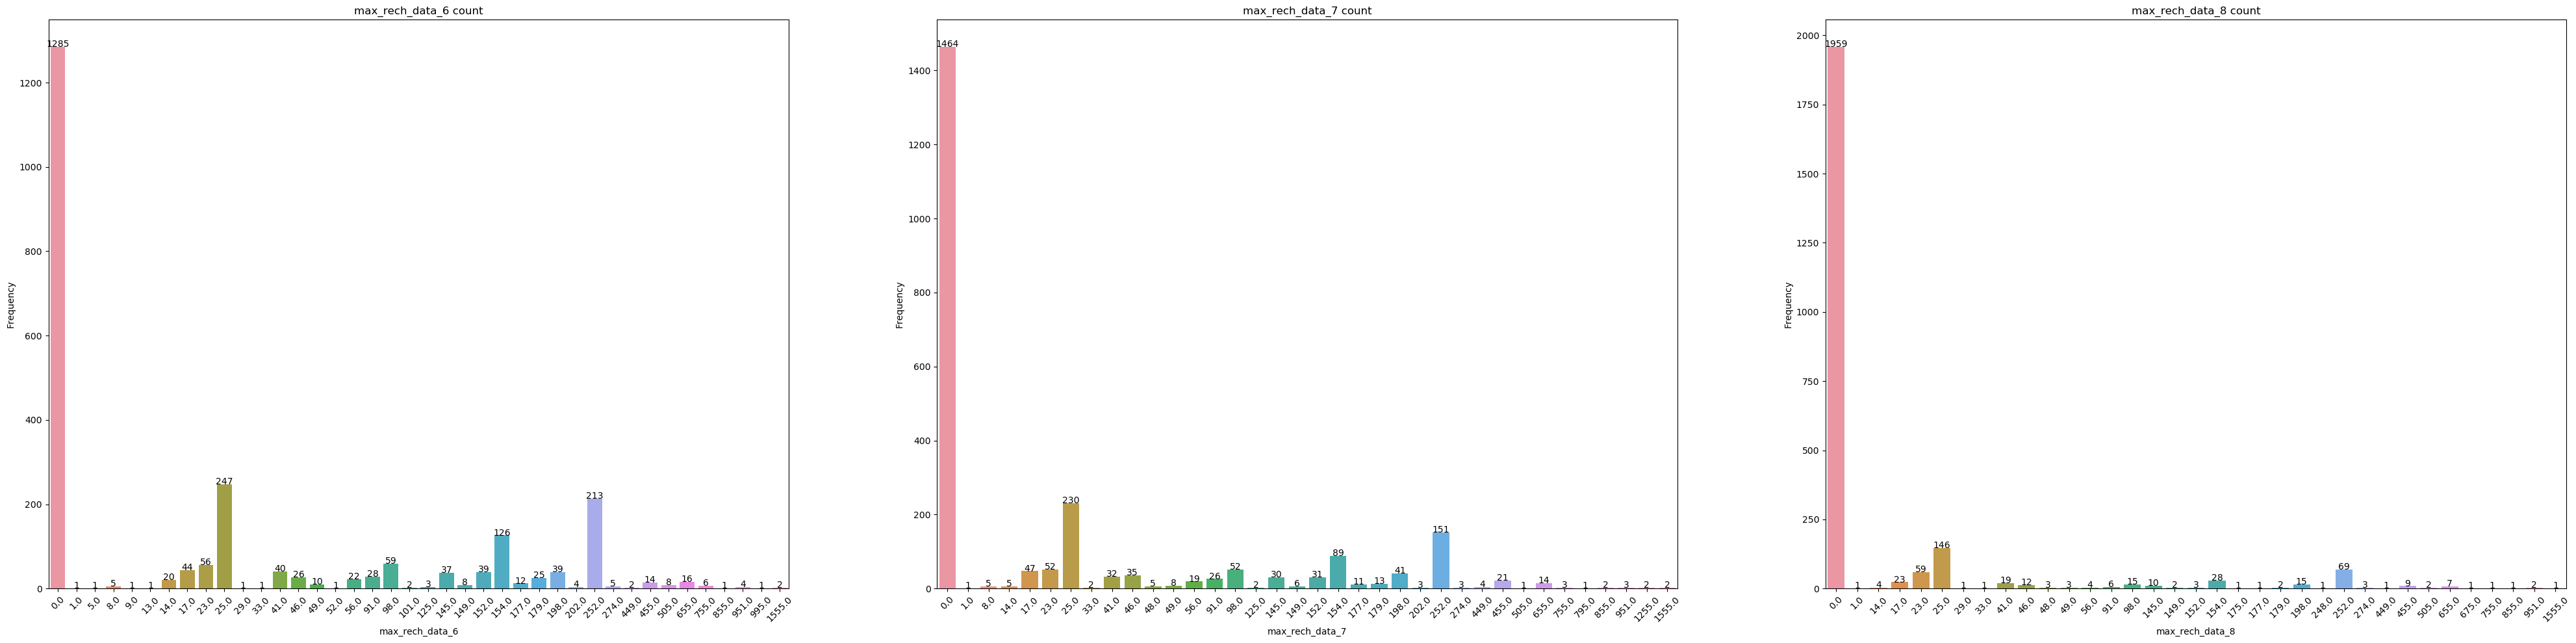

In [65]:
# Churned Customers - Max Recharge data anlysis for month 6,7 and 8

churn_max_rech_data_6_freq = churned_df.groupby(churned_df.max_rech_data_6).size().reset_index(name='Frequency')
churn_max_rech_data_7_freq = churned_df.groupby(churned_df.max_rech_data_7).size().reset_index(name='Frequency')
churn_max_rech_data_8_freq = churned_df.groupby(churned_df.max_rech_data_8).size().reset_index(name='Frequency')

# Plotting the distribution plot to visualise their distribution
columnName = "max_rech_data_6"
draw_bar_chart_subplot(churn_max_rech_data_6_freq, columnName, 'Frequency', columnName + ' count', 
                       columnName, 'Frequency', 50, 25, 45, None, '', True, False, 2, 3, 1)

columnName = "max_rech_data_7"
draw_bar_chart_subplot(churn_max_rech_data_7_freq, columnName, 'Frequency',  columnName + ' count', 
                       columnName, '', 50, 25, 45, None, '', True, False, 2, 3, 2)

columnName = "max_rech_data_8"
draw_bar_chart_subplot(churn_max_rech_data_8_freq, columnName, 'Frequency', columnName + ' count', 
                       columnName, '', 50, 25, 45, None, '', True, True, 2, 3, 3)

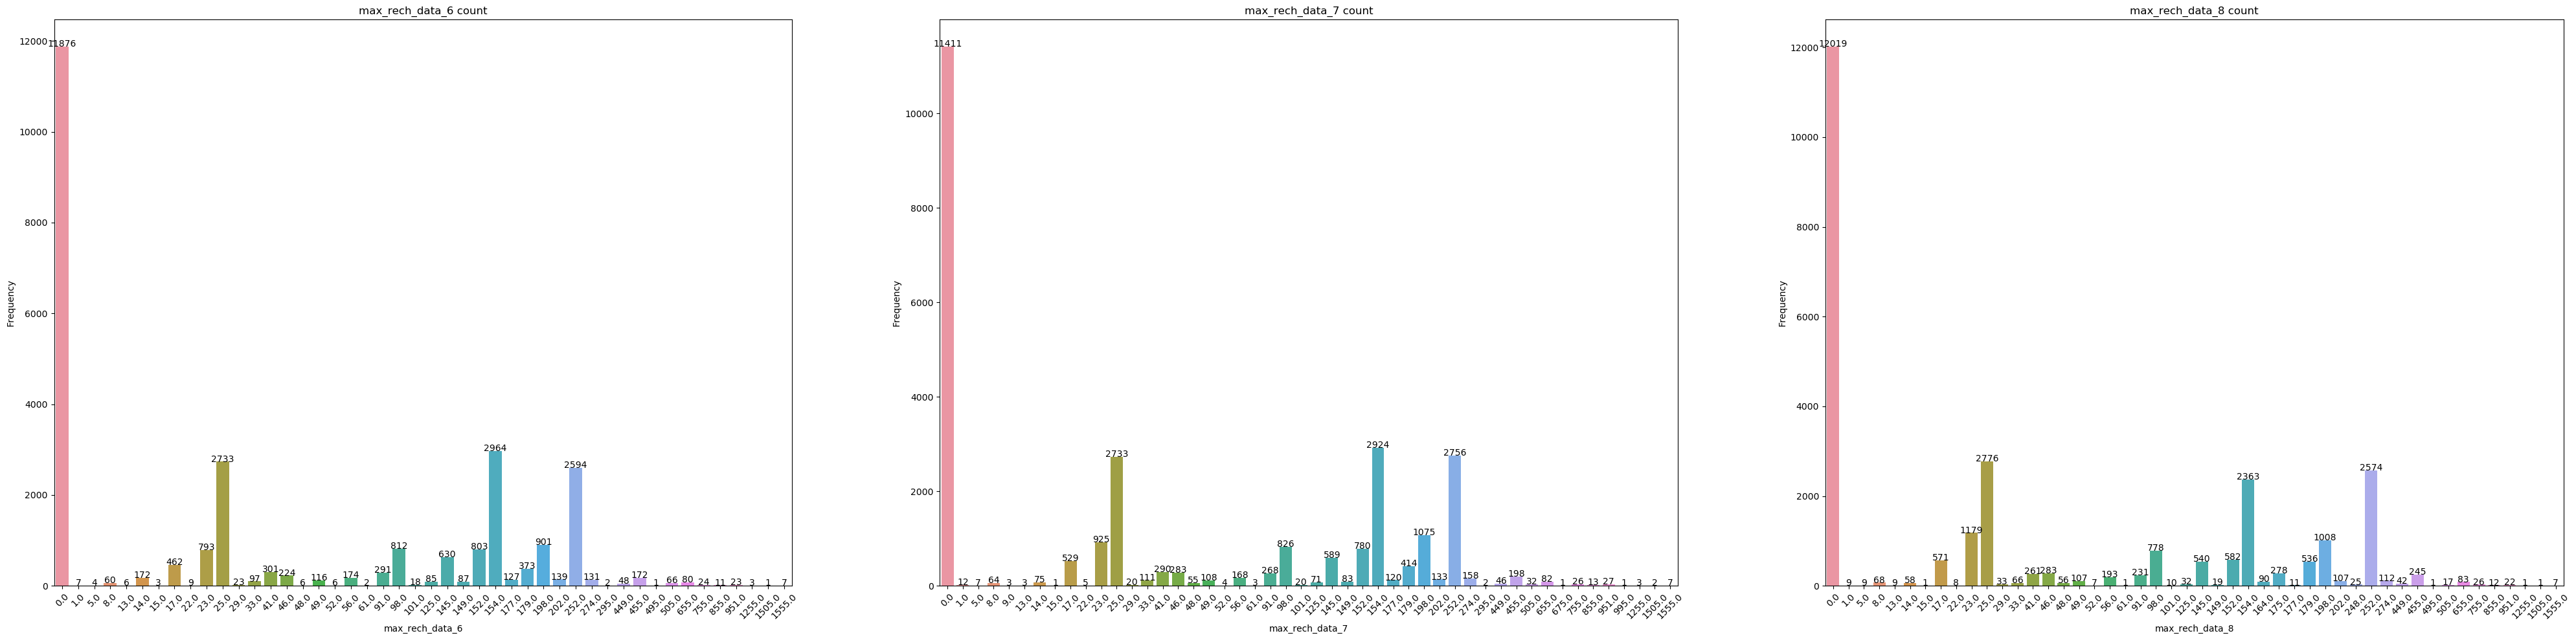

In [66]:
#Not Churned Customers - Max Recharge data anlysis for month 6,7 and 8

not_churn_max_rech_data_6_freq = not_churned_df.groupby(not_churned_df.max_rech_data_6).size().reset_index(name='Frequency')
not_churn_max_rech_data_7_freq = not_churned_df.groupby(not_churned_df.max_rech_data_7).size().reset_index(name='Frequency')
not_churn_max_rech_data_8_freq = not_churned_df.groupby(not_churned_df.max_rech_data_8).size().reset_index(name='Frequency')

# Plotting the distribution plot to visualise their distribution
columnName = "max_rech_data_6"
draw_bar_chart_subplot(not_churn_max_rech_data_6_freq, columnName, 'Frequency', columnName + ' count', 
                       columnName, 'Frequency', 50, 25, 45, None, '', True, False, 2, 3, 1)

columnName = "max_rech_data_7"
draw_bar_chart_subplot(not_churn_max_rech_data_7_freq, columnName, 'Frequency', columnName + ' count', 
                       columnName, '', 50, 25, 45, None, '', True, False, 2, 3, 2)

columnName = "max_rech_data_8"
draw_bar_chart_subplot(not_churn_max_rech_data_8_freq, columnName, 'Frequency', columnName + ' count',
                       columnName, '', 50, 25, 45, None, '', True, True, 2, 3, 3)

- From above plots, we can see that for churned customers that max_rech_data is reducing over period of months specially for higher values

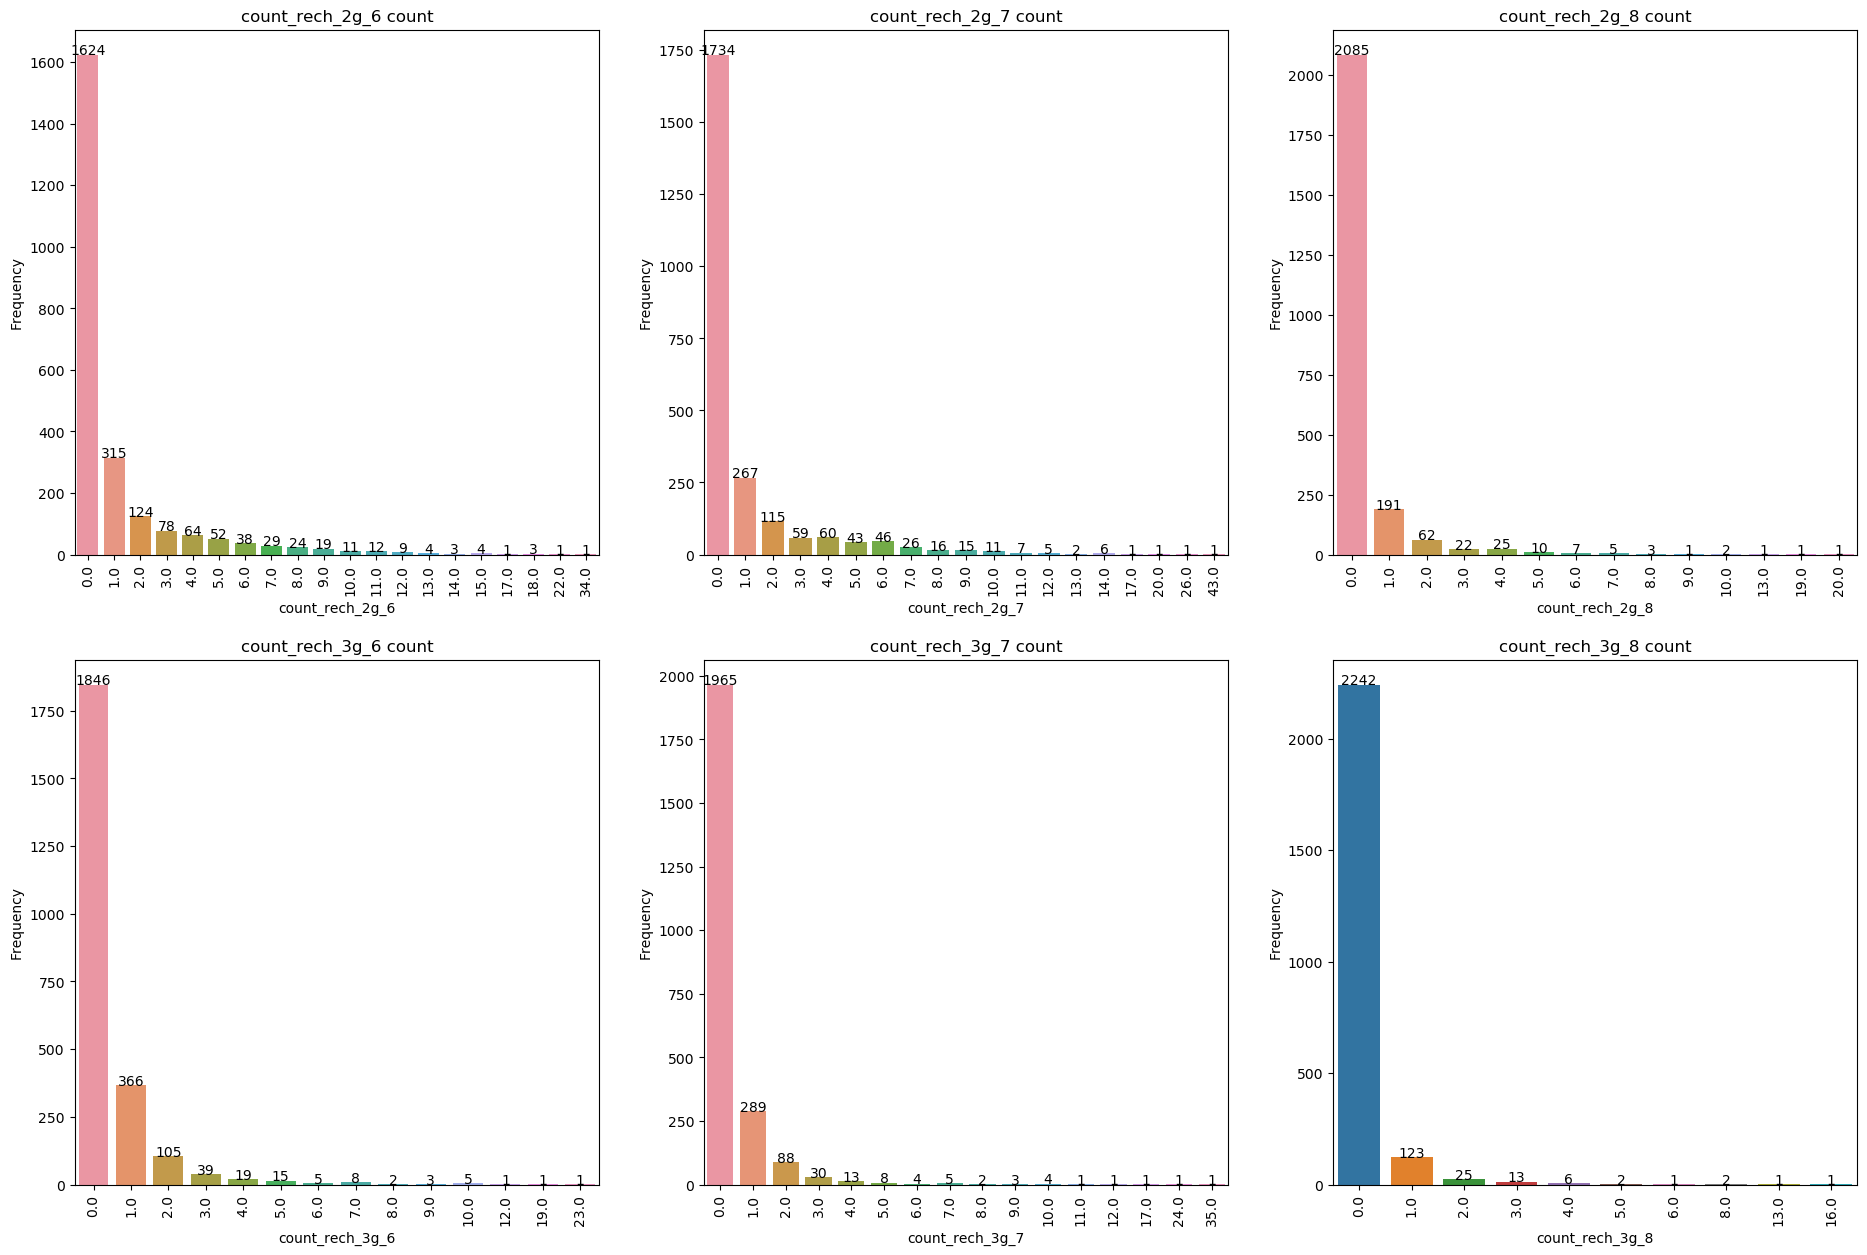

In [67]:
### Churned Customers - recharge of count 2g and 3g
churn_count_rech_2g_6 = churned_df.groupby(churned_df.count_rech_2g_6).size().reset_index(name='Frequency')
churn_count_rech_2g_7 = churned_df.groupby(churned_df.count_rech_2g_7).size().reset_index(name='Frequency')
churn_count_rech_2g_8 = churned_df.groupby(churned_df.count_rech_2g_8).size().reset_index(name='Frequency')
churn_count_rech_3g_6 = churned_df.groupby(churned_df.count_rech_3g_6).size().reset_index(name='Frequency')
churn_count_rech_3g_7 = churned_df.groupby(churned_df.count_rech_3g_7).size().reset_index(name='Frequency')
churn_count_rech_3g_8 = churned_df.groupby(churned_df.count_rech_3g_8).size().reset_index(name='Frequency')

# Plotting the distribution plot to visualise their distribution
columnName = "count_rech_2g_6"
draw_bar_chart_subplot(churn_count_rech_2g_6, columnName, 'Frequency', columnName + ' count', columnName, 'Frequency',
                       23, 15, 90, None, '', True, False, 2, 3, 1)

columnName = "count_rech_2g_7"
draw_bar_chart_subplot(churn_count_rech_2g_7, columnName, 'Frequency', columnName + ' count', columnName, '', 23, 15, 90,
                       None, '', True, False, 2, 3, 2)

columnName = "count_rech_2g_8"
draw_bar_chart_subplot(churn_count_rech_2g_8, columnName, 'Frequency', columnName + ' count', columnName, '', 23, 15, 90,
                       None, '', True, False, 2, 3, 3)

columnName = "count_rech_3g_6"
draw_bar_chart_subplot(churn_count_rech_3g_6, columnName, 'Frequency', columnName + ' count', columnName, 'Frequency', 
                       23, 15, 90, None, '', True, False, 2, 3, 4)

columnName = "count_rech_3g_7"
draw_bar_chart_subplot(churn_count_rech_3g_7, columnName, 'Frequency', columnName + ' count', columnName, '', 23, 15, 90,
                       None, '', True, False, 2, 3, 5)

columnName = "count_rech_3g_8"
draw_bar_chart_subplot(churn_count_rech_3g_8, columnName, 'Frequency', columnName + ' count', columnName, '', 23, 15, 90,
                       None, '', True, True, 2, 3, 6)

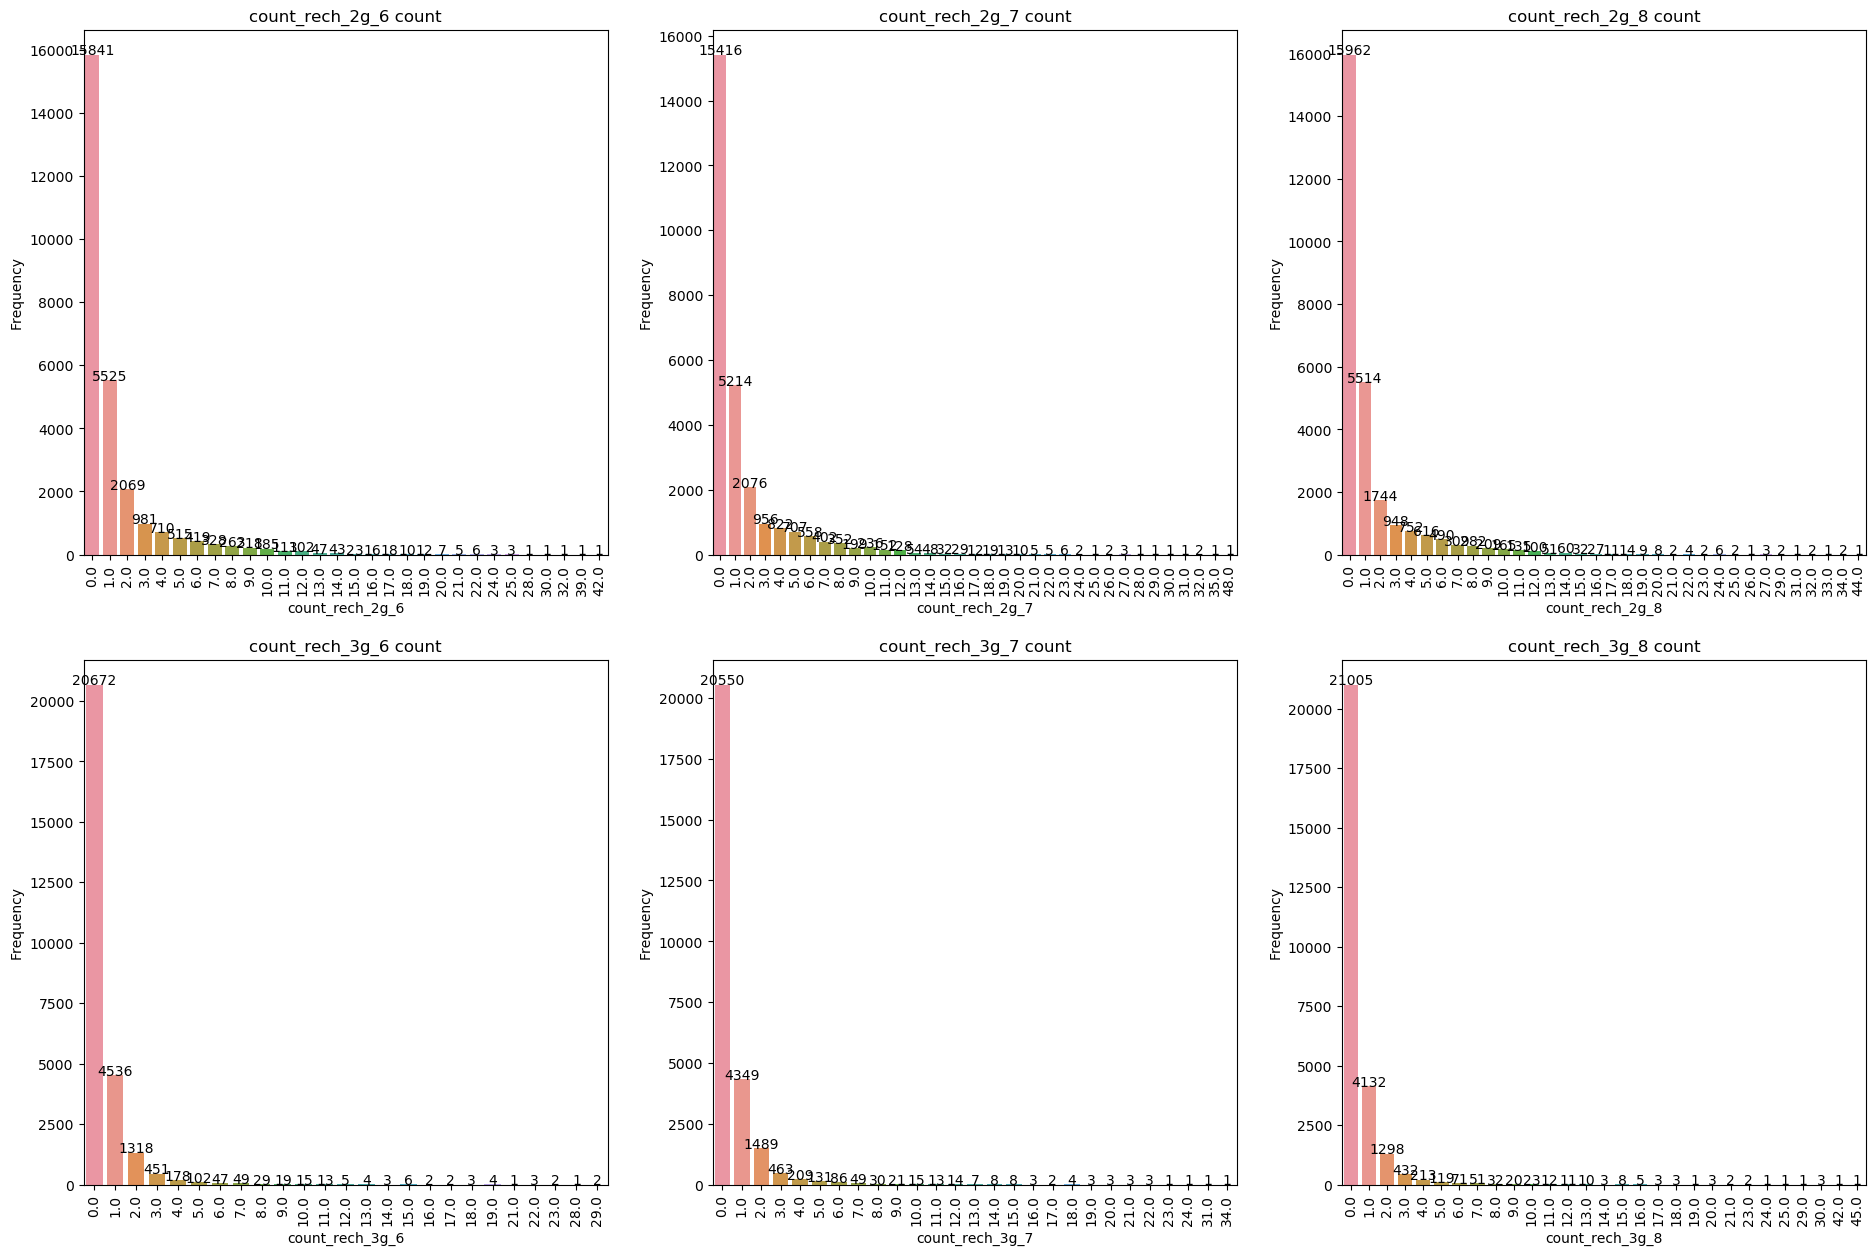

In [68]:
# Non Churned Customers - recharge of count 2g and 3g
non_churn_count_rech_2g_6 = not_churned_df.groupby(not_churned_df.count_rech_2g_6).size().reset_index(name='Frequency')
non_churn_count_rech_2g_7 = not_churned_df.groupby(not_churned_df.count_rech_2g_7).size().reset_index(name='Frequency')
non_churn_count_rech_2g_8 = not_churned_df.groupby(not_churned_df.count_rech_2g_8).size().reset_index(name='Frequency')
non_churn_count_rech_3g_6 = not_churned_df.groupby(not_churned_df.count_rech_3g_6).size().reset_index(name='Frequency')
non_churn_count_rech_3g_7 = not_churned_df.groupby(not_churned_df.count_rech_3g_7).size().reset_index(name='Frequency')
non_churn_count_rech_3g_8 = not_churned_df.groupby(not_churned_df.count_rech_3g_8).size().reset_index(name='Frequency')

# Plotting the distribution plot to visualise their distribution
columnName = "count_rech_2g_6"
draw_bar_chart_subplot(non_churn_count_rech_2g_6, columnName, 'Frequency', columnName + ' count', columnName, 'Frequency',
                       23, 15, 90, None, '', True, False, 2, 3, 1)

columnName = "count_rech_2g_7"
draw_bar_chart_subplot(non_churn_count_rech_2g_7, columnName, 'Frequency', columnName + ' count', columnName, '', 23, 15, 
                       90, None, '', True, False, 2, 3, 2)

columnName = "count_rech_2g_8"
draw_bar_chart_subplot(non_churn_count_rech_2g_8, columnName, 'Frequency', columnName + ' count', columnName, '', 23, 15,
                       90, None, '', True, False, 2, 3, 3)

columnName = "count_rech_3g_6"
draw_bar_chart_subplot(non_churn_count_rech_3g_6, columnName, 'Frequency', columnName + ' count', columnName, 'Frequency', 
                       23, 15, 90, None, '', True, False, 2, 3, 4)

columnName = "count_rech_3g_7"
draw_bar_chart_subplot(non_churn_count_rech_3g_7, columnName, 'Frequency', columnName + ' count', columnName, '', 23, 15,
                       90, None, '', True, False, 2, 3, 5)

columnName = "count_rech_3g_8"
draw_bar_chart_subplot(non_churn_count_rech_3g_8, columnName, 'Frequency', columnName + ' count', columnName, '', 23, 15,
                       90, None, '', True, True, 2, 3, 6)

- From above plots, we can see a similar behaviour as earlier that for churned customers - count_rech_3g , count_rech_2g is reducing over period of months specially for higher values

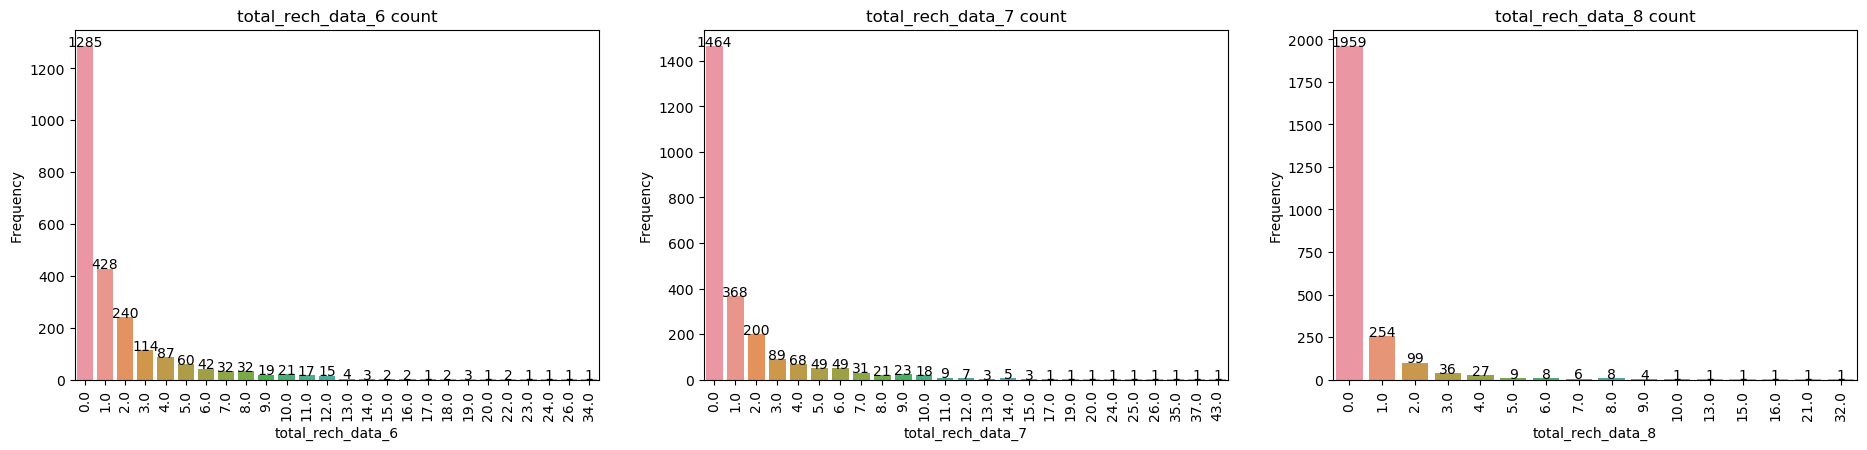

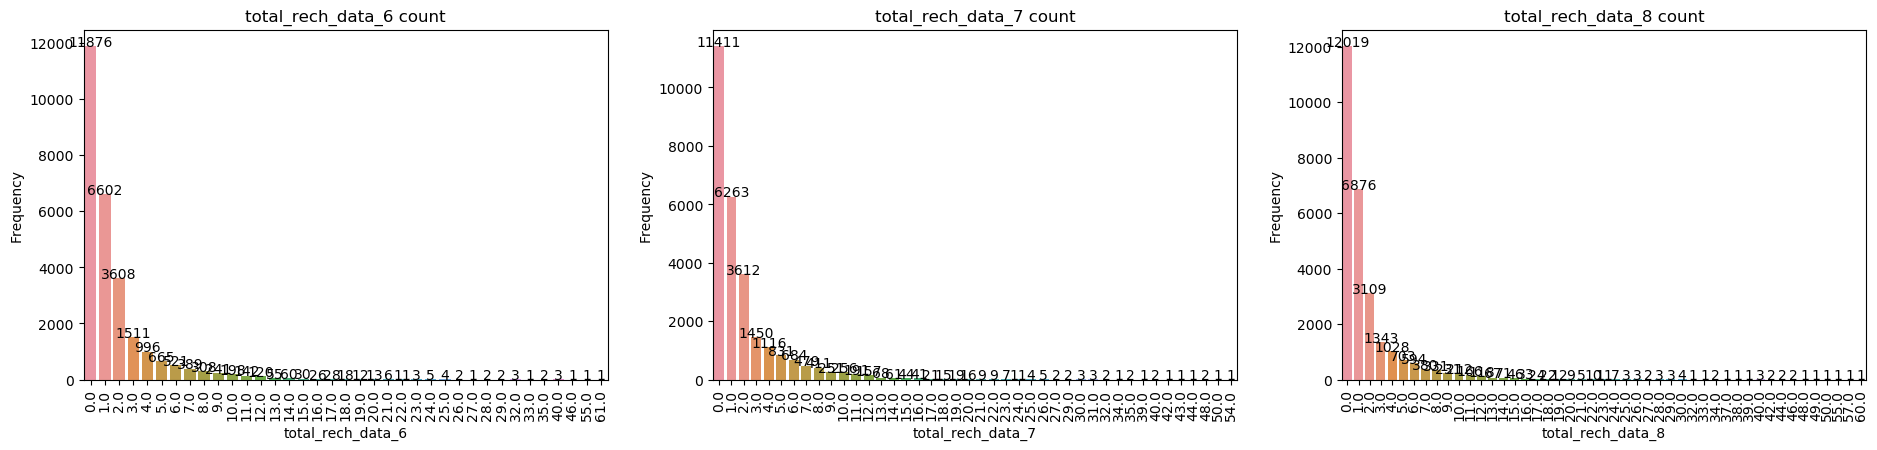

In [69]:
# Churned Customers - Total Recharge data

churn_total_rech_data_6_freq = churned_df.groupby(churned_df.total_rech_data_6).size().reset_index(name='Frequency')
churn_total_rech_data_7_freq = churned_df.groupby(churned_df.total_rech_data_7).size().reset_index(name='Frequency')
churn_total_rech_data_8_freq = churned_df.groupby(churned_df.total_rech_data_8).size().reset_index(name='Frequency')

# Plotting the distribution plot to visualise their distribution
columnName = "total_rech_data_6"
draw_bar_chart_subplot(churn_total_rech_data_6_freq, columnName, 'Frequency', columnName + ' count', columnName, 
                       'Frequency', 23, 10, 90,  None, '', True, False, 2, 3, 1)

columnName = "total_rech_data_7"
draw_bar_chart_subplot(churn_total_rech_data_7_freq, columnName, 'Frequency', columnName + ' count', columnName, '',
                       23, 10, 90, None, '', True, False, 2, 3, 2)

columnName = "total_rech_data_8"
draw_bar_chart_subplot(churn_total_rech_data_8_freq, columnName, 'Frequency', columnName + ' count', columnName, '',
                       23, 10, 90, None, '', True, True, 2, 3, 3)

# Non Churned Customers - Total Recharge data

non_churn_total_rech_data_6_freq = not_churned_df.groupby(not_churned_df.total_rech_data_6).size().reset_index(name='Frequency')
non_churn_total_rech_data_7_freq = not_churned_df.groupby(not_churned_df.total_rech_data_7).size().reset_index(name='Frequency')
non_churn_total_rech_data_8_freq = not_churned_df.groupby(not_churned_df.total_rech_data_8).size().reset_index(name='Frequency')

# Plotting the distribution plot to visualise their distribution
columnName = "total_rech_data_6"
draw_bar_chart_subplot(non_churn_total_rech_data_6_freq, columnName, 'Frequency', columnName + ' count', columnName, 
                       'Frequency', 23, 10, 90, None, '', True, False, 2, 3, 1)

columnName = "total_rech_data_7"
draw_bar_chart_subplot(non_churn_total_rech_data_7_freq, columnName, 'Frequency', columnName + ' count', columnName, '',
                       23, 10, 90, None, '', True, False, 2, 3, 2)

columnName = "total_rech_data_8"
draw_bar_chart_subplot(non_churn_total_rech_data_8_freq, columnName, 'Frequency', columnName + ' count', columnName, '',
                       23, 10, 90, None, '', True, True, 2, 3, 3)

- From above plots, we can see a similar behaviour as earlier that for churned customers for month 8 as compared to 6 and 7 - total_rech_data is reducing over period of months specially for higher values

#### Outlier treatment 

In [70]:
master_dataframe.describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_3g_6     arpu_3g_7  \
count  29883.000000  29883.000000  29883.000000  29883.000000  29883.000000   
mean      63.630988     64.904363     58.564184     67.221209     68.843327   
std      161.274655    165.560833    152.867784    179.454513    183.446128   
min      -15.320000    -15.480000    -24.430000    -30.280000    -26.040000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       51.050000     48.055000     27.000000     35.000000     36.285000   
90%      212.170000    212.170000    212.170000    217.170000    216.168000   
95%      363.280000    374.365000    334.240000    398.480000    410.127000   
99%      676.527000    759.375000    712.532400    811.930000    819.705200   
100%    6433.760000   4809.360000   3467.170000   6362.280000   4980.900000   
max     6433.760000   4809.360000   3467.170000   6362.280000   4980.900000   

          arpu_3g_8        arpu_6        arpu_7        arpu_8  \
count  29883.000000  29883.000000  29883.000000  29883.000000   
mean      62.958469    559.003366    561.707816    509.275231   
std      170.416008    460.455009    480.353080    502.423815   
min      -24.490000  -2258.709000  -2014.045000   -945.808000   
25%        0.000000    310.660500    310.652500    231.807000   
50%        0.000000    482.843000    481.951000    427.621000   
75%       21.395000    700.495000    699.286500    662.467500   
90%      212.496000    994.362200    996.655200    978.325200   
95%      389.000000   1240.658400   1262.932500   1256.092300   
99%      795.656800   1983.511900   1999.596380   1987.080480   
100%    3716.900000  27731.088000  35145.834000  33543.624000   
max     3716.900000  27731.088000  35145.834000  33543.624000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        29883.000000        29883.000000        29883.000000   
mean           131.005472          140.113480          122.366191   
std            200.585618          207.091575          195.802127   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%             50.000000           69.000000           25.000000   
75%            198.000000          211.000000          196.000000   
90%            308.000000          345.000000          308.000000   
95%            498.000000          504.000000          496.000000   
99%            813.720000          910.000000          907.000000   
100%          7546.000000         4365.000000         4061.000000   
max           7546.000000         4365.000000         4061.000000   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
count     29883.000000     29883.000000     29883.000000     29883.000000   
mean          1.244018         1.400194         1.210789         0.428471   
std           2.506004         2.730132         2.541097         1.169777   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           1.000000         1.000000         1.000000         0.000000   
90%           4.000000         5.000000         4.000000         1.000000   
95%           7.000000         7.000000         6.000000         2.000000   
99%          12.000000        12.000000        12.000000         5.000000   
100%         42.000000        48.000000        44.000000        29.000000   
max          42.000000        48.000000        44.000000        29.000000   

       count_rech_3g_7  count_rech_3g_8     fb_user_6     fb_user_7  \
count     29883.000000     29883.000000  29883.000000  29883.000000   
mean          0.457752         0.414282      0.518489      0.524579   
std           1.285020 

- As we can see for almost all features the differnce between 99 and 100 percentile is quite huge indicating presence of heavy outliers beyond 99 percentile.

- So we will cap the outliers for all the columns to 99 percentile.
- Capping means any value above the 99 cutoff value will be imputed with the same value

##### Capping the dataset to 99 percentile

In [71]:
# Outlier Treatement of Columns capping at 99% percentile

for col in master_dataframe.columns:
    upperlimit = master_dataframe[col].quantile(0.99)
    master_dataframe[col] = master_dataframe[col].apply(lambda x: upperlimit if(x > upperlimit) else x)


In [72]:
master_dataframe.describe(percentiles=[.25,.5,.75,.90,.95,.99,1])

arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_3g_6     arpu_3g_7  \
count  29883.000000  29883.000000  29883.000000  29883.000000  29883.000000   
mean      59.695747     60.974856     55.229985     63.209961     64.192304   
std      128.834960    134.284013    127.696620    146.130232    147.932387   
min      -15.320000    -15.480000    -24.430000    -30.280000    -26.040000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       51.050000     48.055000     27.000000     35.000000     36.285000   
90%      212.170000    212.170000    212.170000    217.170000    216.168000   
95%      363.280000    374.365000    334.240000    398.480000    410.127000   
99%      676.504860    759.042900    712.358232    811.930000    819.684536   
100%     676.527000    759.375000    712.532400    811.930000    819.705200   
max      676.527000    759.375000    712.532400    811.930000    819.705200   

          arpu_3g_8        arpu_6        arpu_7        arpu_8  \
count  29883.000000  29883.000000  29883.000000  29883.000000   
mean      59.268018    549.114089    551.629763    498.811663   
std      142.404443    358.783416    361.677525    383.536414   
min      -24.490000  -2258.709000  -2014.045000   -945.808000   
25%        0.000000    310.660500    310.652500    231.807000   
50%        0.000000    482.843000    481.951000    427.621000   
75%       21.395000    700.495000    699.286500    662.467500   
90%      212.496000    994.362200    996.655200    978.325200   
95%      389.000000   1240.658400   1262.932500   1256.092300   
99%      795.470824   1983.223342   1999.553428   1986.905426   
100%     795.656800   1983.511900   1999.596380   1987.080480   
max      795.656800   1983.511900   1999.596380   1987.080480   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        29883.000000        29883.000000        29883.000000   
mean           126.634686          135.773571          118.896576   
std            168.371300          178.429581          172.796191   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%             50.000000           69.000000           25.000000   
75%            198.000000          211.000000          196.000000   
90%            308.000000          345.000000          308.000000   
95%            498.000000          504.000000          496.000000   
99%            813.129600          910.000000          907.000000   
100%           813.720000          910.000000          907.000000   
max            813.720000          910.000000          907.000000   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
count     29883.000000     29883.000000     29883.000000     29883.000000   
mean          1.213098         1.359402         1.174514         0.393903   
std           2.313269         2.490166         2.311185         0.864727   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         0.000000         0.000000         0.000000   
50%           0.000000         0.000000         0.000000         0.000000   
75%           1.000000         1.000000         1.000000         0.000000   
90%           4.000000         5.000000         4.000000         1.000000   
95%           7.000000         7.000000         6.000000         2.000000   
99%          12.000000        12.000000        12.000000         5.000000   
100%         12.000000        12.000000        12.000000         5.000000   
max          12.000000        12.000000        12.000000         5.000000   

       count_rech_3g_7  count_rech_3g_8     fb_user_6     fb_user_7  \
count     29883.000000     29883.000000  29883.000000  29883.000000   
mean          0.415046         0.370846      0.518489      0.524579   
std           0.919873 

In [73]:
# Print the list of columns with unique values less than 2
count = 0
cols = []
for col in master_dataframe.columns:
    if master_dataframe[col].nunique() < 2:
        count+=1
        print(count, " ColName = ", col,
              ",\t UniqueValues = ", master_dataframe[col].unique(),
              ",\t Dtype = ", master_dataframe[col].dtype)
        cols.append(col)

1  ColName =  og_others_7 ,	 UniqueValues =  [0.] ,	 Dtype =  float64
2  ColName =  og_others_8 ,	 UniqueValues =  [0.] ,	 Dtype =  float64


In [74]:
# So dropping columns og_others_7 and og_others_8 as both have single value 0 and no variance.
dropColumns(master_dataframe, cols)

Dropping og_others_7 ...
Dropping og_others_8 ...


In [75]:
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
master_dataframe = master_dataframe.apply(normalize)

In [76]:
master_dataframe['churn'] = master_dataframe['churn'].astype(np.uint8)
master_dataframe['churn'].dtype

dtype('uint8')

### Model Building

In [77]:
#Splitting Data into Training and Test Sets

# Putting feature variable to X
X = master_dataframe.drop(['churn'],axis=1)

# Putting response variable to y
y = master_dataframe['churn']

y.unique()

array([1, 0], dtype=uint8)

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

##### Check for class imabalance
- Verify the number of data point for Churn and non-churn category

In [79]:
count_class_0, count_class_1 = master_dataframe.churn.value_counts()
print("Fraction of Churned : ", round(master_dataframe['churn'].mean(), 2))
count_class_0, count_class_1

Fraction of Churned :  0.08


(27467, 2416)

- As the ratio of churned is nearly 8% only, we should handle this class imbalance. Using SMOTE for handling class imbalance.

##### Handle class imbalance using SMOTE
- This will only be done for train data as test data should not be changed

In [80]:
sm = SMOTE(random_state=42)

columns = X_train.columns
X_train, y_train = sm.fit_sample(X_train, y_train)

In [81]:
X_train = pd.DataFrame(data=X_train, columns=columns)
y_train = pd.Series(y_train.tolist())

In [82]:
print(round(master_dataframe['churn'].mean(), 2))
print(round(y_train.mean(), 2))
print(round(y_test.mean(), 2))

0.08
0.5
0.08


- After Sampling using SMOTE the train data has 50% distribution which is a significant improvement from 8% initially.

In [83]:
# Delete all objects which can hold reference to data frame and the temp dataframes 

del [[not_churned_df, churned_df]]
gc.collect() # garbage collect all deleted objects

# set to null
not_churned_df = pd.DataFrame()
churned_df = pd.DataFrame()



36754

#### Model Building without PCA - To identify the important features for churn - Case Study Part 1


- Basic Logistic Regression Model using GLM.
- Logistic Regression Model with RFE.
- Logistic Regression Model with L1/L2 Regularization.

##### Logistic Regression
- Tune the hyperparameter to select the optimum number of feature for RFE using GridSearchCV

In [84]:
# creating a KFold object with 10 splits 
folds = KFold(n_splits = 8, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': [9,11,13]}]

# specify model
LogRegModel_noPCA = LogisticRegression(solver='liblinear', random_state=42)
LogRegModel_noPCA.fit(X_train, y_train)
rfe = RFE(LogRegModel_noPCA)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)     

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
model_cv.fit(X_train, y_train)

Fitting 8 folds for each of 3 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 29.5min finished


GridSearchCV(cv=KFold(n_splits=8, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=42,
                                                        solver='liblinear',
                                       

In [86]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     607.319233     18.856570         0.023566        0.016888   
1     589.088338     14.804883         0.017454        0.003033   
2     553.538070     12.693191         0.012966        0.002864   

  param_n_features_to_select                        params  split0_test_score  \
0                          9   {'n_features_to_select': 9}           0.891910   
1                         11  {'n_features_to_select': 11}           0.890832   
2                         13  {'n_features_to_select': 13}           0.893996   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.901900           0.895188           0.893220           0.891917   
1           0.902857           0.901426           0.893593           0.891766   
2           0.905348           0.903244           0.894284           0.894052   

   split5_test_score  split6_test_score  split7_test_score  mean_test_score  \
0           0.892323           0.892033           0.892030         0.893815   
1           0.894164           0.892053           0.895677         0.895296   
2           0.899034           0.895685           0.897904         0.897944   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003229                3            0.894747            0.893336   
1        0.004213                2            0.894631            0.897867   
2        0.004082                1            0.898691            0.898623   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.893338            0.895833            0.894004   
1            0.897307            0.895831            0.894050   
2            0.899070            0.897088            0.895858   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.893552            0.894903            0.890425   
1            0.895561            0.894620            0.895076   
2            0.900949            0.898460            0.896811   

   mean_train_score  std_train_score  
0          0.893767         0.001507  
1          0.895618         0.001259  
2          0.898194         0.001477

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'number of features')

Text(0, 0.5, 'roc-auc')

Text(0.5, 1.0, 'Optimal Number of Features')

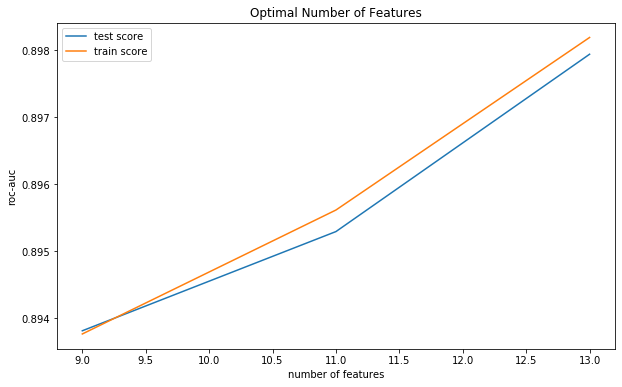

In [87]:
%matplotlib inline
# plotting cv results
plt.figure(figsize=(10,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('roc-auc')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

It can be observed from the above table and figure that we get mean test score of ~0.894 with 9 features and after that the increase is marginal so we decide to build model with 9 features.

In [88]:
LogRegModel_noPCA_final = LogisticRegression(solver='liblinear', random_state=42)
rfe_final = RFE(LogRegModel_noPCA,9)   
rfe_final = rfe_final.fit(X,y)

print(rfe_final.support_)           # Printing the boolean results
print(rfe_final.ranking_)

[False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False  True False False  True False False
 False False False False False False False False  True False False False
 False False False False False False False False Fa

Select only the features as selected by RFE for further analysis

In [89]:
X_train_final = X_train.iloc[:,rfe_final.support_]
X_test_final = X_test.iloc[:,rfe_final.support_]

X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38450 entries, 0 to 38449
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              38450 non-null  float64
 1   last_day_rch_amt_8  38450 non-null  float64
 2   loc_ic_mou_8        38450 non-null  float64
 3   loc_og_t2m_mou_8    38450 non-null  float64
 4   spl_ic_mou_8        38450 non-null  float64
 5   total_ic_mou_8      38450 non-null  float64
 6   total_rech_data_8   38450 non-null  float64
 7   total_rech_num_8    38450 non-null  float64
 8   sep_vbc_3g          38450 non-null  float64
dtypes: float64(9)
memory usage: 2.6 MB


Build a Logistic Regression model and analyse the summary

In [90]:
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train_final, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
import statsmodels.api as sm
logm = sm.GLM(y_train,(sm.add_constant(X_train_final)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                38450
Model:                            GLM   Df Residuals:                    38440
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16227.
Date:                Sat, 16 May 2020   Deviance:                       32455.
Time:                        20:26:55   Pearson chi2:                 2.21e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2528      0.119    -10.524      0.000      -1.486      -1.020
arpu_6                 5.0691      0.185     27.426      0.000       4.707       5.431
last_day_rch_amt_8    -3.5958      0.100    -36.127      0.000      -3.791      -3.401
loc_ic_mou_8          -4.6976      0.386    -12.176      0.000      -5.454      -3.941
loc_og_t2m_mou_8      -3.7423      0.207    -18.056      0.000      -4.149      -3.336
spl_ic_mou_8          -3.9612      0.207    -19.097      0.000      -4.368      -3.555
total_ic_mou_8        -3.8627      0.323    -11.941      0.000      -4.497      -3.229
total_rech_data_8     -4.0590      0.136    -29.823      0.000      -4.326      -3.792
total_rech_num_8      -3.0249      0.102    -29.563      0.000      -3.225      -2.824
sep_vbc_3g            -7.0627      0.557    -12.687      0.000      -8.154      -5.972
======================================================================================
"""

In [92]:
Cols = X_train_final.columns
Cols  = Cols.insert(10,'churn')
Cols

Index(['arpu_6', 'last_day_rch_amt_8', 'loc_ic_mou_8', 'loc_og_t2m_mou_8',
       'spl_ic_mou_8', 'total_ic_mou_8', 'total_rech_data_8',
       'total_rech_num_8', 'sep_vbc_3g', 'churn'],
      dtype='object')

In [93]:
calculate_vif(input_data=master_dataframe[Cols], dependent_col='churn')

Var    Vif
2        loc_ic_mou_8  10.15
5      total_ic_mou_8   9.89
0              arpu_6   4.16
7    total_rech_num_8   2.97
3    loc_og_t2m_mou_8   2.34
1  last_day_rch_amt_8   1.93
6   total_rech_data_8   1.57
4        spl_ic_mou_8   1.09
8          sep_vbc_3g   1.08

Observe that the field 'loc_ic_mou_8' has high VIF(>4). Hence we can drop the feature and proceed with analysis.

Drop the feature 'loc_ic_mou_8' and rerun the logistic regression analysis

In [94]:
try:
    Cols = Cols.drop('loc_ic_mou_8')
except:
    print("Column name not present")
logreg = LogisticModel_ReRun(['loc_ic_mou_8'])

Dropping loc_ic_mou_8 ...
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38450
Model:                            GLM   Df Residuals:                    38441
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16296.
Date:                Sat, 16 May 2020   Deviance:                       32592.
Time:                        20:26:56   Pearson chi2:                 1.94e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const     

In [95]:
calculate_vif(input_data=master_dataframe[Cols], dependent_col='churn')

Var   Vif
0              arpu_6  4.16
6    total_rech_num_8  2.96
4      total_ic_mou_8  2.35
2    loc_og_t2m_mou_8  2.15
1  last_day_rch_amt_8  1.93
5   total_rech_data_8  1.57
3        spl_ic_mou_8  1.09
7          sep_vbc_3g  1.08

The VIFs although above 4 for "arpu_6"  but since p-value is 0 for these features and from buisness need that is important so we decide to keep that as key feature.

So we can finalise these features and see the model performance

Predict the probability of y('churn') using the final model and selected features and put it in a DataFrame

In [96]:
y_pred = logreg.predict_proba(X_test[X_train_final.columns])

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

y_test_df.head()

churn
25743      0
8318       1
18611      0
54656      0
48535      0

In [97]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [98]:
# Merging the Actual and predcited 'churn' into one dataFrame for ease of analysis and visualisation
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

y_pred_final.head()

churn  CustID  Churn_Prob
0      0   25743    0.247001
1      1    8318    0.784066
2      0   18611    0.502397
3      0   54656    0.401286
4      0   48535    0.030274

To start with the model evaluation lets take the churn probability more than 50% as churn else non-churn

In [99]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_pred_final.head()

churn  CustID  Churn_Prob  predicted
0      0   25743    0.247001          0
1      1    8318    0.784066          1
2      0   18611    0.502397          1
3      0   54656    0.401286          0
4      0   48535    0.030274          0

Anlayse the Confusion metrics and observe the values for accuracy, sensitivity and specificity.

As in this case it is more important to predict the churned customers correctly, we should be concentrating more on high sensitvity or recall value

In [100]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.predicted )
confusion

array([[6454, 1788],
       [ 123,  600]], dtype=int64)

In [101]:
compute_and_print_metrics_from_confusion_matrix(y_pred_final.churn, y_pred_final.predicted)
print("precision = ", metrics.precision_score(y_pred_final.churn, y_pred_final.predicted))

Confusion matrix
[[6454 1788]
 [ 123  600]]

Overall accuracy =  0.7868377021751255
True positive = 600, true negatives = 6454, false positives = 1788, false negatives = 123

Sensitivity =  0.8298755186721992
specificity =  0.7830623635040039

False postive rate =  0.21693763649599612
positive predictive value =  0.25125628140703515
Negative predictive value =  0.9812984643454462
precision =  0.25125628140703515


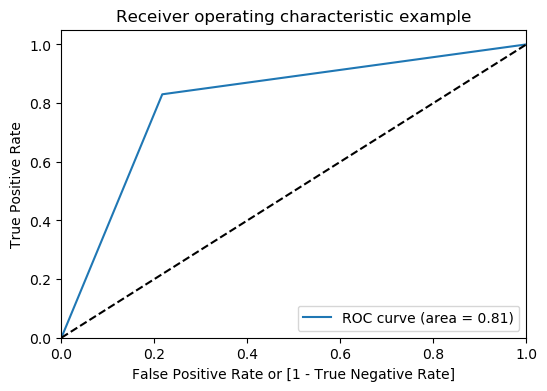

In [102]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

In [103]:
print(classification_report(y_pred_final.churn, y_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8242
           1       0.25      0.83      0.39       723

    accuracy                           0.79      8965
   macro avg       0.62      0.81      0.63      8965
weighted avg       0.92      0.79      0.83      8965



As we can see above the Sensitivity is nearly 82%. It appears to be a good model for prediction. Though it can be further tuned to improve the sensitivity or recall score.

Lets do that by anaysing sensitivity and specificity for diffrent values of probability cutoff.

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  CustID  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0   25743    0.247001          0    1    1    1    0    0    0    0   
1      1    8318    0.784066          1    1    1    1    1    1    1    1   
2      0   18611    0.502397          1    1    1    1    1    1    1    0   
3      0   54656    0.401286          0    1    1    1    1    1    0    0   
4      0   48535    0.030274          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.080647     1.000000     0.000000
0.1          0.1  0.420970     0.970954     0.372725
0.2          0.2  0.543558     0.941909     0.508614
0.3          0.3  0.635694     0.918396     0.610895
0.4          0.4  0.713218     0.875519     0.698981
0.5          0.5  0.786838     0.829876     0.783062
0.6          0.6  0.846960     0.769018     0.853798
0.7          0.7  0.896152     0.690180     0.914220
0.8          0.8  0.926492     0.539419     0.960446
0.9          0.9  0.929057     0.183956     0.994419


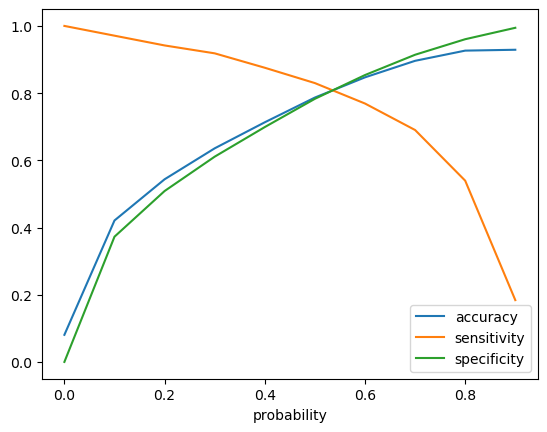

In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
probability_cutoffs(y_pred_final.churn, y_pred_final)

As we can see from the above plot that having a probability cut-off of 50% , the sensitivity is at 82% with fairly good accuracy and specificity as well. So we can take 0.5 as prob cut off

In [106]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

print(classification_report(y_pred_final.churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8242
           1       0.25      0.83      0.39       723

    accuracy                           0.79      8965
   macro avg       0.62      0.81      0.63      8965
weighted avg       0.92      0.79      0.83      8965



In [107]:
compute_and_print_metrics_from_confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted)

Confusion matrix
[[6454 1788]
 [ 123  600]]

Overall accuracy =  0.7868377021751255
True positive = 600, true negatives = 6454, false positives = 1788, false negatives = 123

Sensitivity =  0.8298755186721992
specificity =  0.7830623635040039

False postive rate =  0.21693763649599612
positive predictive value =  0.25125628140703515
Negative predictive value =  0.9812984643454462


<b>Evaluating Error Terms</b>
- Let's now evaluate the model in terms of its assumptions. We should test that:

    -  The error terms are normally distributed with mean approximately 0
    - There is little correlation between the predictors
     - Homoscedasticity, i.e. the 'spread' or 'variance' of the error term (y_true-y_pred) is constant

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'ytest-ypred')

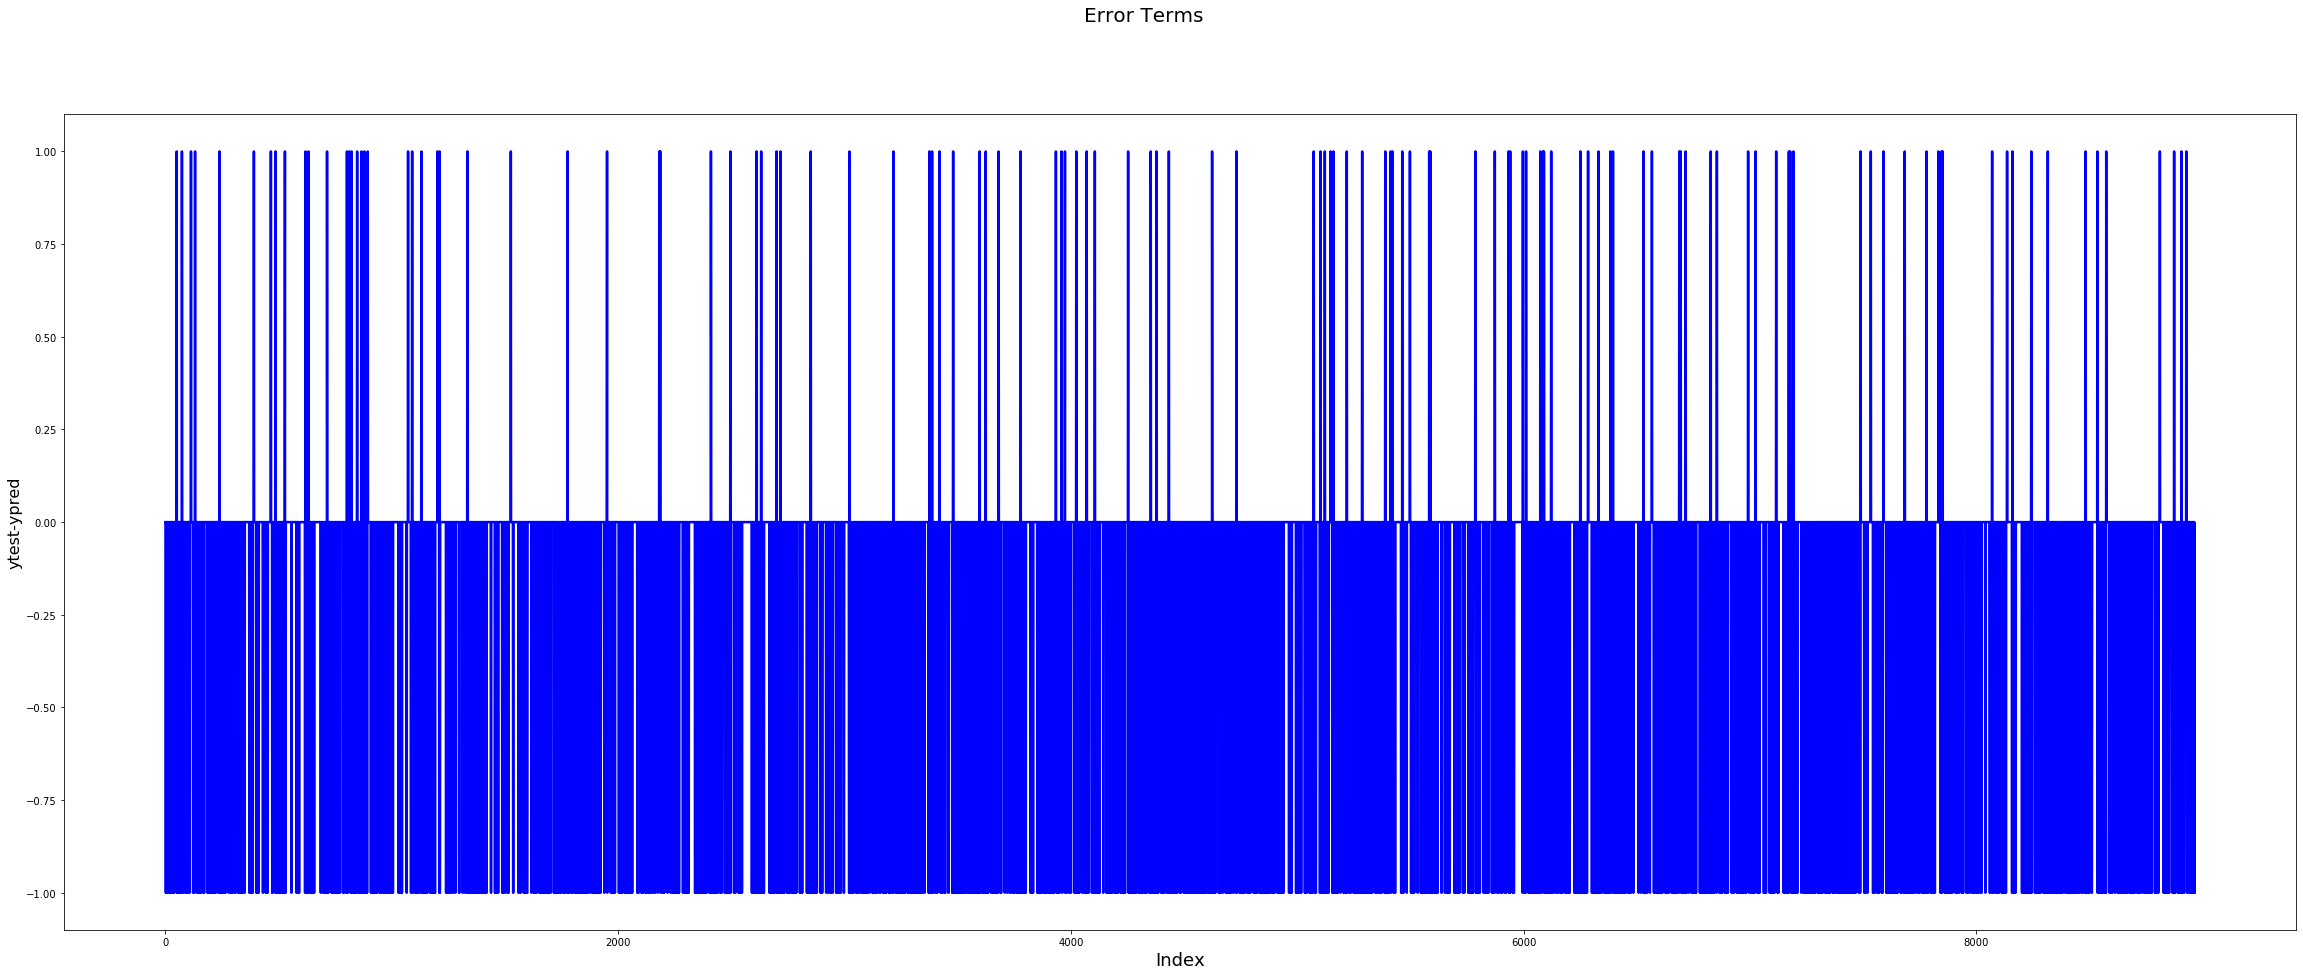

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
# Error terms
c = [i for i in range(len(y_pred_final.final_predicted))]
fig = plt.figure(figsize=(40, 15))
plt.plot(c, y_pred_final.churn-y_pred_final.final_predicted, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'y_test-y_pred')

Text(0, 0.5, 'Index')

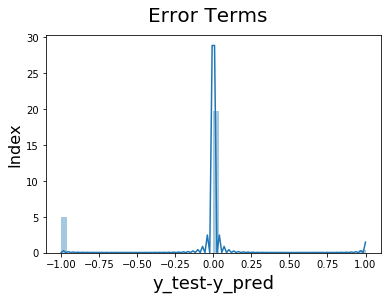

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_pred_final.churn-y_pred_final.final_predicted),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [110]:
# Mean
np.mean(y_pred_final.churn-y_pred_final.final_predicted)

-0.1857222532069158

<b> Final Inference: </b> As we have got a fairly good logistic regression model with nearly 83% sensitivity, that is 80% accuracy in predicting the churns we can conclude the feature used to build this final model effecting the churning most .

In [111]:
# The Features are:
i = 1
print('Features effect the churning most are')
for col in Cols:
    if col != 'churn':
        print(f'{i}. {col}')
        i=i+1

Features effect the churning most are
1. arpu_6
2. last_day_rch_amt_8
3. loc_og_t2m_mou_8
4. spl_ic_mou_8
5. total_ic_mou_8
6. total_rech_data_8
7. total_rech_num_8
8. sep_vbc_3g


##### Below table showing key features effecting the Churn and there respective coefficients/weights 

In [112]:
coeficient = logreg.coef_[0]
coeficient = coeficient.tolist()

try:
    Cols = Cols.drop('churn')
except:
    print("Column name not present")

coef_df = pd.DataFrame({'Feature Name': Cols,
                         'Coeffiecient(effect on churn)': coeficient,
                        })
coef_df

Feature Name  Coeffiecient(effect on churn)
0              arpu_6                       4.974319
1  last_day_rch_amt_8                      -3.563326
2    loc_og_t2m_mou_8                      -4.505781
3        spl_ic_mou_8                      -3.784414
4      total_ic_mou_8                      -7.136017
5   total_rech_data_8                      -4.115068
6    total_rech_num_8                      -2.942761
7          sep_vbc_3g                      -5.701298

#### Model Building with PCA - To identify the important features for churn - 3 different Model Building Techniques-Case Study Part 2


- Logistic Regression Model with PCA.
- Decision Tree Model.
- Random Forest Model.

<b>PCA on the data</b>
- Computng the principal components, using the train data, and apply them later on the test data

In [113]:
X_train.shape

(38450, 173)

In [114]:
pca = PCA(svd_solver='randomized', random_state=42)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [115]:
# Fit train data on pca
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

- Plotting principal components and try to make sense of them

- We'll plot original features on the first 2 principal components as axes

In [116]:
pca.components_

array([[ 1.02435020e-01,  9.40276574e-02,  7.88512524e-02, ...,
        -4.12687276e-03,  1.58875113e-02, -2.87349798e-03],
       [ 4.72913704e-02,  7.03548101e-02,  8.30498480e-02, ...,
         4.96446399e-03,  1.71396401e-02,  4.00115326e-03],
       [-1.85613652e-01, -1.23601934e-01, -8.47823179e-02, ...,
         1.60082055e-02,  2.32418162e-02,  1.22027134e-03],
       ...,
       [-1.15924419e-03,  5.05833852e-04, -3.07027159e-04, ...,
         9.72588110e-04, -2.05884330e-03, -1.06513320e-02],
       [-1.83899660e-04, -1.04205275e-04, -6.29649115e-04, ...,
        -9.62277291e-04,  5.96962783e-03, -3.67075021e-04],
       [-3.25302060e-04,  9.34791809e-04, -4.71670264e-04, ...,
         4.73369395e-04, -7.53256990e-04, -2.82507330e-03]])

In [117]:
colnames = list(X_train.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

PC1       PC2    Feature
0  0.102435  0.047291  arpu_2g_6
1  0.094028  0.070355  arpu_2g_7
2  0.078851  0.083050  arpu_2g_8
3  0.091566  0.050841  arpu_3g_6
4  0.091458  0.074409  arpu_3g_7

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.10243501974017157, 0.04729137044154405, 'arpu_2g_6')

Text(0.09402765743013985, 0.07035481014499767, 'arpu_2g_7')

Text(0.07885125238188417, 0.08304984803546883, 'arpu_2g_8')

Text(0.09156572263984779, 0.05084060576615701, 'arpu_3g_6')

Text(0.09145779334618052, 0.0744086724767713, 'arpu_3g_7')

Text(0.0765493115678716, 0.08536524108877541, 'arpu_3g_8')

Text(-0.027584990881258285, 0.0567142858579094, 'arpu_6')

Text(-0.02102101158334149, 0.08852650790824548, 'arpu_7')

Text(-0.002432965557568657, 0.1453516563462696, 'arpu_8')

Text(0.1499526945597958, 0.014325386969881908, 'av_rech_amt_data_6')

Text(0.14183614622132085, 0.0529348446955618, 'av_rech_amt_data_7')

Text(0.11340872308764478, 0.08605624348611128, 'av_rech_amt_data_8')

Text(0.07915364001224058, -0.10564338355394595, 'count_rech_2g_6')

Text(0.08227027365687067, -0.08300390613791657, 'count_rech_2g_7')

Text(0.058121215477795266, -0.019811809255336713, 'count_rech_2g_8')

Text(0.09214937419218734, 0.014965232887423241, 'count_rech_3g_6')

Text(0.09144735057284685, 0.04159074105301377, 'count_rech_3g_7')

Text(0.0757109294989842, 0.0595958906708868, 'count_rech_3g_8')

Text(0.41629803146156064, -0.0816699144099302, 'fb_user_6')

Text(0.4248519707646071, 0.0048168740426690285, 'fb_user_7')

Text(0.35604973242676663, 0.16445409772645514, 'fb_user_8')

Text(-0.00140565934963075, 0.020858482037516817, 'ic_others_6')

Text(-0.00012613988291251338, 0.02457560668448217, 'ic_others_7')

Text(0.002813247910480349, 0.027655023986161664, 'ic_others_8')

Text(0.0008441358777440862, 0.022853779766899594, 'isd_ic_mou_6')

Text(0.0028475392492969395, 0.028157284774308435, 'isd_ic_mou_7')

Text(0.00310339609198995, 0.0315049050414234, 'isd_ic_mou_8')

Text(-0.0015341568436946203, 0.006523670964778533, 'isd_og_mou_6')

Text(0.00220236587180904, 0.014764825761221205, 'isd_og_mou_7')

Text(0.001904992923370735, 0.01952035237373422, 'isd_og_mou_8')

Text(0.00942618666534964, 0.06611406828494469, 'last_day_rch_amt_6')

Text(0.009351344392050941, 0.09385723693068758, 'last_day_rch_amt_7')

Text(0.022685350005240544, 0.12551336023879198, 'last_day_rch_amt_8')

Text(0.003218281077284532, 0.13744011513877, 'loc_ic_mou_6')

Text(0.007138306658379486, 0.1520481134950541, 'loc_ic_mou_7')

Text(0.01761286394134243, 0.15656839383384577, 'loc_ic_mou_8')

Text(0.011600771294018047, 0.06635865146760292, 'loc_ic_t2f_mou_6')

Text(0.012773745649135108, 0.07186243968880758, 'loc_ic_t2f_mou_7')

Text(0.014367002496302335, 0.07270667249950703, 'loc_ic_t2f_mou_8')

Text(0.001927983492302, 0.12693065071872975, 'loc_ic_t2m_mou_6')

Text(0.006120656297402179, 0.1450599494443528, 'loc_ic_t2m_mou_7')

Text(0.016193113281537216, 0.14805962814679272, 'loc_ic_t2m_mou_8')

Text(-0.0009745791458333438, 0.08180746580889496, 'loc_ic_t2t_mou_6')

Text(0.0008300180713085543, 0.08797280201260425, 'loc_ic_t2t_mou_7')

Text(0.008186303099946618, 0.09322201809477777, 'loc_ic_t2t_mou_8')

Text(-0.017912772528107874, 0.1422494946221912, 'loc_og_mou_6')

Text(-0.015411363069034699, 0.15885116390277887, 'loc_og_mou_7')

Text(-0.0018066152698967273, 0.16000727709727688, 'loc_og_mou_8')

Text(-0.001455560410146892, 0.010766616373785799, 'loc_og_t2c_mou_6')

Text(-0.0002425422413191362, 0.014406247662123747, 'loc_og_t2c_mou_7')

Text(0.0014259015627207069, 0.026671100290962577, 'loc_og_t2c_mou_8')

Text(0.004690528749974196, 0.06973004137756207, 'loc_og_t2f_mou_6')

Text(0.006141077183863805, 0.0747482298511415, 'loc_og_t2f_mou_7')

Text(0.007523164110913554, 0.07472480525389531, 'loc_og_t2f_mou_8')

Text(-0.01597437424260674, 0.13745327341136812, 'loc_og_t2m_mou_6')

Text(-0.014109499174700918, 0.1532788741992223, 'loc_og_t2m_mou_7')

Text(-0.00045495011074093663, 0.15397463211732051, 'loc_og_t2m_mou_8')

Text(-0.011653721494517372, 0.0775831008501853, 'loc_og_t2t_mou_6')

Text(-0.009765730773612055, 0.08439225334917261, 'loc_og_t2t_mou_7')

Text(-0.0026382611724559196, 0.08829702778595645, 'loc_og_t2t_mou_8')

Text(0.017355038522199582, 0.07052874449581603, 'max_rech_amt_6')

Text(0.01917779148006891, 0.09517661460983327, 'max_rech_amt_7')

Text(0.02787866165631946, 0.12955654483267828, 'max_rech_amt_8')

Text(0.14831133745267272, 0.050639065357019064, 'max_rech_data_6')

Text(0.15193093220579054, 0.08587243853714475, 'max_rech_data_7')

Text(0.1282411632153772, 0.1165132188236522, 'max_rech_data_8')

Text(0.052012785956711174, 0.00950804833473311, 'monthly_2g_6')

Text(0.05537025077080334, 0.024224756336578206, 'monthly_2g_7')

Text(0.04579847820852476, 0.032769788819799445, 'monthly_2g_8')

Text(0.08289831915673442, 0.05101076556551506, 'monthly_3g_6')

Text(0.08514263064586217, 0.07481606469959795, 'monthly_3g_7')

Text(0.07182062124443925, 0.08124816849435812, 'monthly_3g_8')

Text(0.009532758518226324, -0.0034793689694861416, 'night_pck_user_6')

Text(0.009481996360472505, 2.4082285356571615e-05, 'night_pck_user_7')

Text(0.007212477067344842, 0.0049690611987017064, 'night_pck_user_8')

Text(-0.09430210707247502, 0.09907263712304135, 'offnet_mou_6')

Text(-0.08208759302303643, 0.1270424296916789, 'offnet_mou_7')

Text(-0.04150947919612317, 0.14587984183002453, 'offnet_mou_8')

Text(-0.017765377658570145, 0.006974689460743995, 'og_others_6')

Text(-0.0962533122528711, 0.048886268135284724, 'onnet_mou_6')

Text(-0.08556454052672001, 0.07464123902497884, 'onnet_mou_7')

Text(-0.04515875520261256, 0.08847494682581934, 'onnet_mou_8')

Text(-0.013620293903092957, 0.0038105049126097718, 'roam_ic_mou_6')

Text(-0.014852607696854802, 0.0010883070092078222, 'roam_ic_mou_7')

Text(-0.015550972528509266, 0.014590336889619202, 'roam_ic_mou_8')

Text(-0.024237358713682586, -0.00023597221857853126, 'roam_og_mou_6')

Text(-0.02693565698351492, -0.0016994012086198307, 'roam_og_mou_7')

Text(-0.026087759355631446, 0.016219299951409628, 'roam_og_mou_8')

Text(0.0704096144921256, -0.1071800169295402, 'sachet_2g_6')

Text(0.0729334821464409, -0.08705975219538663, 'sachet_2g_7')

Text(0.05039117469541111, -0.025358806591907104, 'sachet_2g_8')

Text(0.047650011112329575, -0.02049644195679561, 'sachet_3g_6')

Text(0.04246980169715928, -0.0040408004564931365, 'sachet_3g_7')

Text(0.036069559766761045, 0.009654120164627725, 'sachet_3g_8')

Text(-0.015158290315255245, 0.013715710669702707, 'spl_ic_mou_6')

Text(0.0065938225578390875, -0.009791001852081274, 'spl_ic_mou_7')

Text(0.00045663828009748545, 0.007922773933236291, 'spl_ic_mou_8')

Text(-0.006773902107572797, 0.011986500913581378, 'spl_og_mou_6')

Text(-0.00955585642228123, 0.02623865667950262, 'spl_og_mou_7')

Text(-0.0012296344164882001, 0.046465173881665066, 'spl_og_mou_8')

Text(-0.017887061777352303, 0.054932377561967435, 'std_ic_mou_6')

Text(-0.013870269344112517, 0.066004125438412, 'std_ic_mou_7')

Text(-0.003178859698053684, 0.07247682866749547, 'std_ic_mou_8')

Text(0.005481158925560778, 0.037143720939805364, 'std_ic_t2f_mou_6')

Text(0.00689137929963122, 0.0412823882632553, 'std_ic_t2f_mou_7')

Text(0.008205755148095973, 0.040602790136583786, 'std_ic_t2f_mou_8')

Text(-0.015817091870989487, 0.046853053981524555, 'std_ic_t2m_mou_6')

Text(-0.011973355240396982, 0.05851165998820499, 'std_ic_t2m_mou_7')

Text(-0.0032279962646584275, 0.06555453409771522, 'std_ic_t2m_mou_8')

Text(-0.019046075471770806, 0.03580035045439897, 'std_ic_t2t_mou_6')

Text(-0.01586206259386485, 0.04318287372882519, 'std_ic_t2t_mou_7')

Text(-0.004589507561227953, 0.049121737312908115, 'std_ic_t2t_mou_8')

Text(-0.13934974758947655, 0.02719871874985739, 'std_og_mou_6')

Text(-0.12218663613001864, 0.0641130273648908, 'std_og_mou_7')

Text(-0.06313091374308781, 0.08145236127186316, 'std_og_mou_8')

Text(0.0014780573512729977, 0.031094335690475098, 'std_og_t2f_mou_6')

Text(0.0009779906525660316, 0.03170900012139916, 'std_og_t2f_mou_7')

Text(0.002590297665553333, 0.034300611506423634, 'std_og_t2f_mou_8')

Text(-0.09460540080829945, 0.025256915544438565, 'std_og_t2m_mou_6')

Text(-0.08010707664057078, 0.05023289342957515, 'std_og_t2m_mou_7')

Text(-0.04303235864766246, 0.06281342486821202, 'std_og_t2m_mou_8')

Text(-0.09738697550911253, 0.009361936989293912, 'std_og_t2t_mou_6')

Text(-0.08779205409112065, 0.03338118760312712, 'std_og_t2t_mou_7')

Text(-0.04579685779479451, 0.04911443353337237, 'std_og_t2t_mou_8')

Text(0.08806461679679785, -0.03226781447347478, 'total_data_rech_6')

Text(0.0820191220243421, -0.00020931211895089055, 'total_data_rech_7')

Text(0.06486914683123374, 0.02739356121129865, 'total_data_rech_8')

Text(-0.0027092707746376697, 0.14467162149435817, 'total_ic_mou_6')

Text(0.0020701409055855044, 0.16127863879610904, 'total_ic_mou_7')

Text(0.015216958550580998, 0.16712845992834574, 'total_ic_mou_8')

Text(-0.1316508868185557, 0.10774692268637097, 'total_og_mou_6')

Text(-0.11644394016801228, 0.14707040102849214, 'total_og_mou_7')

Text(-0.056035846874098676, 0.1597706414357596, 'total_og_mou_8')

Text(-0.06251417447656618, 0.11901993697289168, 'total_rech_amt_6')

Text(-0.04305075237666658, 0.17378706255410883, 'total_rech_amt_7')

Text(-0.0009878612880875148, 0.21213854285552947, 'total_rech_amt_8')

Text(0.11158172103169421, -0.0909898607735576, 'total_rech_data_6')

Text(0.1084184967894021, -0.05461156856144106, 'total_rech_data_7')

Text(0.08465109398735608, 0.006429475800697745, 'total_rech_data_8')

Text(-0.05001914836856166, 0.0016207478753535703, 'total_rech_num_6')

Text(-0.03368853904003722, 0.037707323099360195, 'total_rech_num_7')

Text(-0.009392393400079625, 0.07888005849316702, 'total_rech_num_8')

Text(0.06263009036541924, -0.044481988758912246, 'vol_2g_mb_6')

Text(0.06108320026022826, -0.025948974613569886, 'vol_2g_mb_7')

Text(0.04810706882578219, 0.00585138228585986, 'vol_2g_mb_8')

Text(0.09660515081180762, 0.03993528877422896, 'vol_3g_mb_6')

Text(0.09642574906868916, 0.06254282243458624, 'vol_3g_mb_7')

Text(0.08234645714960329, 0.07581181167461701, 'vol_3g_mb_8')

Text(0.014206404914868168, 0.11182135417277911, 'aon')

Text(0.067874337476628, 0.06946657950585437, 'aug_vbc_3g')

Text(0.07645315819687505, 0.058814097520490875, 'jul_vbc_3g')

Text(0.0713793227346448, 0.03972331627655217, 'jun_vbc_3g')

Text(0.016612194515416404, 0.018394191315178315, 'sep_vbc_3g')

Text(0.014413207788955829, 0.018297681851933124, 'arpu_difference')

Text(0.017961179820124365, 0.007450162093953638, 'onnet_mou_difference')

Text(0.016165833576653712, 0.005253101153132977, 'offnet_mou_difference')

Text(0.0016842295131772776, 0.002562905604518817, 'roam_og_mou_difference')

Text(0.006252568600652617, -0.0020026598178876707, 'loc_og_mou_difference')

Text(0.024792202354643217, 0.01002423613912189, 'std_og_mou_difference')

Text(0.000680781093402735, -1.8659953337640035e-06, 'isd_og_mou_difference')

Text(0.000718376010469889, 0.001408305705313114, 'spl_og_mou_difference')

Text(0.02720018267475184, 0.009887550376779393, 'total_og_mou_difference')

Text(0.001300092771698027, 0.002636627996562888, 'roam_ic_mou_difference')

Text(0.0038241084569342223, 0.0012444918348716826, 'loc_ic_mou_difference')

Text(0.0028981899102192023, -0.00036965082513494313, 'std_ic_mou_difference')

Text(-4.114672500096908e-05, -6.17526553770781e-05, 'isd_ic_mou_difference')

Text(0.00015578006784272718, 8.338286712870758e-05, 'spl_ic_mou_difference')

Text(0.0040800536949544206, 0.0014954594197889987, 'total_ic_mou_difference')

Text(-0.00540355155162425, 0.011686704433315282, 'vol_2g_mb_difference')

Text(-0.005048127520976092, 0.005774118477449951, 'vol_3g_mb_difference')

Text(-0.004126872757360397, 0.004964463993925796, 'vbc_3g_difference')

Text(0.015887511274846944, 0.017139640105879737, 'total_rech_amt_difference')

Text(-0.0028734979828607832, 0.004001153255435149, 'total_data_rech_difference')

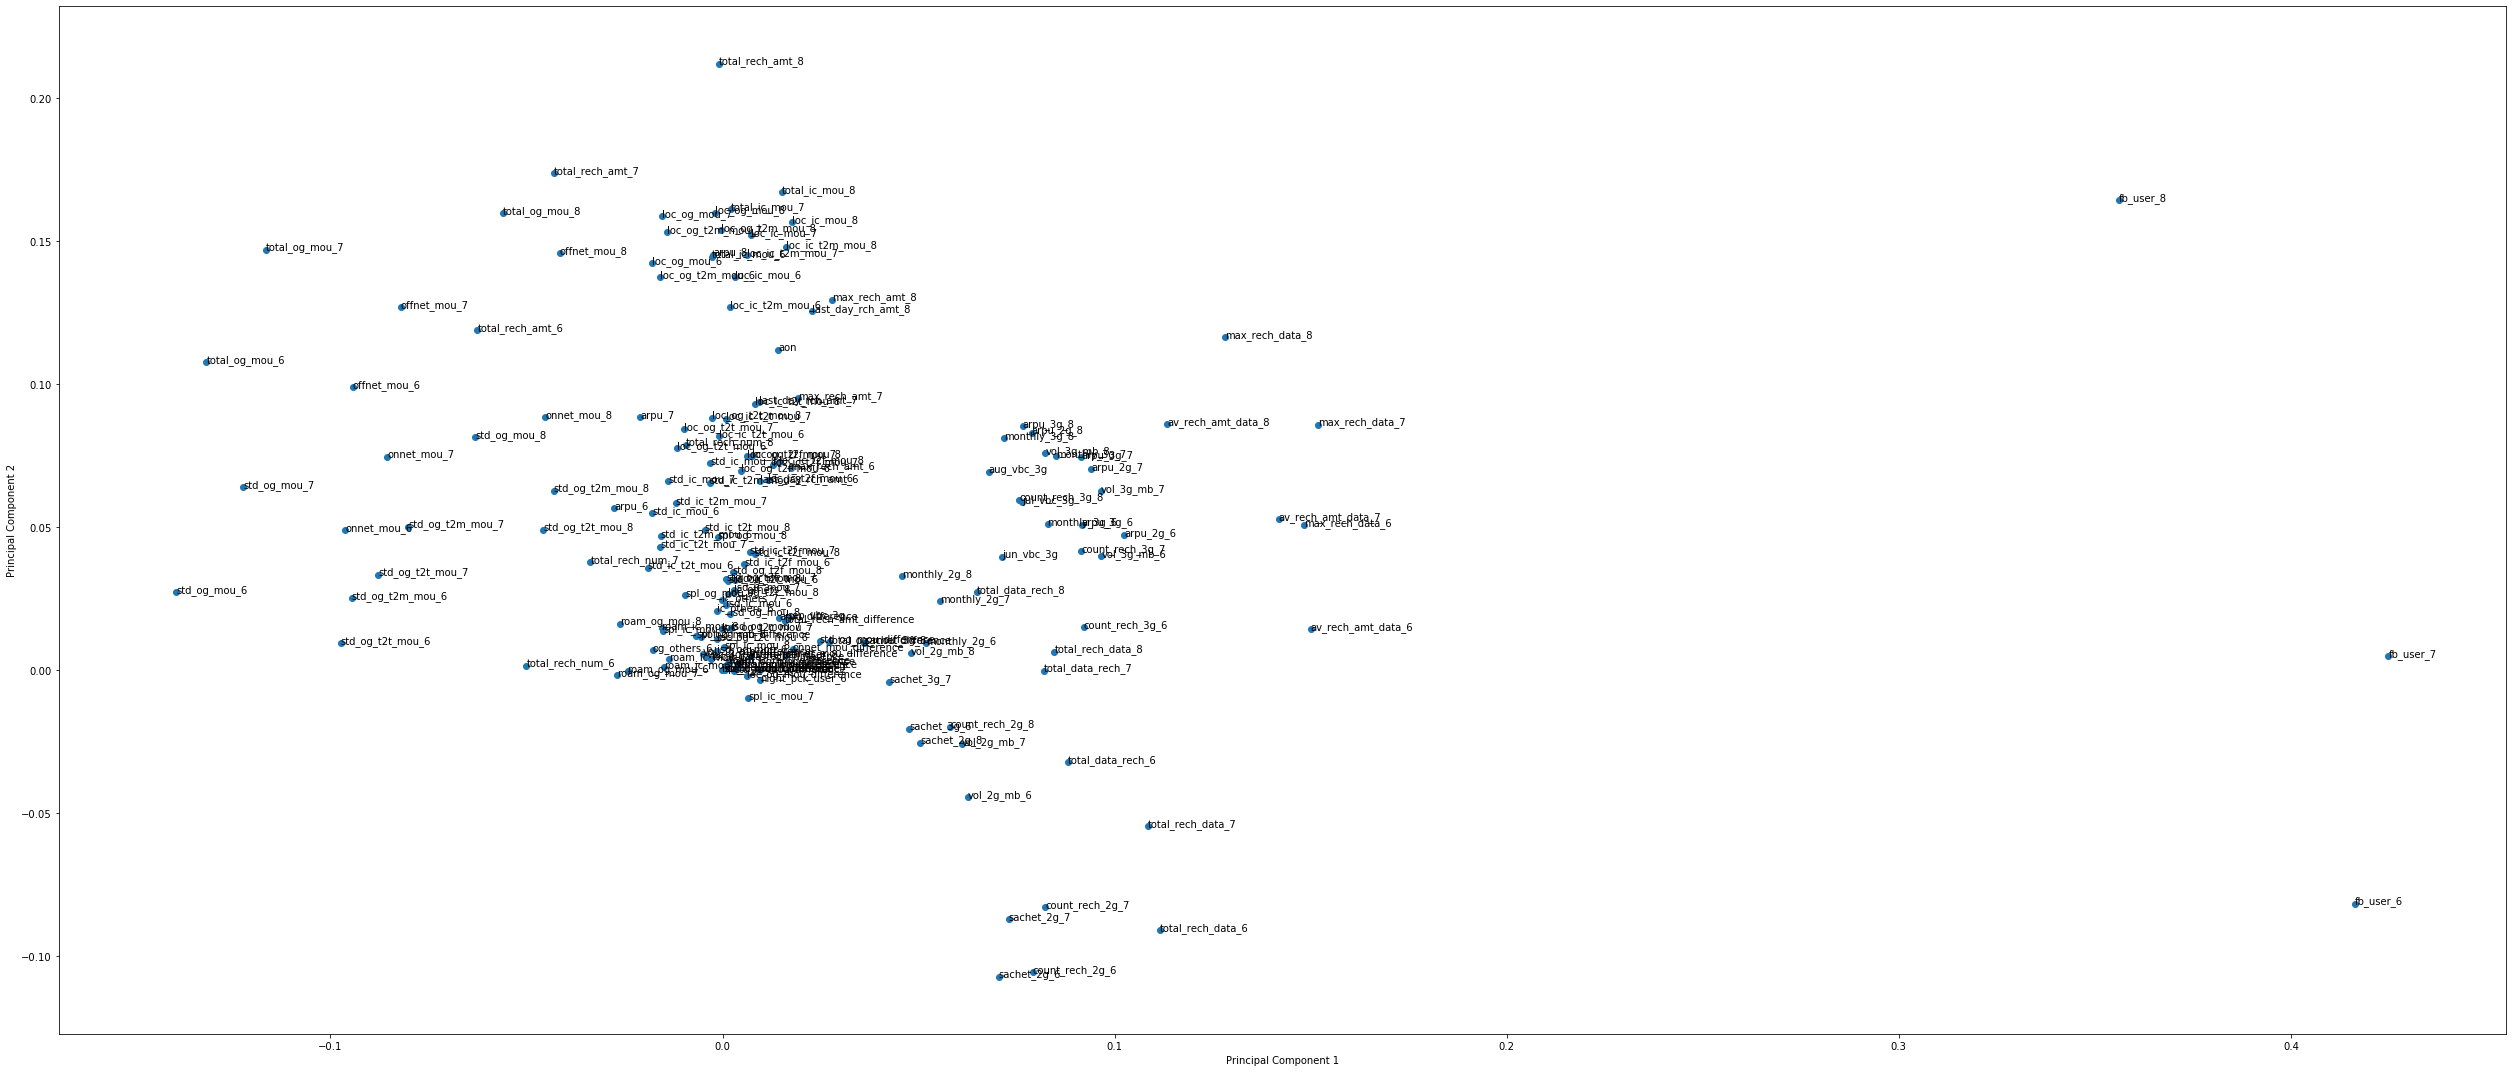

In [118]:
#Features loaded after PCA

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (35, 15))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

- We see that the first component is in the direction where the data usage is heavy.

- And second varibale is in the direction where minutes of usage is heavy.

In [119]:
#Looking at screeplot
pca.explained_variance_ratio_

array([2.14390194e-01, 9.79451297e-02, 6.34260456e-02, 6.08147707e-02,
       4.10804970e-02, 3.28988737e-02, 2.98663237e-02, 2.87113623e-02,
       2.64224206e-02, 2.50440513e-02, 2.23180460e-02, 1.67722718e-02,
       1.37296597e-02, 1.28883201e-02, 1.25077572e-02, 1.16513475e-02,
       1.12683120e-02, 1.09202146e-02, 1.06148784e-02, 9.84531426e-03,
       9.66903493e-03, 8.80627668e-03, 8.63202748e-03, 8.49322062e-03,
       8.06926429e-03, 7.60955805e-03, 7.45604640e-03, 7.03721192e-03,
       6.86862173e-03, 6.40043704e-03, 6.06816713e-03, 5.53276352e-03,
       5.30591796e-03, 5.07246797e-03, 4.96900456e-03, 4.69992353e-03,
       4.61893257e-03, 4.54026505e-03, 4.29298351e-03, 4.13509418e-03,
       4.03925491e-03, 3.78965343e-03, 3.63024277e-03, 3.50732347e-03,
       3.49164487e-03, 3.37395823e-03, 3.34206956e-03, 3.26517188e-03,
       3.18992126e-03, 3.14076235e-03, 2.98248185e-03, 2.85338074e-03,
       2.81939473e-03, 2.62669804e-03, 2.61017113e-03, 2.52416403e-03,
      

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

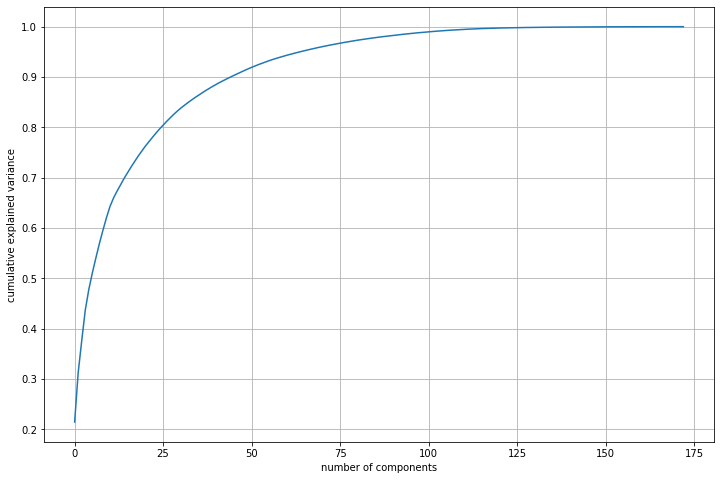

In [120]:
# Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

##### Find number of components that are enough to describe 90% of the variance in the dataset
- This plot tells us that selecting 46 components we can preserve something around 90% of the total variance of the data.

- It makes sense, we’ll not use 100% of our variance, because it denotes all components. So we'll choose 90% of variance for our modeling

- Let PCA select the number of components based on a variance cutoff we provide



In [121]:
pca_final = PCA(0.90)
df_train_pca = pca_final.fit_transform(X_train)
print(df_train_pca.shape)
pca_final.components_.shape

(38450, 46)


(46, 173)

- Creating correlation matrix for principal components - we expect little to no correlation

In [122]:
# Creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

<Figure size 1440x720 with 0 Axes>

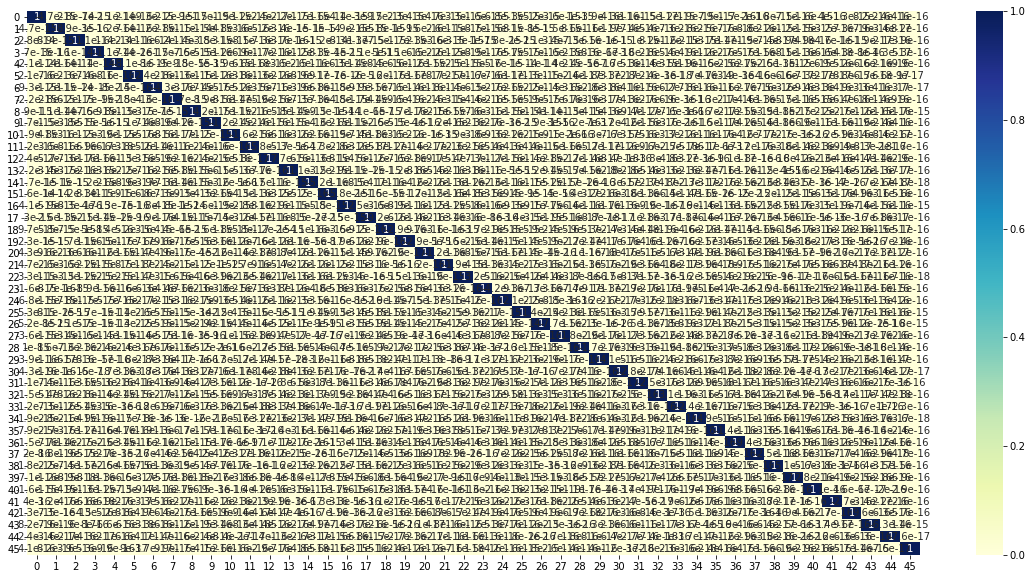

In [123]:
# Plotting the correlation matrix
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True, cmap="YlGnBu")

In [124]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 2.7795668849769026e-14 , min corr:  -2.0650821171262936e-14


- There are no correlation between any two components

- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [125]:
# Applying selected components to the test data - 25 components
df_test_pca = pca_final.transform(X_test)
print('Test Shape = ', df_test_pca.shape)

Test Shape =  (8965, 46)


Visualize data of features selected by pca to see if we can spot any patterns

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

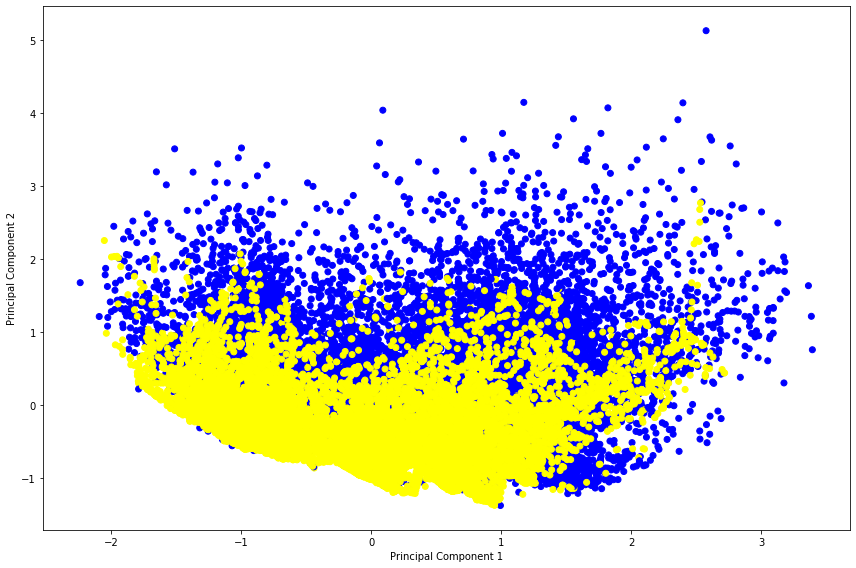

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'blue',1:'yellow'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()
plt.rcdefaults()

##### Logistic Regression with hyper parameter tuning
- Applying a logistic regression on our Principal Components

- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any important information

In [127]:
# Logistic Regression Model
logreg_pca = LogisticRegression(solver='liblinear', random_state=42)

In [128]:
#Create Hyperparameter Search Space
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
C

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [129]:
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
hyperparameters

{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
        5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
        3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}

In [130]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg_pca, hyperparameters, cv=5, n_jobs = -1, scoring='roc_auc', verbose=0)
clf

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

In [131]:
#Conduct Grid Search
# Fit grid search
best_lr_PCA_model = clf.fit(df_train_pca,y_train)
best_lr_PCA_model

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

In [132]:
# View best hyperparameters for best model
print('Best Penalty:', best_lr_PCA_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_lr_PCA_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 166.81005372000593


In [133]:
# Predict probablity using best model
pred_probs_test = best_lr_PCA_model.predict_proba(df_test_pca)[:,1]
pred_probs_test

array([2.50772263e-02, 9.65605286e-01, 6.79696111e-01, ...,
       7.90764911e-01, 3.76142195e-04, 6.62685261e-01])

In [134]:
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score = "{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))
print('roc_auc_score = ', roc_auc_score)

roc_auc_score =  0.89


#####  Predictions

In [135]:
# Predict target variable
y_pred = best_lr_PCA_model.predict(df_test_pca)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [136]:
# Converting pred_probs_test to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Mob_Num_id to index
y_test_df['Mob_Num_id'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Mob_Num_id','churn','Churn_Prob'], axis=1)

y_pred_final.head()

Mob_Num_id  churn  Churn_Prob
0       25743      0    0.025077
1        8318      1    0.965605
2       18611      0    0.679696
3       54656      0    0.028828
4       48535      0    0.003593

In [137]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

# Let's see some data
y_pred_final.head()

Mob_Num_id  churn  Churn_Prob  predicted
0       25743      0    0.025077          0
1        8318      1    0.965605          1
2       18611      0    0.679696          1
3       54656      0    0.028828          0
4       48535      0    0.003593          0

<b>Logistic Regression with PCA Model Evaluation</b>
- Note that it is more important to identify churners than the non-churners accurately

<b>Choose an appropriate evaluation metric which reflects this business goal.</b>
- Evaluate the Sensitivity and Specificity,
- Choose a model which has more sensitivity (Number of actual churns currectly predicted / Total actual churns)
- Display Confusion matrix, accuracy, sensitivity, specificity, false postive rate, positive predictive value, Negative predictive value

In [138]:
compute_and_print_metrics_from_confusion_matrix(y_pred_final.churn, y_pred_final.predicted)

Confusion matrix
[[6894 1348]
 [ 138  585]]

Overall accuracy =  0.8342442833240379
True positive = 585, true negatives = 6894, false positives = 1348, false negatives = 138

Sensitivity =  0.8091286307053942
specificity =  0.8364474642077165

False postive rate =  0.16355253579228343
positive predictive value =  0.30263838592860837
Negative predictive value =  0.9803754266211604


<b>Precision, Recall and F1-Score</b>
- Precision is the fraction of correctly predicted positives out of all predicted positives, i.e. it measures 'out of all those the model has predicted to be positive, how many are correct'. It differs from sensitivity only in the denominator.
- Recall is the same as sensitivity, and is commonly used along with precision.
- F1-score is a measure that combines both precision and recall. It is the harmonic mean of precision and recall

In [139]:
print(classification_report( y_pred_final.churn, y_pred_final.predicted ))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8242
           1       0.30      0.81      0.44       723

    accuracy                           0.83      8965
   macro avg       0.64      0.82      0.67      8965
weighted avg       0.93      0.83      0.87      8965



<b>ROC Curve</b>
- An ROC curve demonstrates several things:

    - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
     - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
     - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

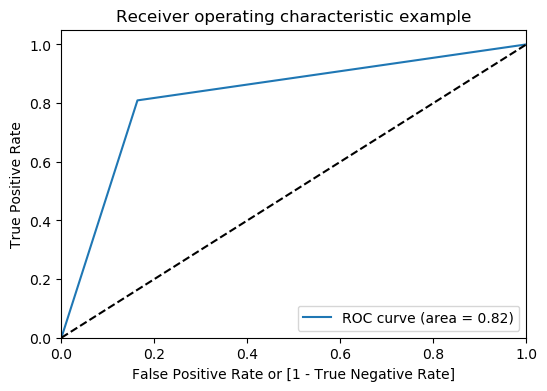

In [140]:
draw_roc(y_pred_final.churn, y_pred_final.predicted)

- Finding Optimal Cutoff Point
         - Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [141]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

Mob_Num_id  churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0       25743      0    0.025077          0    1    0    0    0    0    0   
1        8318      1    0.965605          1    1    1    1    1    1    1   
2       18611      0    0.679696          1    1    1    1    1    1    1   
3       54656      0    0.028828          0    1    0    0    0    0    0   
4       48535      0    0.003593          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    1    1    1    1  
2    1    0    0    0  
3    0    0    0    0  
4    0    0    0    0

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.080647     1.000000     0.000000
0.1          0.1  0.485443     0.957123     0.444067
0.2          0.2  0.622867     0.928077     0.596093
0.3          0.3  0.715449     0.886584     0.700437
0.4          0.4  0.779141     0.847856     0.773113
0.5          0.5  0.834244     0.809129     0.836447
0.6          0.6  0.876297     0.753804     0.887042
0.7          0.7  0.904071     0.690180     0.922834
0.8          0.8  0.920803     0.596127     0.949284
0.9          0.9  0.928388     0.362379     0.978039


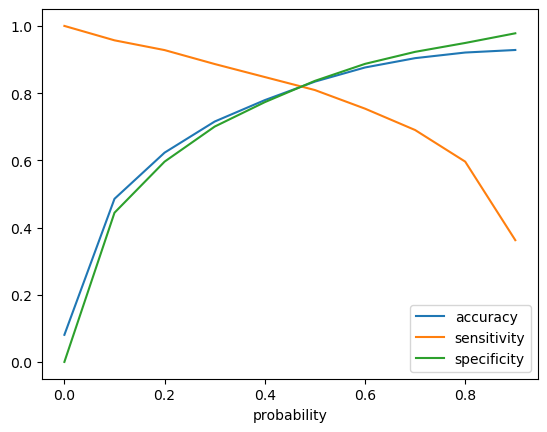

In [142]:
probability_cutoffs( y_pred_final.churn, y_pred_final )

- From the curve and table above, 0.5 is the optimum point 
- But we need to tune our model for optimum sensitivity as the business rule says 
    - "It is more important to identify churners than the non-churners accurately"

Since we are tuning our model for more sensitivity we will take 0.3 as the cutoff for 88% sensitivity


In [143]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_pred_final.head(20)

Mob_Num_id  churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        25743      0    0.025077          0    1    0    0    0    0    0   
1         8318      1    0.965605          1    1    1    1    1    1    1   
2        18611      0    0.679696          1    1    1    1    1    1    1   
3        54656      0    0.028828          0    1    0    0    0    0    0   
4        48535      0    0.003593          0    1    0    0    0    0    0   
5        73394      0    0.042880          0    1    0    0    0    0    0   
6        58177      0    0.546271          1    1    1    1    1    1    1   
7        83589      0    0.071560          0    1    0    0    0    0    0   
8         3390      0    0.220739          0    1    1    1    0    0    0   
9        67629      0    0.058611          0    1    0    0    0    0    0   
10       92232      1    0.954568          1    1    1    1    1    1    1   
11       62250      0    0.495666          0    1    1    1    1    1    0   
12       73404      0    0.194068          0    1    1    0    0    0    0   
13        9651      0    0.351265          0    1    1    1    1    0    0   
14       10974      0    0.215564          0    1    1    1    0    0    0   
15       41078      0    0.060740          0    1    0    0    0    0    0   
16       97475      0    0.047005          0    1    0    0    0    0    0   
17       68172      0    0.091802          0    1    0    0    0    0    0   
18       93488      0    0.009389          0    1    0    0    0    0    0   
19       57139      1    0.957257          1    1    1    1    1    1    1   

    0.6  0.7  0.8  0.9  final_predicted  
0     0    0    0    0                0  
1     1    1    1    1                1  
2     1    0    0    0                1  
3     0    0    0    0                0  
4     0    0    0    0                0  
5     0    0    0    0                0  
6     0    0    0    0                1  
7     0    0    0    0                0  
8     0    0    0    0                0  
9     0    0    0    0                0  
10    1    1    1    1                1  
11    0    0    0    0                1  
12    0    0    0    0                0  
13    0    0    0    0                1  
14    0    0    0    0                0  
15    0    0    0    0                0  
16    0    0    0    0                0  
17    0    0    0    0                0  
18    0    0    0    0                0  
19    1    1    1    1                1

In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.churn, y_pred_final.final_predicted)

0.7154489682097044

In [145]:
metrics.confusion_matrix( y_pred_final.churn, y_pred_final.final_predicted )

array([[5773, 2469],
       [  82,  641]], dtype=int64)

In [146]:
print(classification_report(y_pred_final.churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      8242
           1       0.21      0.89      0.33       723

    accuracy                           0.72      8965
   macro avg       0.60      0.79      0.58      8965
weighted avg       0.92      0.72      0.78      8965



In [147]:
compute_and_print_metrics_from_confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted)

Confusion matrix
[[5773 2469]
 [  82  641]]

Overall accuracy =  0.7154489682097044
True positive = 641, true negatives = 5773, false positives = 2469, false negatives = 82

Sensitivity =  0.8865836791147994
specificity =  0.7004367871875758

False postive rate =  0.29956321281242415
positive predictive value =  0.20610932475884244
Negative predictive value =  0.9859948761742101


<b>Evaluating Error Terms</b>


Let's now evaluate the model in terms of its assumptions. We should test that:

- The error terms are normally distributed with mean approximately 0
- There is little correlation between the predictors
- Homoscedasticity, i.e. the 'spread' or 'variance' of the error term (y_true-y_pred) is constant

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'ytest-ypred')

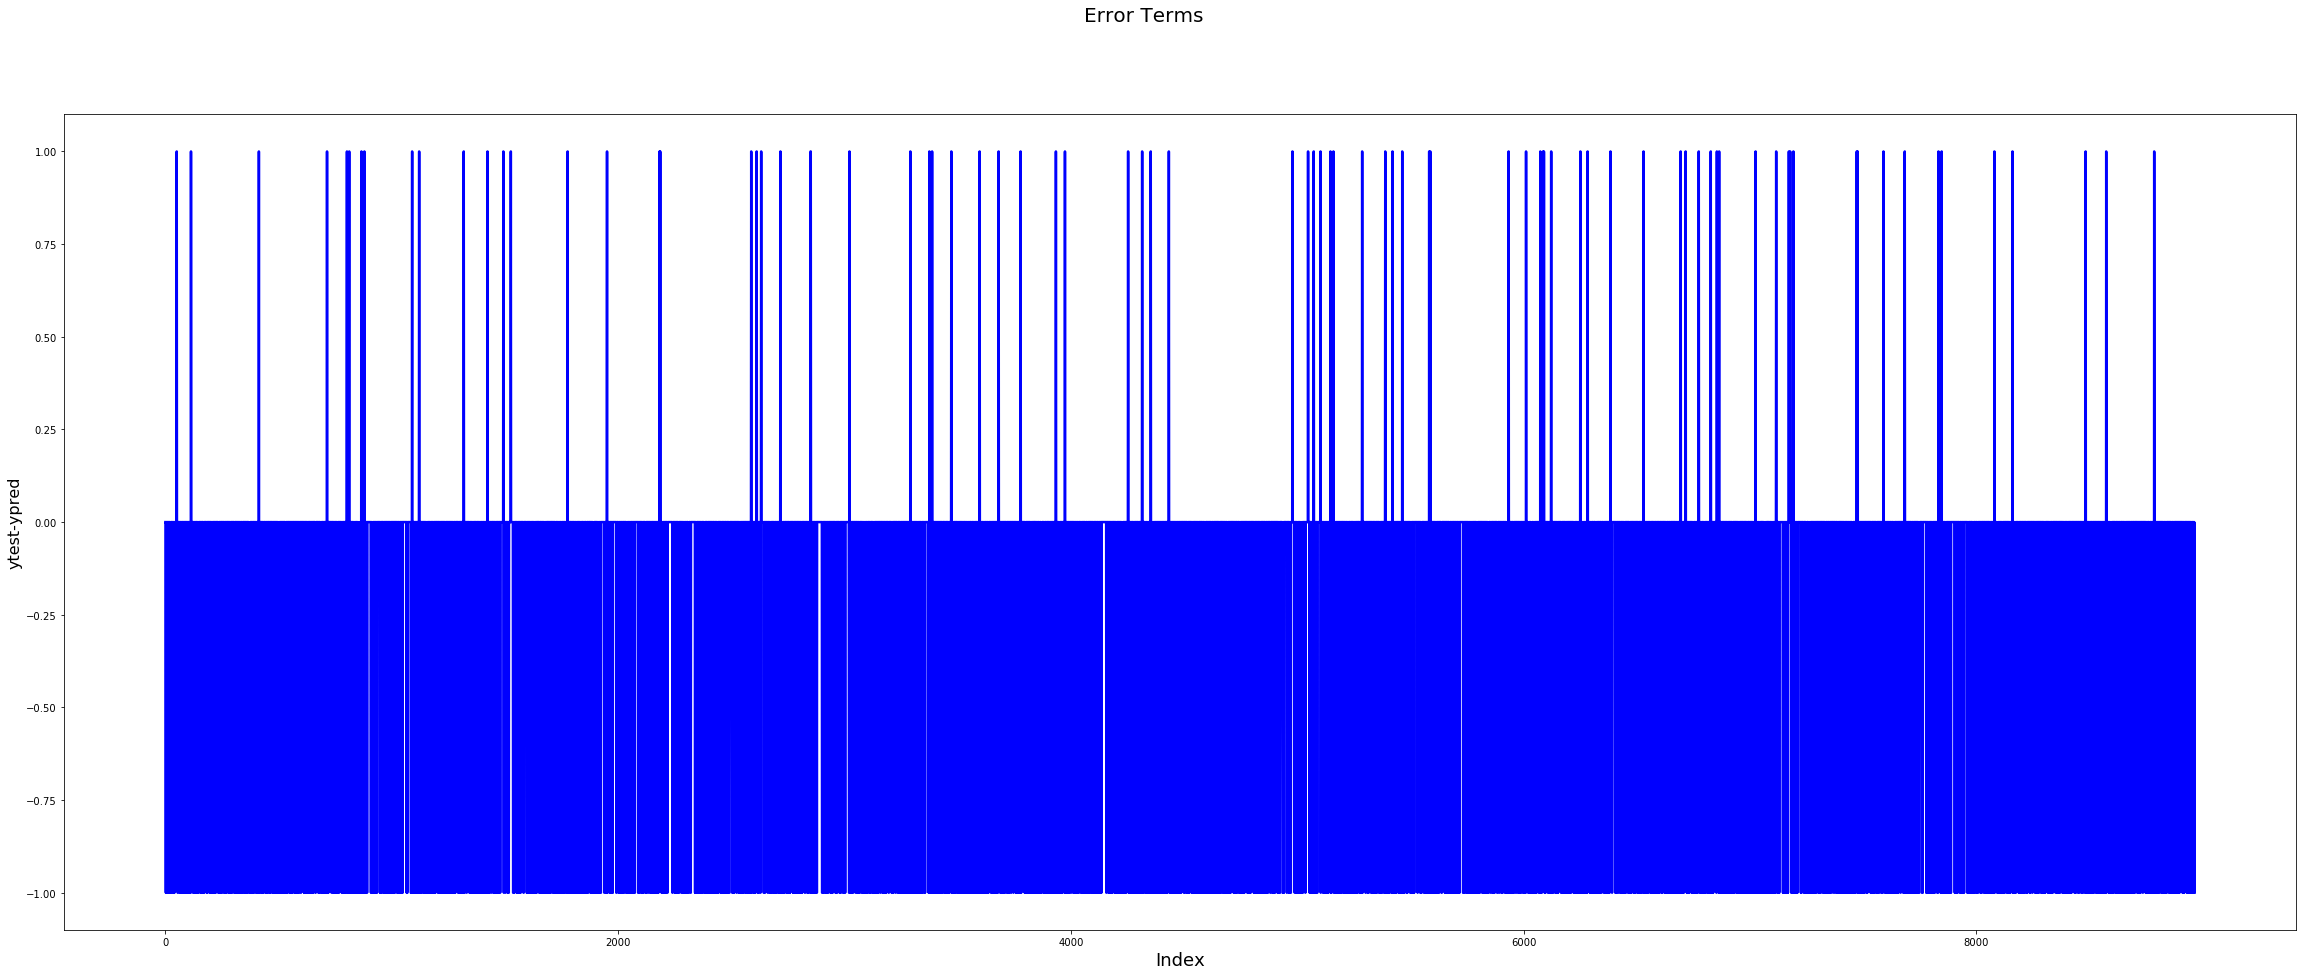

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
# Error terms
c = [i for i in range(len(y_pred_final.final_predicted))]
fig = plt.figure(figsize=(40, 15))
plt.plot(c, y_pred_final.churn-y_pred_final.final_predicted, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'y_test-y_pred')

Text(0, 0.5, 'Index')

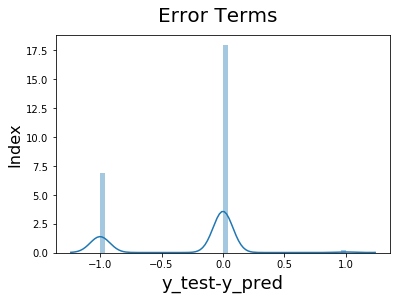

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_pred_final.churn-y_pred_final.final_predicted),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [150]:
# Mean
np.mean(y_pred_final.churn-y_pred_final.final_predicted)

-0.26625766871165646

<b>Inference for Logisitc Regression with PCA</b>

- With Logistic Regression using PCA we are getting a model with 88% Senstivity/Recall and Mean error is -0.26 which pretty good now lets evaluate other models

In [151]:
#Convert PCA result data set to data frame
pca_test = pd.DataFrame(df_test_pca)
pca_train = pd.DataFrame(df_train_pca)

print(pca_train.shape)
print(pca_test.shape)

pca_train.head()

(38450, 46)
(8965, 46)


0         1         2         3         4         5         6  \
0  1.453783  0.519796 -0.546946 -0.014948 -0.111533 -0.209149 -0.225200   
1  1.361144  0.999233 -0.480076 -0.258361  0.012669 -0.316857 -0.081479   
2 -0.980871  1.651231  0.214766 -0.766480  0.084036 -0.250154  0.054158   
3 -1.523222  1.079951  0.395698  1.129240  0.129628 -0.545132 -0.094686   
4  1.104619  0.831491  0.182057 -0.368802  0.025641 -0.009602  0.001142   

          7         8         9        10        11        12        13  \
0 -0.078041 -0.211036  0.003502  0.282694 -0.150006 -0.240671 -0.183628   
1 -0.097194 -0.211188 -0.226746 -0.125367  0.296101 -0.109573  0.193624   
2  0.286830  0.409720  0.126438  0.348292  0.668095  0.304554  0.123618   
3  0.198780  0.353841 -0.387875 -0.193665  0.278535  0.014458  0.011173   
4  0.002406 -0.126438 -0.261457 -0.238734  0.281629  0.173291  0.568148   

         14        15        16        17        18        19        20  \
0 -0.007180 -0.029259 -0.347221 -0.014484 -0.180621  0.332083 -0.282715   
1  0.262701  0.132986 -0.225689 -0.199685 -0.311105  0.276052  0.062867   
2  0.360897  0.199772  0.144840 -0.130986 -0.082583 -0.799961 -0.264137   
3  0.014924  0.078634 -0.032309  0.143880 -0.114533 -0.201919 -0.043483   
4  0.360040  0.216849  0.039095 -0.002848 -0.130447 -0.244237  0.171708   

         21        22        23        24        25        26        27  \
0 -0.102783  0.148045 -0.140228  0.041803  0.095177  0.005616 -0.046953   
1 -0.251732  0.388594 -0.274883  0.285105 -0.000060  0.049890 -0.116874   
2 -0.148140  0.194883  0.105467  0.061757 -0.108215  0.052186 -0.185636   
3  0.143142 -0.238111  0.075700 -0.187993  0.168577 -0.159215 -0.124566   
4 -0.203516  0.267549 -0.115036 -0.074598  0.003305 -0.053078 -0.071282   

         28        29        30        31        32        33        34  \
0  0.010623  0.291927  0.004452  0.008367 -0.376735  0.027839 -0.113716   
1  0.005658 -0.194316  0.218103  0.128809 -0.029446 -0.043875 -0.075646   
2  0.042153 -0.919776  0.029905 -0.212954 -0.480808 -0.405362  0.119152   
3  0.269403  0.004167 -0.010222 -0.129638  0.278472  0.068373 -0.219405   
4 -0.054797 -0.339491  0.073232  0.113300  0.004073 -0.060299 -0.051239   

         35        36        37        38        39        40        41  \
0 -0.111572 -0.031358  0.068415 -0.045928 -0.028980 -0.127855 -0.064178   
1  0.284023  0.136640  0.665543 -0.031322  0.122878  0.159619  0.011027   
2 -0.147372  0.009590  0.245341  0.355840 -0.165785  0.123229 -0.162894   
3 -0.058505 -0.198938 -0.000487  0.140999  0.285221  0.107971  0.163086   
4  0.353315  0.243732  0.590925  0.197413  0.045519  0.113795 -0.020653   

         42        43        44        45  
0 -0.310374  0.066940 -0.194069 -0.064267  
1 -0.022889 -0.157015  0.148587 -0.095218  
2 -0.030476  0.077466 -0.126761  0.075926  
3 -0.000820  0.091993 -0.044588 -0.070574  
4 -0.087180 -0.086861  0.044856 -0.209906

##### Decision Tree

In [152]:
#With Default parameters
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_default.fit(pca_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [153]:
# Making predictions
y_pred_default_dt = dt_default.predict(pca_test)

compute_and_print_metrics_from_confusion_matrix(y_test, y_pred_default_dt)
print(classification_report(y_test, y_pred_default_dt))

Confusion matrix
[[6289 1953]
 [ 172  551]]

Overall accuracy =  0.7629670942554378
True positive = 551, true negatives = 6289, false positives = 1953, false negatives = 172

Sensitivity =  0.7621023513139695
specificity =  0.7630429507401116

False postive rate =  0.23695704925988836
positive predictive value =  0.22004792332268372
Negative predictive value =  0.9733787339421143
              precision    recall  f1-score   support

           0       0.97      0.76      0.86      8242
           1       0.22      0.76      0.34       723

    accuracy                           0.76      8965
   macro avg       0.60      0.76      0.60      8965
weighted avg       0.91      0.76      0.81      8965



- Since we have same accuracy, recall / sensitivity score for default params is low so lets tune the hyperparameters.

###### Grid search to find optimal hyperparameters
- We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy).

In [154]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 17, 2),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                              cv = 4, verbose = 1, scoring='roc_auc', n_jobs = -1, return_train_score=True)

# Fit the grid search to the data
grid_search_dt.fit(pca_train,y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  2.0min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                       

In [155]:
# CV results
cv_results = pd.DataFrame(grid_search_dt.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.002295      0.028269         0.019199    5.054563e-03   
1        3.981599      0.069472         0.015210    4.312609e-04   
2        3.904806      0.044900         0.020196    4.802177e-03   
3        3.910043      0.047469         0.019947    5.324631e-03   
4        5.254447      0.042656         0.016456    8.635538e-04   
5        5.288855      0.061175         0.020197    5.657976e-03   
6        5.121552      0.014075         0.016456    4.986530e-04   
7        5.113075      0.021719         0.017454    1.114968e-03   
8        6.309875      0.024343         0.019198    3.335254e-03   
9        6.329322      0.035030         0.018202    1.086692e-03   
10       5.986489      0.139642         0.016955    7.996802e-07   
11       6.061539      0.099237         0.017703    8.268145e-04   
12       6.900340      0.112810         0.017453    4.981756e-04   
13       6.943473      0.088021         0.017204    4.315364e-04   
14       6.270480      0.075569         0.019199    3.336127e-03   
15       6.290676      0.076328         0.017454    1.115927e-03   
16       7.149879      0.057115         0.017204    4.316395e-04   
17       7.148632      0.067992         0.018451    4.978785e-04   
18       6.348771      0.067098         0.017952    7.055384e-04   
19       6.391407      0.028952         0.017952    7.049484e-04   
20       7.201491      0.064359         0.017952    7.046116e-04   
21       7.295737      0.084921         0.020944    6.909875e-03   
22       6.400133      0.148427         0.016955    7.050327e-04   
23       6.399135      0.125039         0.019448    3.764491e-03   
24       2.437231      0.077100         0.018451    4.318560e-03   
25       2.467899      0.047755         0.015957    7.054550e-04   
26       2.418045      0.036392         0.016457    8.638637e-04   
27       2.412561      0.066240         0.019697    4.480215e-03   
28       3.200940      0.029133         0.016456    4.990698e-04   
29       3.290699      0.030630         0.016705    4.314673e-04   
30       3.105942      0.050827         0.016956    7.055383e-04   
31       3.144589      0.042255         0.017703    8.279460e-04   
32       3.818787      0.044390         0.028175    1.185082e-02   
33       4.012769      0.118780         0.017951    8.678567e-07   
34       3.992572      0.305632         0.018201    8.275148e-04   
35       4.206998      0.323187         0.018701    3.104221e-03   
36       4.449110      0.228657         0.020695    2.939103e-03   
37       4.819397      0.229510         0.026928    6.025477e-03   
38       4.496504      0.106555         0.020194    3.337163e-03   
39       4.684471      0.113873         0.017703    4.315360e-04   
40       4.699682      0.066647         0.019198    8.256667e-04   
41       4.902389      0.056012         0.021693    4.194887e-03   
42       4.525895      0.062136         0.021443    4.911339e-03   
43       4.520908      0.025417         0.018202    4.317772e-04   
44       4.910617      0.148839         0.021442    5.484977e-03   
45       5.055524      0.107245         0.021195    5.054945e-03   
46       4.180131      0.090720         0.017952    7.054541e-04   
47       3.722569      0.168832         0.013718    1.915995e-03   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy               7                     50   
5          entropy               7                     50   
6          entropy               7                    100   
7          entropy               7                    100   
8          entropy               9                     50   
9          entropy               9                     50   


In [156]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy = ", grid_search_dt.best_score_)
print("\nbest_estimator = ", grid_search_dt.best_estimator_)

best accuracy =  0.9127352968797258

best_estimator =  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [157]:
cv_results[cv_results.mean_test_score > 0.85][['param_max_depth','mean_test_score']]

param_max_depth  mean_test_score
0                5         0.859310
1                5         0.859310
2                5         0.858669
3                5         0.858669
4                7         0.887652
5                7         0.887652
6                7         0.883588
7                7         0.883588
8                9         0.904254
9                9         0.904254
10               9         0.897322
11               9         0.897322
12              11         0.910505
13              11         0.910505
14              11         0.900907
15              11         0.900907
16              13         0.912379
17              13         0.912379
18              13         0.901388
19              13         0.901388
20              15         0.912735
21              15         0.912735
22              15         0.901371
23              15         0.901371
24               5         0.855796
25               5         0.855796
26               5         0.857086
27               5         0.857086
28               7         0.885647
29               7         0.885647
30               7         0.884565
31               7         0.884565
32               9         0.900374
33               9         0.900374
34               9         0.895315
35               9         0.895315
36              11         0.906733
37              11         0.906733
38              11         0.898755
39              11         0.898755
40              13         0.908297
41              13         0.908297
42              13         0.899671
43              13         0.899671
44              15         0.908840
45              15         0.908840
46              15         0.899457
47              15         0.899457

- As we can see though the best score for recall comes with max_depth of 15. However, recall score improvement is very minimal from depth 9 to 15. So we think its better to go with 9 as it decreases the complexity hence reduces overfitting of the model quite a bit.

- Running the model with best parameters obtained from grid search.

In [158]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
clf_entropy.fit(pca_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

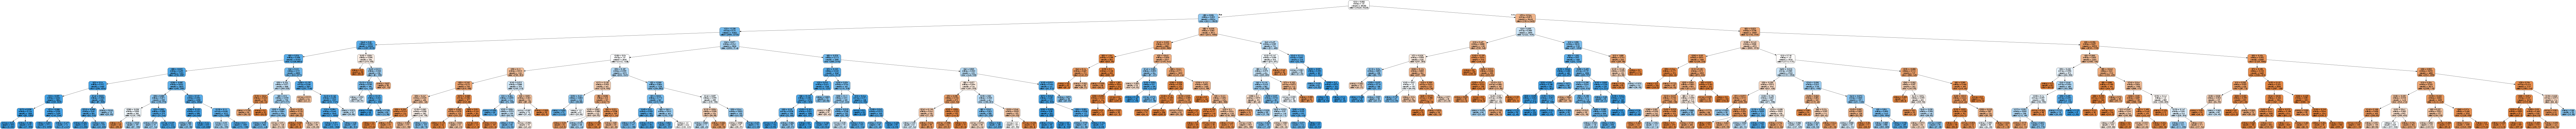

In [159]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
import os

# If you're on windows:
# Specifing path for dot file.
if os.sys.platform == 'win32':
    if 'PROGRAMFILES' in os.environ:
        # os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'
        os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    else:
        os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz2.38/bin/" 

# plotting the tree
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"100,100!"')
Image(graph.create_png())

In [160]:
# Making predictions
y_pred_dt = clf_entropy.predict(pca_test)

In [161]:
compute_and_print_metrics_from_confusion_matrix(y_test,y_pred_dt)

# classification metrics
print(classification_report(y_test, y_pred_dt))

Confusion matrix
[[6677 1565]
 [ 205  518]]

Overall accuracy =  0.8025655326268823
True positive = 518, true negatives = 6677, false positives = 1565, false negatives = 205

Sensitivity =  0.7164591977869986
specificity =  0.81011890317884

False postive rate =  0.18988109682115992
positive predictive value =  0.2486797887662026
Negative predictive value =  0.9702121476315024
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8242
           1       0.25      0.72      0.37       723

    accuracy                           0.80      8965
   macro avg       0.61      0.76      0.63      8965
weighted avg       0.91      0.80      0.84      8965



<b>Evaluating Error Terms</b>

Let's now evaluate the model in terms of its assumptions. We should test that:

- The error terms are normally distributed with mean approximately 0
- There is little correlation between the predictors
- Homoscedasticity, i.e. the 'spread' or 'variance' of the error term (y_true-y_pred) is constant

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'ytest-ypred')

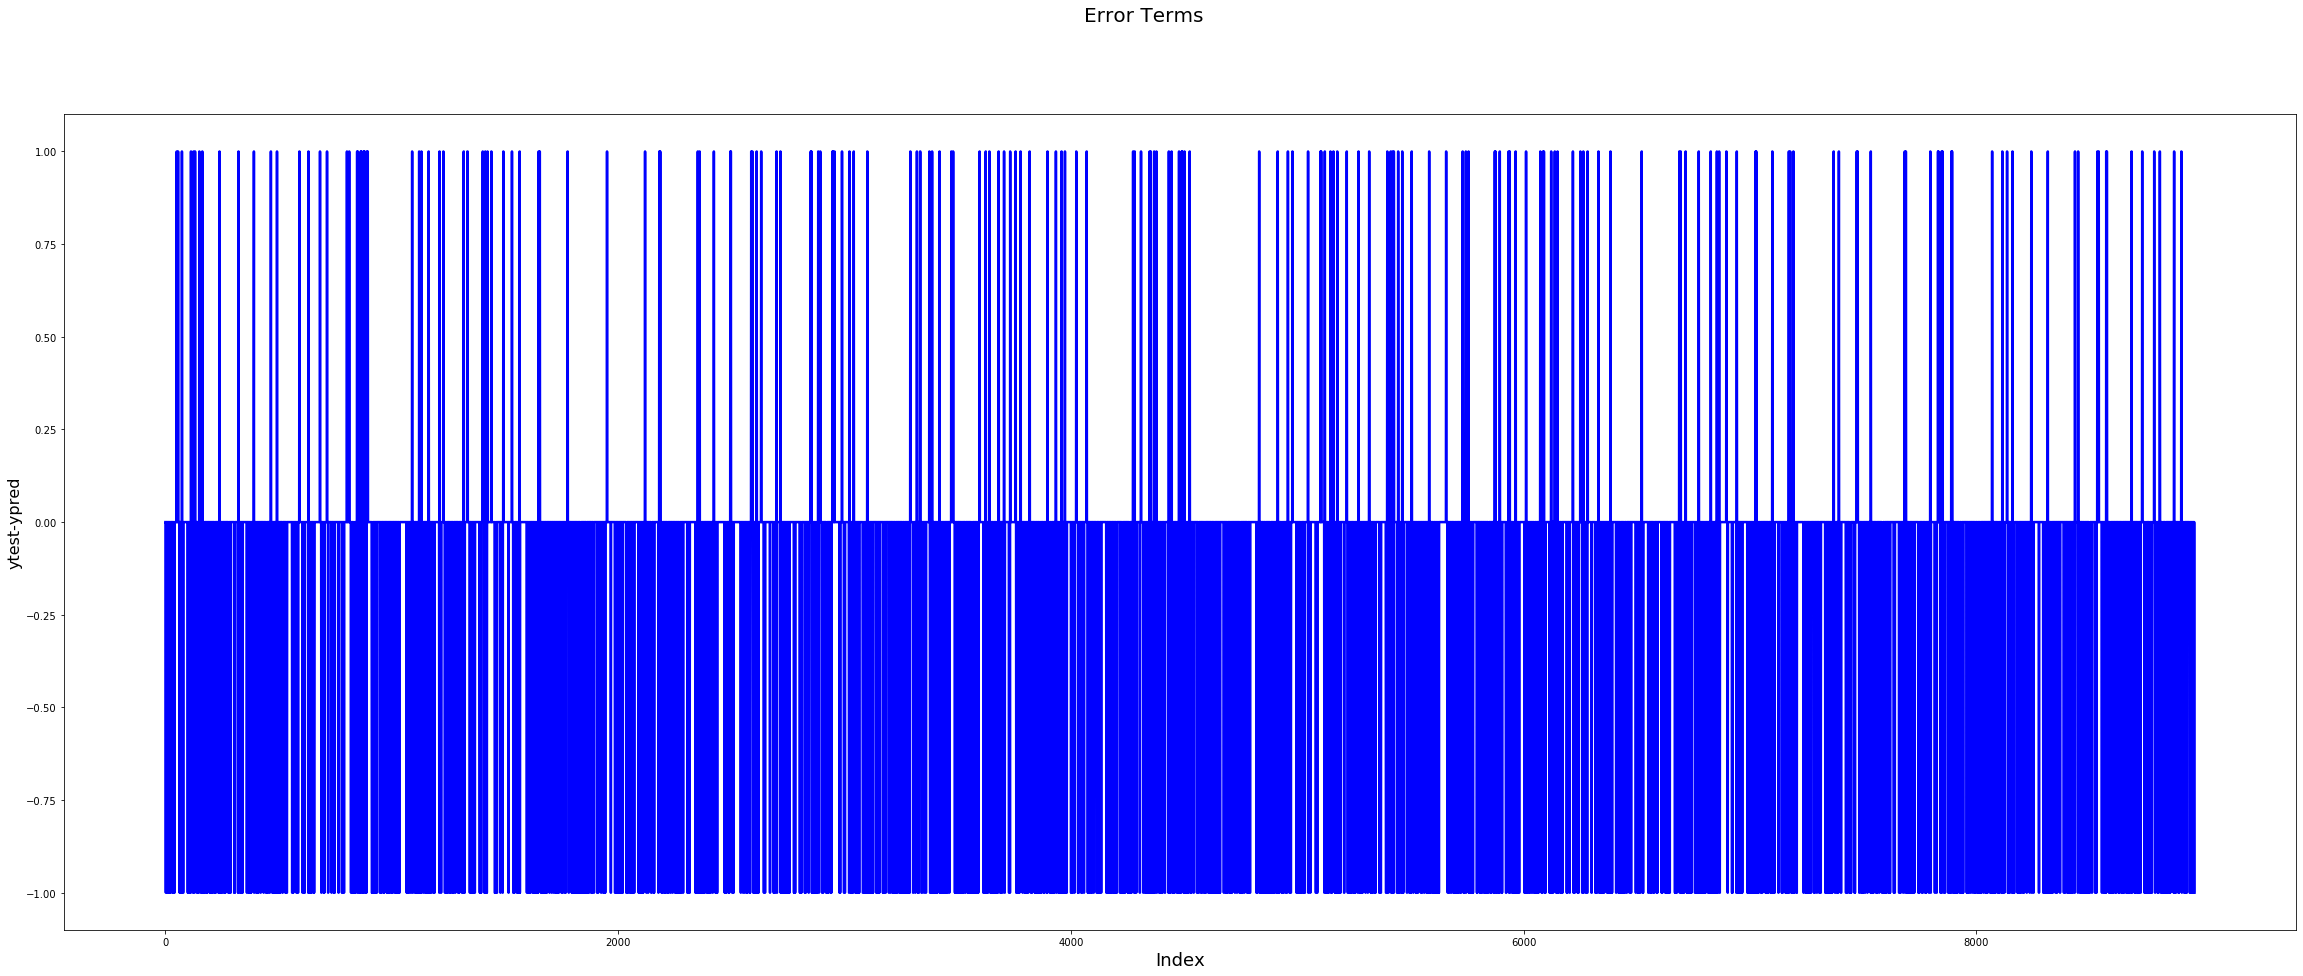

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
# Error terms
c = [i for i in range(len(y_pred_dt))]
fig = plt.figure(figsize=(40, 15))
plt.plot(c, y_test-y_pred_dt, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'y_test-y_pred')

Text(0, 0.5, 'Index')

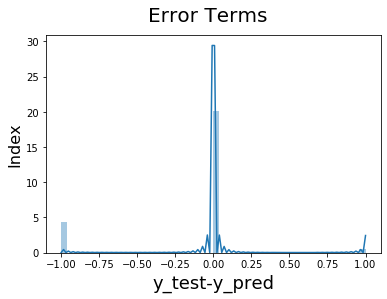

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_dt),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [164]:
# Mean
np.mean(y_test-y_pred_dt)

-0.1517010596765198

<b>Inference for Decision Tree with PCA</b>

- With Decision Tree using PCA we are getting a model with 71% Senstivity/Recall which is low as compared to Logistic Regression model earlier.

##### Random Forest


In [165]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state=42)
# fit
rfc.fit(pca_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [166]:
# Making predictions
rfc_predictions = rfc.predict(pca_test)

In [167]:
compute_and_print_metrics_from_confusion_matrix(y_test, rfc_predictions)
print(classification_report(y_test, rfc_predictions))

Confusion matrix
[[7846  396]
 [ 357  366]]

Overall accuracy =  0.9160066926938093
True positive = 366, true negatives = 7846, false positives = 396, false negatives = 357

Sensitivity =  0.5062240663900415
specificity =  0.9519534093666586

False postive rate =  0.04804659063334142
positive predictive value =  0.48031496062992124
Negative predictive value =  0.9564793368279898
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8242
           1       0.48      0.51      0.49       723

    accuracy                           0.92      8965
   macro avg       0.72      0.73      0.72      8965
weighted avg       0.92      0.92      0.92      8965



-  We have good accuracy, but recall / sensitivity score for default params is low so lets tune the hyperparameters.

<b>Tuning max_depth</b>
- Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [168]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# parameters to build the model on : note we are specifying low number of estimators so tree do not overfit
parameters = {'n_estimators': [10], 'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(random_state=42)

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=4, n_jobs = -1, scoring="roc_auc", return_train_score=True)
rf.fit(pca_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [169]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.042958      0.019600         0.034408        0.003830   
1       2.913706      0.028249         0.054605        0.006553   
2       4.255868      0.037565         0.058593        0.003104   
3       4.528139      0.066716         0.047375        0.000865   

  param_max_depth param_n_estimators                                 params  \
0               2                 10   {'max_depth': 2, 'n_estimators': 10}   
1               7                 10   {'max_depth': 7, 'n_estimators': 10}   
2              12                 10  {'max_depth': 12, 'n_estimators': 10}   
3              17                 10  {'max_depth': 17, 'n_estimators': 10}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.810746           0.819557           0.819558           0.820116   
1           0.914949           0.920060           0.917914           0.914806   
2           0.962577           0.965828           0.964525           0.961115   
3           0.975206           0.978273           0.976833           0.974864   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.817494        0.003903                4            0.821218   
1         0.916932        0.002191                3            0.932099   
2         0.963511        0.001803                2            0.985563   
3         0.976294        0.001363                1            0.997405   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.812816            0.821974            0.824064   
1            0.925717            0.928699            0.930348   
2            0.985678            0.986720            0.986229   
3            0.997911            0.997416            0.997495   

   mean_train_score  std_train_score  
0          0.820018         0.004287  
1          0.929216         0.002351  
2          0.986047         0.000463  
3          0.997557         0.000207

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

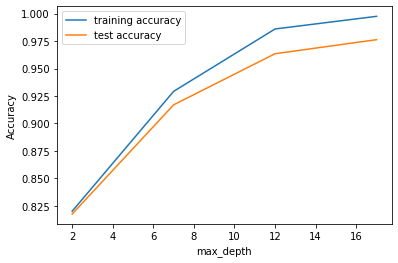

In [170]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- We see that as we increase the value of max_depth, both train and test scores increase till 6 after that increase is marginal

- We can use the range 5 to 6 as optimal value.

In [171]:
max_depth = range(5, 6, 1)
max_depth

range(5, 6)

<b>Tuning n_estimators</b>

- Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Note that we will specify an appropriately low value of max_depth, so that the trees do not overfit.

In [172]:
# parameters to build the model on
parameters = {'n_estimators': range(100, 700, 200)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=3, random_state=42)

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=4, n_jobs = -1, scoring="roc_auc", return_train_score=True)
rf.fit(pca_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                     

In [173]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      13.801840      0.149365         0.195727        0.011445   
1      43.710108      0.794531         0.563494        0.029070   
2      58.848642      0.719096         0.634054        0.012720   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.866533   
1                300  {'n_estimators': 300}           0.870260   
2                500  {'n_estimators': 500}           0.870735   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.880981           0.874424           0.873265         0.873801   
1           0.882998           0.878681           0.876676         0.877154   
2           0.884230           0.879989           0.877634         0.878147   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.005124                3            0.880127            0.875487   
1        0.004589                2            0.883862            0.878748   
2        0.004888                1            0.884321            0.879916   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.876216            0.878386          0.877554         0.001829  
1            0.879966            0.882115          0.881173         0.001966  
2            0.881134            0.883403          0.882194         0.001753

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'Accuracy')

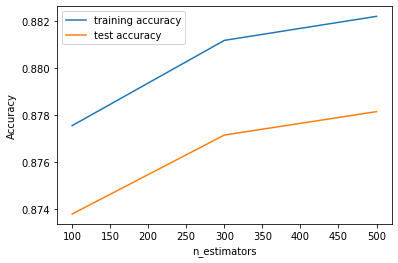

In [174]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- You can see that as we increase the value of n_estimators, both train and test scores increase till 300 after that both test and train score increases marginally.

- We can use 100 and 300.

<b>Tuning max_features</b>

- Let's see how the model performance varies with max_features, which is the maximum number of features considered for splitting at a node.

In [175]:
n_estimators = [100, 300]
# parameters to build the model on
parameters = {'n_estimators': [10], 'max_features': [3, 5, 7, 9, 11, 13]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4, random_state=42)

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=4, n_jobs = -1, scoring="roc_auc", return_train_score=True)
rf.fit(pca_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                     

In [176]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.110780      0.018341         0.037900        0.005230   
1       1.629392      0.018355         0.039145        0.009068   
2       2.098886      0.038919         0.035406        0.000498   
3       2.653902      0.046292         0.035904        0.000705   
4       3.158801      0.055459         0.035655        0.000827   

  param_max_features param_n_estimators  \
0                  3                 10   
1                  5                 10   
2                  7                 10   
3                  9                 10   
4                 11                 10   

                                     params  split0_test_score  \
0   {'max_features': 3, 'n_estimators': 10}           0.850990   
1   {'max_features': 5, 'n_estimators': 10}           0.864982   
2   {'max_features': 7, 'n_estimators': 10}           0.868503   
3   {'max_features': 9, 'n_estimators': 10}           0.868659   
4  {'max_features': 11, 'n_estimators': 10}           0.872843   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.885666           0.876554           0.871957         0.871292   
1           0.874301           0.870079           0.866733         0.869024   
2           0.882586           0.879388           0.877913         0.877097   
3           0.880096           0.874227           0.874905         0.874472   
4           0.877205           0.882693           0.878662         0.877851   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.012717                5            0.873415            0.878006   
1        0.003555                6            0.882591            0.871052   
2        0.005242                2            0.885097            0.881175   
3        0.004052                4            0.881733            0.875180   
4        0.003521                1            0.886911            0.876121   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.878034            0.876896          0.876588         0.001889  
1            0.873711            0.872667          0.875005         0.004481  
2            0.881730            0.882699          0.882675         0.001501  
3            0.877332            0.881019          0.878816         0.002683  
4            0.884977            0.886411          0.883605         0.004379

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_features')

Text(0, 0.5, 'Accuracy')

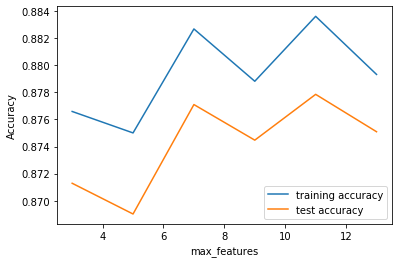

In [177]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- Apparently, the training and test scores both seem to decrease till 5, and then increases.
- We can use 6 and 7.

In [178]:
max_features = [6, 7]

<b>Tuning min_samples_leaf</b>

- Check the optimum value for min samples leaf in this case

- The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

     - If int, then consider min_samples_leaf as the minimum number.
     - If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [179]:
# parameters to build the model on
parameters = {'n_estimators': [10], 'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(random_state=42)

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=4, n_jobs = -1, scoring="roc_auc", return_train_score=True)
rf.fit(pca_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [180]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.618819      0.059396         0.051363        0.003896   
1       3.231108      0.066255         0.056350        0.004261   
2       3.040867      0.051351         0.052360        0.009209   
3       2.877305      0.066380         0.046126        0.002854   
4       2.699777      0.042413         0.042387        0.000499   

  param_min_samples_leaf param_n_estimators  \
0                    100                 10   
1                    150                 10   
2                    200                 10   
3                    250                 10   
4                    300                 10   

                                          params  split0_test_score  \
0  {'min_samples_leaf': 100, 'n_estimators': 10}           0.912745   
1  {'min_samples_leaf': 150, 'n_estimators': 10}           0.905196   
2  {'min_samples_leaf': 200, 'n_estimators': 10}           0.896867   
3  {'min_samples_leaf': 250, 'n_estimators': 10}           0.892070   
4  {'min_samples_leaf': 300, 'n_estimators': 10}           0.888460   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.923933           0.923560           0.922841         0.920770   
1           0.915728           0.912394           0.911153         0.911118   
2           0.907759           0.907665           0.906459         0.904687   
3           0.905662           0.902645           0.902643         0.900755   
4           0.900867           0.899477           0.897271         0.896519   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.004650                1            0.934074            0.930595   
1        0.003806                2            0.923816            0.920321   
2        0.004544                3            0.916702            0.909680   
3        0.005164                4            0.909909            0.905938   
4        0.004826                5            0.905303            0.899906   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.933803            0.935630          0.933526         0.001830  
1            0.921207            0.923136          0.922120         0.001412  
2            0.913154            0.917885          0.914355         0.003212  
3            0.909275            0.912042          0.909291         0.002191  
4            0.903871            0.906125          0.903801         0.002389

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_leaf')

Text(0, 0.5, 'Accuracy')

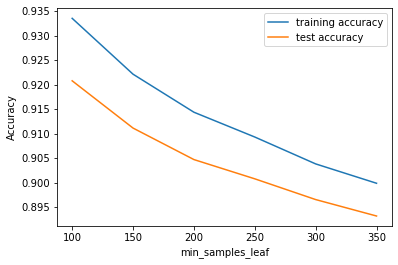

In [181]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [182]:
#We can use the range 100 to 150 for min_samples_leaf.
min_samples_leaf = range(100, 150, 50)

<b>Tuning min_samples_split</b>

- Let's now look at the performance of the ensemble as we do min_samples_split.

In [183]:
# parameters to build the model on
parameters = {'n_estimators': [10], 'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(random_state=42)

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=4, n_jobs = -1, scoring="roc_auc", return_train_score=True)
rf.fit(pca_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [184]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.424242      0.219836         0.071309        0.011469   
1       5.192863      0.167533         0.058095        0.007064   
2       4.674250      0.088159         0.061834        0.010048   
3       4.694196      0.110072         0.053358        0.003562   
4       4.319946      0.064282         0.049368        0.000864   

  param_min_samples_split param_n_estimators  \
0                     200                 10   
1                     250                 10   
2                     300                 10   
3                     350                 10   
4                     400                 10   

                                           params  split0_test_score  \
0  {'min_samples_split': 200, 'n_estimators': 10}           0.929454   
1  {'min_samples_split': 250, 'n_estimators': 10}           0.924537   
2  {'min_samples_split': 300, 'n_estimators': 10}           0.921254   
3  {'min_samples_split': 350, 'n_estimators': 10}           0.921134   
4  {'min_samples_split': 400, 'n_estimators': 10}           0.915958   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.940865           0.940099           0.934449         0.936217   
1           0.935418           0.934708           0.931032         0.931424   
2           0.932630           0.931332           0.925899         0.927779   
3           0.928941           0.926021           0.925427         0.925381   
4           0.924870           0.923786           0.921022         0.921409   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.004624                1            0.956719            0.956336   
1        0.004310                2            0.952760            0.949099   
2        0.004535                3            0.946595            0.943914   
3        0.002789                4            0.943000            0.938858   
4        0.003446                5            0.938497            0.932943   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
0            0.956905            0.956753          0.956678         0.000210  
1            0.951014            0.952057          0.951232         0.001379  
2            0.943927            0.944707          0.944786         0.001093  
3            0.939431            0.942506          0.940949         0.001824  
4            0.936247            0.938312          0.936500         0.002236

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'Accuracy')

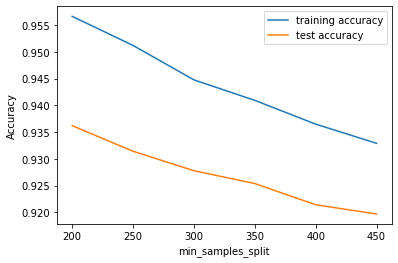

In [185]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [186]:
#We can use 400 to 450 as the range for min_samples_split.
min_samples_split = range(400, 450, 50)

##### Grid Search to find Optimal Hyperparameters

In [187]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators,
    'max_features': max_features
}

print(param_grid)

{'max_depth': range(5, 6), 'min_samples_leaf': range(100, 150, 50), 'min_samples_split': range(400, 450, 50), 'n_estimators': [100, 300], 'max_features': [6, 7]}


In [188]:
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search_rfc = GridSearchCV(estimator = rf, param_grid = param_grid, 
                               cv = 4, n_jobs = -1, verbose = 1, scoring='roc_auc')

In [189]:
# Fit the grid search to the data
grid_search_rfc.fit(pca_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [190]:
# printing the optimal accuracy score and hyperparameters
print(f'Accuracy = {grid_search_rfc.best_score_}\n')
print('Best Params')
print(grid_search_rfc.best_params_)

Accuracy = 0.8995980556773356

Best Params
{'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 300}


Fitting the final model with the best parameters for recall / sensitivity obtained from grid search.

In [191]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=100, 
                             min_samples_split=400,
                             max_features=7,
                             n_estimators=300)

In [192]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=400,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
# predict
predictions = rfc.predict(X_test)

In [194]:
compute_and_print_metrics_from_confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

Confusion matrix
[[7526  716]
 [ 172  551]]

Overall accuracy =  0.9009481316229783
True positive = 551, true negatives = 7526, false positives = 716, false negatives = 172

Sensitivity =  0.7621023513139695
specificity =  0.9131278815821403

False postive rate =  0.08687211841785974
positive predictive value =  0.43488555643251775
Negative predictive value =  0.9776565341647181
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8242
           1       0.43      0.76      0.55       723

    accuracy                           0.90      8965
   macro avg       0.71      0.84      0.75      8965
weighted avg       0.93      0.90      0.91      8965



##### Evaluating Error Terms

- Let's now evaluate the model in terms of its assumptions. We should test that:

   - The error terms are normally distributed with mean approximately 0
   - There is little correlation between the predictors
   - Homoscedasticity, i.e. the 'spread' or 'variance' of the error term (y_true-y_pred) is constant

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'ytest-ypred')

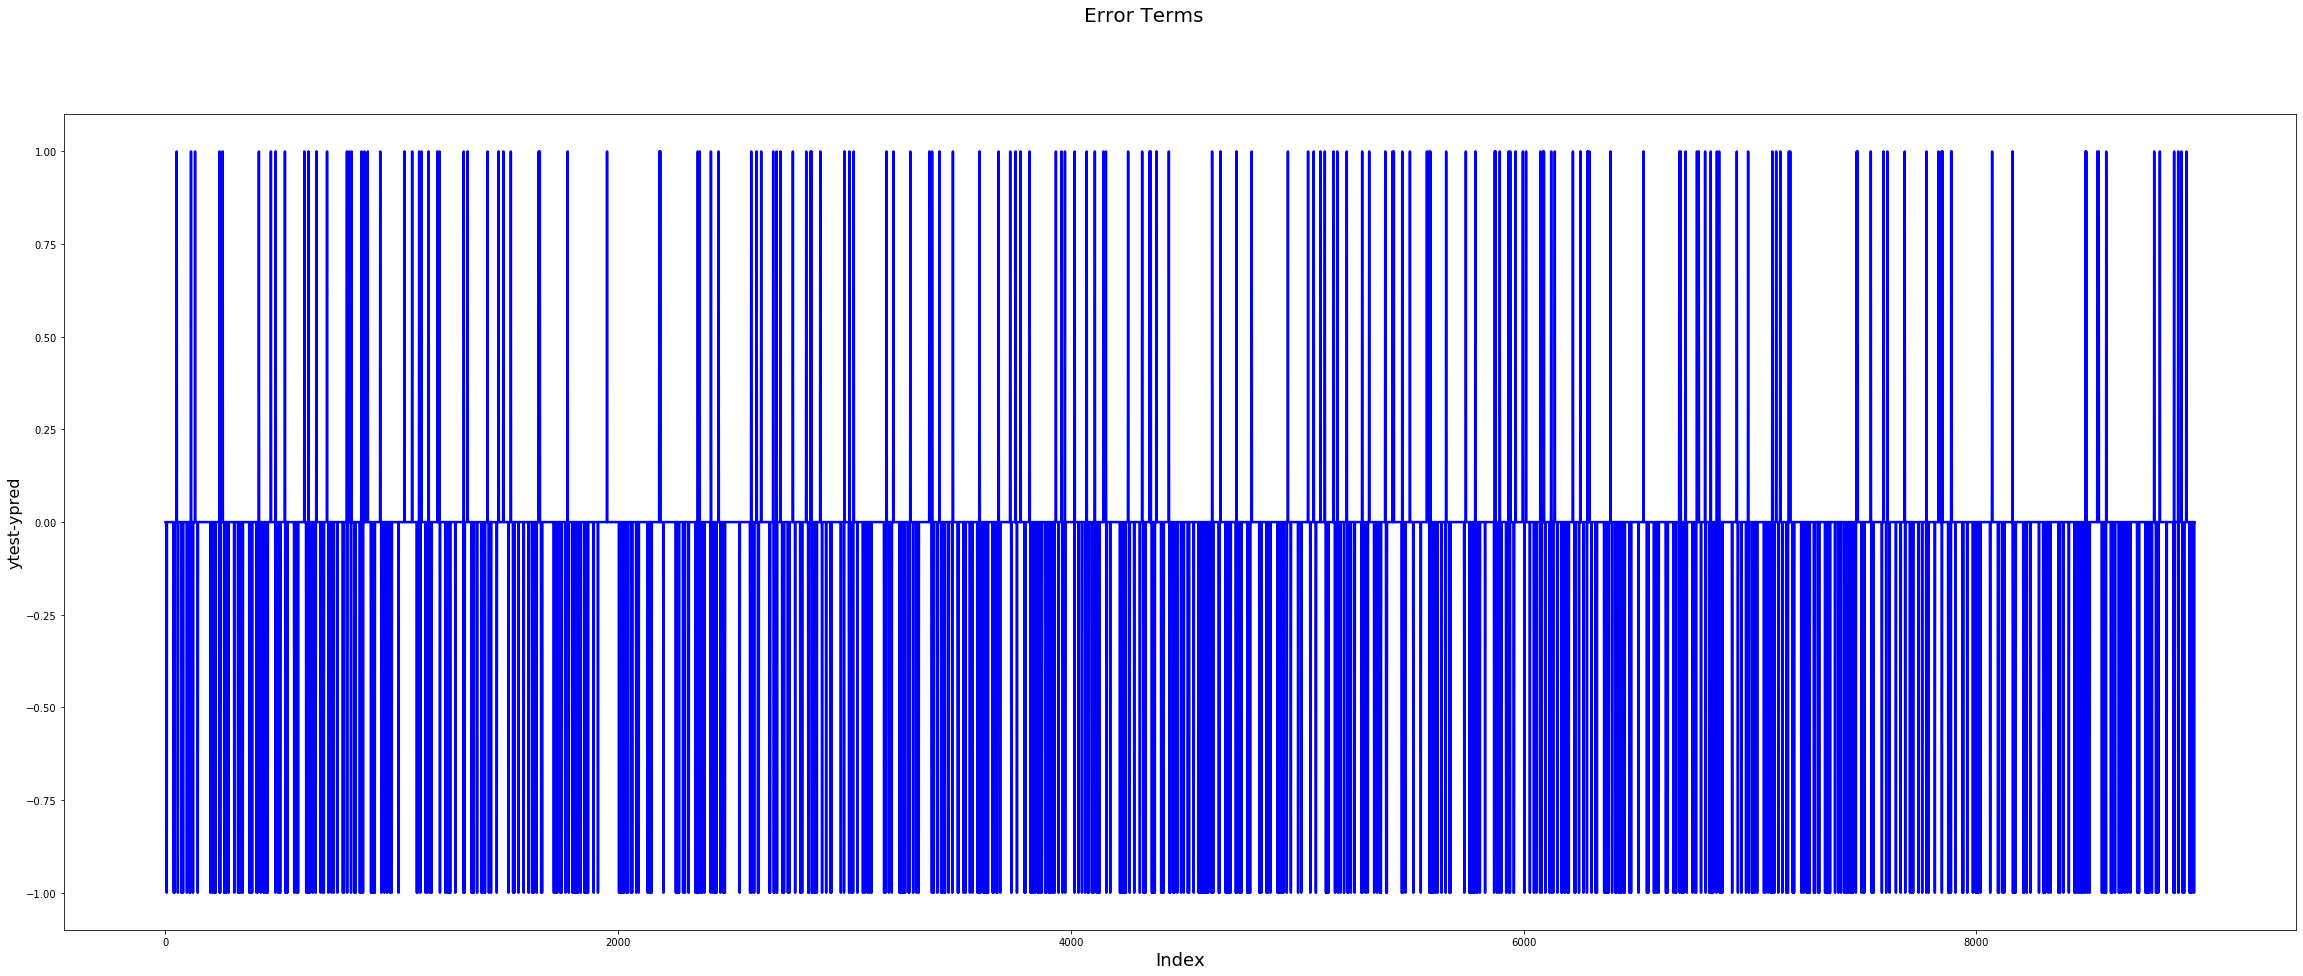

In [195]:
%matplotlib inline
import matplotlib.pyplot as plt
# Error terms
c = [i for i in range(len(predictions))]
fig = plt.figure(figsize=(40, 15))
plt.plot(c, y_test-predictions, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

Text(0.5, 0.98, 'Error Terms')

Text(0.5, 0, 'y_test-y_pred')

Text(0, 0.5, 'Index')

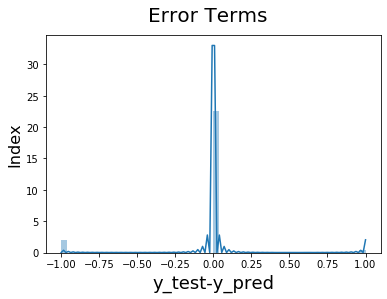

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-predictions),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

In [197]:
# Mean
np.mean(y_test-predictions)

-0.060680423870607916

##### Inference for Random Forest with PCA

With Random Forest using PCA we are getting a model with ~76% Senstivity/Recall which is low as compared to Logistic Regression model earlier.The Random Forest doesnt seems to give good sensitivity value hence we will not recommend this model.

### Final Inference for Model Selection with PCA - Case Study Part 2
We are getting the best senstivity of 88% using Logistic Regression Model compared to Decision Tree, and Random Forest.

#### It is recommended to use Logistic Regression

#### Key Recommendations :

1. Bad Phase is Crucial for Prediction in Churn as most of important variable are coming from this phase.

2. Voice usage(incoming) in mostly "action phase" seems a key feature in determining the Churn and hence company should keep track on the voice usage and also provide incentives/offers to users who are categorised by the model as potential churners.

3. Difference or change(decrease) in the arpu should be taken as key hint for the user to churn and necessary  action should be taken to for the user showing significant change in the arpu.

4. Recharge amount is a key indicator to decide if customer is likely to churn or not.

5.  We should include attractive packages to user enabling them to avail services of Facebook and similar social networking sites with a better value proposition compared  to other operators.

6. If minutes of usage for outgoing call is more then we should offer discounts on outgoing call rate

7. If outgoing calls are made from our operator T to other operator M; we can offer discounts on call rates during specific hours or 24 hours for calls within operator T. Also, we can offer discount for groups to entice user to invite other users on our operator T. 

8. It is also observed that recharge amount and minutes of usage, need to be used as a focus and a potential warning of churn.

9. For our regular users which should run loyalty schemes, to avoid their movement in action phase. 
